In [4]:
import numpy as np
import pandas as pd
import sklearn as sk
import pandas as pd
import seaborn as sns
import keras
import time
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



d = pd.read_csv('houses_edited.csv')


features = ["bedrooms", "bathrooms", "sqft", "parking", 
            "mean_district_income", "Plex", "Semi-Detached", 
            "Store W/Apt/Offc", "Co-Op Apt", "Co-Ownership Apt", 
            "Link", "Comm Element Condo", "Att/Row/Twnhouse", 
            "Condo Townhouse", "Detached", "Condo Apt"] #define list of features to input in nerual network


df = pd.DataFrame(data = d)


def remove_beds(x): #function to remove the word "beds" from column of number of beds
    x = x.replace(" beds", "")
    return x
def calc_beds(j): #function to calculate number of beds from string
    answer = sum(int(i) for i in j.split('+'))
    return answer


df.bedrooms = df.bedrooms.apply(remove_beds) 
df.bedrooms = df.bedrooms.apply(calc_beds)

In [5]:
df = df.drop(["description", "mls", "bedrooms_ag", "bedrooms_bg", "full_link", "full_address", "title",
              "final_price_transformed", "final_price_log", "city_district", "district_code",
              "index", "lat", "long", "list_price"], axis = 1) #Remove insignificant values

#Fill missing sqft values based on type of property

sqft_Store = 0
sqft_Link = 0
sqft_Twn = 0
sqft_Plex = 0
sqft_Detached = 0
sqft_Semi_detached = 0
sqft_Store_count = 0
sqft_Link_count = 0
sqft_Twn_count = 0
sqft_Plex_count = 0
sqft_Detached_count = 0
sqft_Semi_detached_count = 0

for index, row in df.iterrows():
    if pd.notnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
      sqft_Store += row["sqft"]
      sqft_Store_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Link":
      sqft_Link += row["sqft"]
      sqft_Link_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
      sqft_Twn += row["sqft"]
      sqft_Twn_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Plex":
      sqft_Plex += row["sqft"]
      sqft_Plex_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Detached":
      sqft_Detached += row["sqft"]
      sqft_Detached_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Semi-Detached":
      sqft_Semi_detached += row["sqft"]
      sqft_Semi_detached_count += 1

avg_Store = sqft_Store/sqft_Store_count
avg_Link = sqft_Link/sqft_Link_count
avg_Twn = sqft_Twn/sqft_Twn_count
avg_Plex = sqft_Plex/sqft_Plex_count
avg_Detached = sqft_Detached/sqft_Detached_count
avg_Semi_detached = sqft_Semi_detached/sqft_Semi_detached_count

for index, row in df.iterrows():
  #print(row["type"], row["sqft"])
  if pd.isnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
    df.at[index, "sqft"] = avg_Store

  if pd.isnull(row["sqft"]) and row["type"] == "Link":
    df.at[index, "sqft"] = avg_Link

  if pd.isnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
    df.at[index, "sqft"] = avg_Twn

  if pd.isnull(row["sqft"]) and row["type"] == "Plex":
    df.at[index, "sqft"] = avg_Plex

  if pd.isnull(row["sqft"]) and row["type"] == "Detached":
    df.at[index, "sqft"] = avg_Detached

  if pd.isnull(row["sqft"]) and row["type"] == "Semi-Detached":
    df.at[index, "sqft"] = avg_Semi_detached

dummy_type = pd.get_dummies(df["type"]) #allow 
df = pd.concat([df, dummy_type], axis = 1)
df = df.drop(["type"], axis = 1)

In [ ]:
train, test = train_test_split(df, test_size = 0.20, random_state = 0) #Split data into 2 parts, 
                                                                       #training and testing data, with ratio 8:2 

x_train = train[features]
y_train = train[['final_price']]

model = Sequential()

start_time = time.time()
model.add(Dense(64, input_dim = 16,activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate = 0.026) 

model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['MeanAbsolutePercentageError'])
training = model.fit(x_train, y_train, epochs = 30000, batch_size = 50, shuffle = False, verbose = 2)
#training = model.predict(x_train)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy))

predictions = model.predict(x_train)
end_time = time.time()
print(end_time-start_time)
#print(predictions)
for i in range(10):
  print("%d, expected: %d" % (predictions[i], y_train.iloc[i]))

# Predicting prices from test set
# x_test = test[features]
# y_test = test[['final_price']]


# print(model.evaluate(x_test, y_test))


#Best hyperparameter result
# MSPE: 17.40%
# Neural layers: 64, 32, 1
# Learning rate: 0.026
# Epochs: 600
# Batch size; 50


Epoch 1/30000
244/244 - 1s - loss: 290046.6875 - mean_absolute_percentage_error: 31.0135
Epoch 2/30000
244/244 - 1s - loss: 222008.9844 - mean_absolute_percentage_error: 23.0059
Epoch 3/30000
244/244 - 0s - loss: 221932.1875 - mean_absolute_percentage_error: 22.9414
Epoch 4/30000
244/244 - 0s - loss: 221263.4688 - mean_absolute_percentage_error: 22.8773
Epoch 5/30000
244/244 - 0s - loss: 221144.1875 - mean_absolute_percentage_error: 22.8357
Epoch 6/30000
244/244 - 0s - loss: 221048.2031 - mean_absolute_percentage_error: 22.8229
Epoch 7/30000
244/244 - 0s - loss: 220778.8438 - mean_absolute_percentage_error: 22.7997
Epoch 8/30000
244/244 - 0s - loss: 220790.2031 - mean_absolute_percentage_error: 22.8155
Epoch 9/30000
244/244 - 0s - loss: 220635.4688 - mean_absolute_percentage_error: 22.7701
Epoch 10/30000
244/244 - 0s - loss: 220652.2812 - mean_absolute_percentage_error: 22.7936
Epoch 11/30000
244/244 - 0s - loss: 220176.0625 - mean_absolute_percentage_error: 22.7441
Epoch 12/30000
244/

244/244 - 0s - loss: 199348.4688 - mean_absolute_percentage_error: 21.1266
Epoch 93/30000
244/244 - 0s - loss: 199910.3906 - mean_absolute_percentage_error: 21.1343
Epoch 94/30000
244/244 - 0s - loss: 199376.6094 - mean_absolute_percentage_error: 21.1268
Epoch 95/30000
244/244 - 0s - loss: 199316.7656 - mean_absolute_percentage_error: 21.0828
Epoch 96/30000
244/244 - 0s - loss: 198920.3125 - mean_absolute_percentage_error: 21.0210
Epoch 97/30000
244/244 - 0s - loss: 198768.8281 - mean_absolute_percentage_error: 21.0090
Epoch 98/30000
244/244 - 0s - loss: 198643.3750 - mean_absolute_percentage_error: 21.0008
Epoch 99/30000
244/244 - 0s - loss: 198108.8594 - mean_absolute_percentage_error: 20.8759
Epoch 100/30000
244/244 - 0s - loss: 197800.8281 - mean_absolute_percentage_error: 20.8082
Epoch 101/30000
244/244 - 0s - loss: 198749.5781 - mean_absolute_percentage_error: 20.9436
Epoch 102/30000
244/244 - 0s - loss: 197442.3750 - mean_absolute_percentage_error: 20.7538
Epoch 103/30000
244/24

Epoch 183/30000
244/244 - 0s - loss: 187717.3438 - mean_absolute_percentage_error: 19.3610
Epoch 184/30000
244/244 - 0s - loss: 187780.4688 - mean_absolute_percentage_error: 19.2758
Epoch 185/30000
244/244 - 0s - loss: 188273.5938 - mean_absolute_percentage_error: 19.4814
Epoch 186/30000
244/244 - 0s - loss: 188475.5312 - mean_absolute_percentage_error: 19.4306
Epoch 187/30000
244/244 - 0s - loss: 189160.2656 - mean_absolute_percentage_error: 19.4718
Epoch 188/30000
244/244 - 0s - loss: 188418.6406 - mean_absolute_percentage_error: 19.4838
Epoch 189/30000
244/244 - 0s - loss: 188323.0469 - mean_absolute_percentage_error: 19.3244
Epoch 190/30000
244/244 - 0s - loss: 188367.7500 - mean_absolute_percentage_error: 19.3947
Epoch 191/30000
244/244 - 0s - loss: 186213.5625 - mean_absolute_percentage_error: 19.1619
Epoch 192/30000
244/244 - 0s - loss: 188551.7031 - mean_absolute_percentage_error: 19.4080
Epoch 193/30000
244/244 - 0s - loss: 186920.7656 - mean_absolute_percentage_error: 19.2186

244/244 - 0s - loss: 184442.7031 - mean_absolute_percentage_error: 18.8880
Epoch 274/30000
244/244 - 0s - loss: 185514.6719 - mean_absolute_percentage_error: 19.1242
Epoch 275/30000
244/244 - 0s - loss: 184517.5156 - mean_absolute_percentage_error: 18.9397
Epoch 276/30000
244/244 - 0s - loss: 184527.6719 - mean_absolute_percentage_error: 19.0395
Epoch 277/30000
244/244 - 0s - loss: 184375.5156 - mean_absolute_percentage_error: 18.9649
Epoch 278/30000
244/244 - 0s - loss: 184717.5781 - mean_absolute_percentage_error: 19.0491
Epoch 279/30000
244/244 - 0s - loss: 184266.1562 - mean_absolute_percentage_error: 18.9286
Epoch 280/30000
244/244 - 0s - loss: 184504.6250 - mean_absolute_percentage_error: 18.9032
Epoch 281/30000
244/244 - 0s - loss: 184805.9531 - mean_absolute_percentage_error: 18.9876
Epoch 282/30000
244/244 - 0s - loss: 185140.4531 - mean_absolute_percentage_error: 19.0744
Epoch 283/30000
244/244 - 0s - loss: 184462.6719 - mean_absolute_percentage_error: 18.9977
Epoch 284/30000

Epoch 364/30000
244/244 - 0s - loss: 183281.1719 - mean_absolute_percentage_error: 18.8636
Epoch 365/30000
244/244 - 0s - loss: 182691.0312 - mean_absolute_percentage_error: 18.8305
Epoch 366/30000
244/244 - 0s - loss: 182387.9688 - mean_absolute_percentage_error: 18.8469
Epoch 367/30000
244/244 - 0s - loss: 183487.5938 - mean_absolute_percentage_error: 18.9505
Epoch 368/30000
244/244 - 0s - loss: 182074.0000 - mean_absolute_percentage_error: 18.7071
Epoch 369/30000
244/244 - 0s - loss: 182784.7500 - mean_absolute_percentage_error: 18.7813
Epoch 370/30000
244/244 - 0s - loss: 182905.8594 - mean_absolute_percentage_error: 18.8235
Epoch 371/30000
244/244 - 1s - loss: 182810.7812 - mean_absolute_percentage_error: 18.7997
Epoch 372/30000
244/244 - 0s - loss: 182602.9531 - mean_absolute_percentage_error: 18.7226
Epoch 373/30000
244/244 - 0s - loss: 182301.5625 - mean_absolute_percentage_error: 18.7682
Epoch 374/30000
244/244 - 0s - loss: 182592.0000 - mean_absolute_percentage_error: 18.7631

244/244 - 0s - loss: 181768.0469 - mean_absolute_percentage_error: 18.8416
Epoch 455/30000
244/244 - 0s - loss: 181445.5625 - mean_absolute_percentage_error: 18.7388
Epoch 456/30000
244/244 - 0s - loss: 182203.5156 - mean_absolute_percentage_error: 18.8430
Epoch 457/30000
244/244 - 0s - loss: 181202.5156 - mean_absolute_percentage_error: 18.6456
Epoch 458/30000
244/244 - 0s - loss: 181589.4062 - mean_absolute_percentage_error: 18.6617
Epoch 459/30000
244/244 - 0s - loss: 181576.5938 - mean_absolute_percentage_error: 18.6877
Epoch 460/30000
244/244 - 0s - loss: 181794.9688 - mean_absolute_percentage_error: 18.6570
Epoch 461/30000
244/244 - 0s - loss: 181479.6406 - mean_absolute_percentage_error: 18.6848
Epoch 462/30000
244/244 - 0s - loss: 180739.0469 - mean_absolute_percentage_error: 18.6112
Epoch 463/30000
244/244 - 0s - loss: 180329.7031 - mean_absolute_percentage_error: 18.5226
Epoch 464/30000
244/244 - 0s - loss: 180965.0000 - mean_absolute_percentage_error: 18.5840
Epoch 465/30000

Epoch 545/30000
244/244 - 0s - loss: 180392.9688 - mean_absolute_percentage_error: 18.6651
Epoch 546/30000
244/244 - 0s - loss: 180151.8594 - mean_absolute_percentage_error: 18.5441
Epoch 547/30000
244/244 - 0s - loss: 179685.5469 - mean_absolute_percentage_error: 18.4610
Epoch 548/30000
244/244 - 0s - loss: 180047.3594 - mean_absolute_percentage_error: 18.5323
Epoch 549/30000
244/244 - 0s - loss: 179478.7031 - mean_absolute_percentage_error: 18.3779
Epoch 550/30000
244/244 - 0s - loss: 180452.2031 - mean_absolute_percentage_error: 18.5787
Epoch 551/30000
244/244 - 0s - loss: 180048.6250 - mean_absolute_percentage_error: 18.5819
Epoch 552/30000
244/244 - 0s - loss: 180337.7031 - mean_absolute_percentage_error: 18.5711
Epoch 553/30000
244/244 - 0s - loss: 180134.3438 - mean_absolute_percentage_error: 18.5665
Epoch 554/30000
244/244 - 0s - loss: 180085.0469 - mean_absolute_percentage_error: 18.5873
Epoch 555/30000
244/244 - 0s - loss: 179151.0781 - mean_absolute_percentage_error: 18.4569

244/244 - 0s - loss: 178748.3281 - mean_absolute_percentage_error: 18.4031
Epoch 636/30000
244/244 - 0s - loss: 180221.2656 - mean_absolute_percentage_error: 18.6246
Epoch 637/30000
244/244 - 0s - loss: 180356.2344 - mean_absolute_percentage_error: 18.6874
Epoch 638/30000
244/244 - 0s - loss: 178531.9844 - mean_absolute_percentage_error: 18.3488
Epoch 639/30000
244/244 - 0s - loss: 177873.8438 - mean_absolute_percentage_error: 18.2623
Epoch 640/30000
244/244 - 0s - loss: 179185.8438 - mean_absolute_percentage_error: 18.4542
Epoch 641/30000
244/244 - 0s - loss: 179232.0156 - mean_absolute_percentage_error: 18.4877
Epoch 642/30000
244/244 - 0s - loss: 178576.7344 - mean_absolute_percentage_error: 18.3726
Epoch 643/30000
244/244 - 0s - loss: 179163.3281 - mean_absolute_percentage_error: 18.4784
Epoch 644/30000
244/244 - 0s - loss: 179838.6094 - mean_absolute_percentage_error: 18.5941
Epoch 645/30000
244/244 - 0s - loss: 178505.0625 - mean_absolute_percentage_error: 18.3652
Epoch 646/30000

Epoch 726/30000
244/244 - 0s - loss: 178397.5938 - mean_absolute_percentage_error: 18.4421
Epoch 727/30000
244/244 - 0s - loss: 178416.8906 - mean_absolute_percentage_error: 18.4573
Epoch 728/30000
244/244 - 0s - loss: 178661.2969 - mean_absolute_percentage_error: 18.5320
Epoch 729/30000
244/244 - 0s - loss: 178090.4219 - mean_absolute_percentage_error: 18.3411
Epoch 730/30000
244/244 - 0s - loss: 177947.3750 - mean_absolute_percentage_error: 18.3224
Epoch 731/30000
244/244 - 0s - loss: 178473.5156 - mean_absolute_percentage_error: 18.3923
Epoch 732/30000
244/244 - 0s - loss: 177836.4844 - mean_absolute_percentage_error: 18.3441
Epoch 733/30000
244/244 - 0s - loss: 176852.1406 - mean_absolute_percentage_error: 18.1811
Epoch 734/30000
244/244 - 0s - loss: 178952.5000 - mean_absolute_percentage_error: 18.5436
Epoch 735/30000
244/244 - 0s - loss: 179382.9375 - mean_absolute_percentage_error: 18.6688
Epoch 736/30000
244/244 - 0s - loss: 177780.3594 - mean_absolute_percentage_error: 18.3748

244/244 - 0s - loss: 176615.9844 - mean_absolute_percentage_error: 18.2983
Epoch 817/30000
244/244 - 0s - loss: 177259.3750 - mean_absolute_percentage_error: 18.3699
Epoch 818/30000
244/244 - 0s - loss: 178114.5625 - mean_absolute_percentage_error: 18.3981
Epoch 819/30000
244/244 - 0s - loss: 176021.9375 - mean_absolute_percentage_error: 18.1023
Epoch 820/30000
244/244 - 0s - loss: 175810.9219 - mean_absolute_percentage_error: 18.1241
Epoch 821/30000
244/244 - 0s - loss: 176452.2344 - mean_absolute_percentage_error: 18.2061
Epoch 822/30000
244/244 - 0s - loss: 176620.1562 - mean_absolute_percentage_error: 18.2089
Epoch 823/30000
244/244 - 0s - loss: 176760.3594 - mean_absolute_percentage_error: 18.2206
Epoch 824/30000
244/244 - 0s - loss: 175993.5938 - mean_absolute_percentage_error: 18.1324
Epoch 825/30000
244/244 - 0s - loss: 176277.0000 - mean_absolute_percentage_error: 18.2025
Epoch 826/30000
244/244 - 0s - loss: 176899.5312 - mean_absolute_percentage_error: 18.2803
Epoch 827/30000

Epoch 907/30000
244/244 - 0s - loss: 176003.4062 - mean_absolute_percentage_error: 18.1932
Epoch 908/30000
244/244 - 0s - loss: 174853.2969 - mean_absolute_percentage_error: 18.0584
Epoch 909/30000
244/244 - 0s - loss: 175787.7812 - mean_absolute_percentage_error: 18.2462
Epoch 910/30000
244/244 - 0s - loss: 175600.0156 - mean_absolute_percentage_error: 18.1687
Epoch 911/30000
244/244 - 0s - loss: 174771.9844 - mean_absolute_percentage_error: 18.0300
Epoch 912/30000
244/244 - 0s - loss: 175364.6250 - mean_absolute_percentage_error: 18.1258
Epoch 913/30000
244/244 - 0s - loss: 175026.3438 - mean_absolute_percentage_error: 18.0932
Epoch 914/30000
244/244 - 0s - loss: 174893.6719 - mean_absolute_percentage_error: 18.0758
Epoch 915/30000
244/244 - 0s - loss: 176319.0469 - mean_absolute_percentage_error: 18.2278
Epoch 916/30000
244/244 - 0s - loss: 175360.2344 - mean_absolute_percentage_error: 18.1424
Epoch 917/30000
244/244 - 0s - loss: 175365.5469 - mean_absolute_percentage_error: 18.1119

244/244 - 0s - loss: 175012.0156 - mean_absolute_percentage_error: 18.0756
Epoch 998/30000
244/244 - 0s - loss: 175019.0469 - mean_absolute_percentage_error: 18.1377
Epoch 999/30000
244/244 - 0s - loss: 175112.9844 - mean_absolute_percentage_error: 18.1059
Epoch 1000/30000
244/244 - 0s - loss: 174986.0000 - mean_absolute_percentage_error: 18.1033
Epoch 1001/30000
244/244 - 0s - loss: 174459.2656 - mean_absolute_percentage_error: 18.0171
Epoch 1002/30000
244/244 - 0s - loss: 174966.3125 - mean_absolute_percentage_error: 18.0368
Epoch 1003/30000
244/244 - 0s - loss: 174246.4219 - mean_absolute_percentage_error: 18.0127
Epoch 1004/30000
244/244 - 0s - loss: 174438.1250 - mean_absolute_percentage_error: 18.0796
Epoch 1005/30000
244/244 - 0s - loss: 175683.6094 - mean_absolute_percentage_error: 18.1715
Epoch 1006/30000
244/244 - 0s - loss: 176568.4062 - mean_absolute_percentage_error: 18.2631
Epoch 1007/30000
244/244 - 0s - loss: 175247.5781 - mean_absolute_percentage_error: 18.1447
Epoch 1

Epoch 1087/30000
244/244 - 0s - loss: 175223.5625 - mean_absolute_percentage_error: 18.1705
Epoch 1088/30000
244/244 - 0s - loss: 174602.6094 - mean_absolute_percentage_error: 18.0823
Epoch 1089/30000
244/244 - 0s - loss: 175625.0000 - mean_absolute_percentage_error: 18.2333
Epoch 1090/30000
244/244 - 0s - loss: 174091.5938 - mean_absolute_percentage_error: 18.0330
Epoch 1091/30000
244/244 - 0s - loss: 174553.0938 - mean_absolute_percentage_error: 18.0953
Epoch 1092/30000
244/244 - 0s - loss: 174510.7031 - mean_absolute_percentage_error: 18.0749
Epoch 1093/30000
244/244 - 0s - loss: 173467.1562 - mean_absolute_percentage_error: 17.9769
Epoch 1094/30000
244/244 - 0s - loss: 174367.7969 - mean_absolute_percentage_error: 18.0332
Epoch 1095/30000
244/244 - 0s - loss: 174505.6719 - mean_absolute_percentage_error: 18.0855
Epoch 1096/30000
244/244 - 0s - loss: 173920.5156 - mean_absolute_percentage_error: 18.0261
Epoch 1097/30000
244/244 - 0s - loss: 174286.8594 - mean_absolute_percentage_err

244/244 - 0s - loss: 174663.2812 - mean_absolute_percentage_error: 18.0648
Epoch 1177/30000
244/244 - 0s - loss: 175082.6719 - mean_absolute_percentage_error: 18.1830
Epoch 1178/30000
244/244 - 0s - loss: 174326.3125 - mean_absolute_percentage_error: 18.0849
Epoch 1179/30000
244/244 - 0s - loss: 174861.6875 - mean_absolute_percentage_error: 18.0950
Epoch 1180/30000
244/244 - 0s - loss: 173488.9375 - mean_absolute_percentage_error: 17.9624
Epoch 1181/30000
244/244 - 0s - loss: 173667.9844 - mean_absolute_percentage_error: 17.9818
Epoch 1182/30000
244/244 - 0s - loss: 174908.5625 - mean_absolute_percentage_error: 18.1421
Epoch 1183/30000
244/244 - 0s - loss: 173689.0781 - mean_absolute_percentage_error: 18.0055
Epoch 1184/30000
244/244 - 0s - loss: 174340.0312 - mean_absolute_percentage_error: 18.0731
Epoch 1185/30000
244/244 - 0s - loss: 174788.7031 - mean_absolute_percentage_error: 18.1114
Epoch 1186/30000
244/244 - 0s - loss: 174336.4688 - mean_absolute_percentage_error: 18.0636
Epoch

Epoch 1266/30000
244/244 - 0s - loss: 173840.4844 - mean_absolute_percentage_error: 18.0409
Epoch 1267/30000
244/244 - 0s - loss: 173172.2969 - mean_absolute_percentage_error: 17.9280
Epoch 1268/30000
244/244 - 0s - loss: 172813.9219 - mean_absolute_percentage_error: 17.8819
Epoch 1269/30000
244/244 - 0s - loss: 173650.1719 - mean_absolute_percentage_error: 18.0006
Epoch 1270/30000
244/244 - 0s - loss: 173975.5625 - mean_absolute_percentage_error: 18.0100
Epoch 1271/30000
244/244 - 0s - loss: 174313.0312 - mean_absolute_percentage_error: 18.0360
Epoch 1272/30000
244/244 - 0s - loss: 173786.9219 - mean_absolute_percentage_error: 18.0504
Epoch 1273/30000
244/244 - 0s - loss: 172733.8750 - mean_absolute_percentage_error: 17.8648
Epoch 1274/30000
244/244 - 0s - loss: 173363.4219 - mean_absolute_percentage_error: 17.9002
Epoch 1275/30000
244/244 - 0s - loss: 173234.5781 - mean_absolute_percentage_error: 17.9248
Epoch 1276/30000
244/244 - 0s - loss: 174141.8438 - mean_absolute_percentage_err

244/244 - 0s - loss: 172832.0781 - mean_absolute_percentage_error: 17.9156
Epoch 1356/30000
244/244 - 0s - loss: 173175.7812 - mean_absolute_percentage_error: 17.9624
Epoch 1357/30000
244/244 - 0s - loss: 173103.4375 - mean_absolute_percentage_error: 17.8903
Epoch 1358/30000
244/244 - 0s - loss: 174376.6094 - mean_absolute_percentage_error: 18.0448
Epoch 1359/30000
244/244 - 0s - loss: 172227.0156 - mean_absolute_percentage_error: 17.8565
Epoch 1360/30000
244/244 - 1s - loss: 173157.0000 - mean_absolute_percentage_error: 17.9496
Epoch 1361/30000
244/244 - 1s - loss: 173203.8438 - mean_absolute_percentage_error: 17.9879
Epoch 1362/30000
244/244 - 0s - loss: 173709.9062 - mean_absolute_percentage_error: 18.0049
Epoch 1363/30000
244/244 - 0s - loss: 173174.6562 - mean_absolute_percentage_error: 17.9153
Epoch 1364/30000
244/244 - 0s - loss: 173957.7500 - mean_absolute_percentage_error: 18.0421
Epoch 1365/30000
244/244 - 0s - loss: 173474.7500 - mean_absolute_percentage_error: 18.0040
Epoch

Epoch 1445/30000
244/244 - 0s - loss: 173117.8281 - mean_absolute_percentage_error: 17.9635
Epoch 1446/30000
244/244 - 0s - loss: 173539.4531 - mean_absolute_percentage_error: 18.0297
Epoch 1447/30000
244/244 - 0s - loss: 173134.2188 - mean_absolute_percentage_error: 17.9637
Epoch 1448/30000
244/244 - 0s - loss: 172672.7969 - mean_absolute_percentage_error: 17.9165
Epoch 1449/30000
244/244 - 0s - loss: 172863.4219 - mean_absolute_percentage_error: 17.9107
Epoch 1450/30000
244/244 - 0s - loss: 172613.0312 - mean_absolute_percentage_error: 17.9001
Epoch 1451/30000
244/244 - 0s - loss: 172615.0156 - mean_absolute_percentage_error: 17.9283
Epoch 1452/30000
244/244 - 0s - loss: 172482.6094 - mean_absolute_percentage_error: 17.8857
Epoch 1453/30000
244/244 - 0s - loss: 172417.2344 - mean_absolute_percentage_error: 17.9061
Epoch 1454/30000
244/244 - 0s - loss: 173392.4531 - mean_absolute_percentage_error: 17.9916
Epoch 1455/30000
244/244 - 0s - loss: 173346.1562 - mean_absolute_percentage_err

244/244 - 0s - loss: 173732.9531 - mean_absolute_percentage_error: 18.0187
Epoch 1535/30000
244/244 - 0s - loss: 173226.2500 - mean_absolute_percentage_error: 17.9304
Epoch 1536/30000
244/244 - 0s - loss: 172111.2031 - mean_absolute_percentage_error: 17.8585
Epoch 1537/30000
244/244 - 0s - loss: 172796.3750 - mean_absolute_percentage_error: 17.9673
Epoch 1538/30000
244/244 - 0s - loss: 172037.9844 - mean_absolute_percentage_error: 17.8203
Epoch 1539/30000
244/244 - 0s - loss: 172045.8594 - mean_absolute_percentage_error: 17.7793
Epoch 1540/30000
244/244 - 0s - loss: 172552.6719 - mean_absolute_percentage_error: 17.9786
Epoch 1541/30000
244/244 - 0s - loss: 173275.0312 - mean_absolute_percentage_error: 18.0382
Epoch 1542/30000
244/244 - 0s - loss: 172538.8594 - mean_absolute_percentage_error: 17.9001
Epoch 1543/30000
244/244 - 0s - loss: 172044.0938 - mean_absolute_percentage_error: 17.8400
Epoch 1544/30000
244/244 - 0s - loss: 173170.5000 - mean_absolute_percentage_error: 18.0173
Epoch

Epoch 1624/30000
244/244 - 0s - loss: 171967.1094 - mean_absolute_percentage_error: 17.8250
Epoch 1625/30000
244/244 - 0s - loss: 173671.8125 - mean_absolute_percentage_error: 18.0031
Epoch 1626/30000
244/244 - 0s - loss: 171253.1562 - mean_absolute_percentage_error: 17.7514
Epoch 1627/30000
244/244 - 0s - loss: 172056.9062 - mean_absolute_percentage_error: 17.8642
Epoch 1628/30000
244/244 - 0s - loss: 171119.3906 - mean_absolute_percentage_error: 17.7526
Epoch 1629/30000
244/244 - 0s - loss: 171922.2812 - mean_absolute_percentage_error: 17.9094
Epoch 1630/30000
244/244 - 0s - loss: 172787.4531 - mean_absolute_percentage_error: 17.9394
Epoch 1631/30000
244/244 - 0s - loss: 172168.7031 - mean_absolute_percentage_error: 17.8919
Epoch 1632/30000
244/244 - 0s - loss: 172127.6719 - mean_absolute_percentage_error: 17.8477
Epoch 1633/30000
244/244 - 0s - loss: 172208.3125 - mean_absolute_percentage_error: 17.8734
Epoch 1634/30000
244/244 - 0s - loss: 173281.7344 - mean_absolute_percentage_err

244/244 - 0s - loss: 172515.8750 - mean_absolute_percentage_error: 17.9005
Epoch 1714/30000
244/244 - 0s - loss: 171586.2500 - mean_absolute_percentage_error: 17.8101
Epoch 1715/30000
244/244 - 0s - loss: 172423.3125 - mean_absolute_percentage_error: 17.8638
Epoch 1716/30000
244/244 - 0s - loss: 171395.9062 - mean_absolute_percentage_error: 17.7690
Epoch 1717/30000
244/244 - 0s - loss: 170303.3281 - mean_absolute_percentage_error: 17.6812
Epoch 1718/30000
244/244 - 0s - loss: 172107.2656 - mean_absolute_percentage_error: 17.9016
Epoch 1719/30000
244/244 - 0s - loss: 171503.1562 - mean_absolute_percentage_error: 17.8041
Epoch 1720/30000
244/244 - 0s - loss: 173013.3438 - mean_absolute_percentage_error: 17.9534
Epoch 1721/30000
244/244 - 0s - loss: 171224.2344 - mean_absolute_percentage_error: 17.7879
Epoch 1722/30000
244/244 - 0s - loss: 173040.7969 - mean_absolute_percentage_error: 17.9800
Epoch 1723/30000
244/244 - 0s - loss: 171883.3125 - mean_absolute_percentage_error: 17.8066
Epoch

Epoch 1803/30000
244/244 - 0s - loss: 169877.4219 - mean_absolute_percentage_error: 17.6119
Epoch 1804/30000
244/244 - 0s - loss: 170102.5938 - mean_absolute_percentage_error: 17.6648
Epoch 1805/30000
244/244 - 0s - loss: 171037.4375 - mean_absolute_percentage_error: 17.7235
Epoch 1806/30000
244/244 - 0s - loss: 172671.3438 - mean_absolute_percentage_error: 17.9655
Epoch 1807/30000
244/244 - 0s - loss: 171586.8594 - mean_absolute_percentage_error: 17.7618
Epoch 1808/30000
244/244 - 0s - loss: 171379.6875 - mean_absolute_percentage_error: 17.7990
Epoch 1809/30000
244/244 - 0s - loss: 170323.9844 - mean_absolute_percentage_error: 17.6412
Epoch 1810/30000
244/244 - 0s - loss: 170754.0000 - mean_absolute_percentage_error: 17.6930
Epoch 1811/30000
244/244 - 0s - loss: 172532.5781 - mean_absolute_percentage_error: 17.8894
Epoch 1812/30000
244/244 - 0s - loss: 170270.7969 - mean_absolute_percentage_error: 17.6354
Epoch 1813/30000
244/244 - 0s - loss: 171575.7031 - mean_absolute_percentage_err

244/244 - 0s - loss: 170341.6094 - mean_absolute_percentage_error: 17.6920
Epoch 1893/30000
244/244 - 0s - loss: 169723.0625 - mean_absolute_percentage_error: 17.6221
Epoch 1894/30000
244/244 - 0s - loss: 169638.5781 - mean_absolute_percentage_error: 17.6022
Epoch 1895/30000
244/244 - 0s - loss: 171452.1562 - mean_absolute_percentage_error: 17.7840
Epoch 1896/30000
244/244 - 0s - loss: 170170.7812 - mean_absolute_percentage_error: 17.6369
Epoch 1897/30000
244/244 - 0s - loss: 172527.5156 - mean_absolute_percentage_error: 17.9223
Epoch 1898/30000
244/244 - 0s - loss: 170536.7656 - mean_absolute_percentage_error: 17.6840
Epoch 1899/30000
244/244 - 0s - loss: 169268.6250 - mean_absolute_percentage_error: 17.5183
Epoch 1900/30000
244/244 - 0s - loss: 169993.1094 - mean_absolute_percentage_error: 17.5979
Epoch 1901/30000
244/244 - 0s - loss: 170702.7031 - mean_absolute_percentage_error: 17.6989
Epoch 1902/30000
244/244 - 0s - loss: 170097.7656 - mean_absolute_percentage_error: 17.6345
Epoch

Epoch 1982/30000
244/244 - 0s - loss: 170672.5938 - mean_absolute_percentage_error: 17.7050
Epoch 1983/30000
244/244 - 0s - loss: 169175.8125 - mean_absolute_percentage_error: 17.5121
Epoch 1984/30000
244/244 - 0s - loss: 171062.7031 - mean_absolute_percentage_error: 17.7348
Epoch 1985/30000
244/244 - 0s - loss: 172577.2812 - mean_absolute_percentage_error: 17.8842
Epoch 1986/30000
244/244 - 0s - loss: 169469.3594 - mean_absolute_percentage_error: 17.5353
Epoch 1987/30000
244/244 - 0s - loss: 170491.8906 - mean_absolute_percentage_error: 17.6573
Epoch 1988/30000
244/244 - 0s - loss: 169850.8281 - mean_absolute_percentage_error: 17.6135
Epoch 1989/30000
244/244 - 0s - loss: 170254.3906 - mean_absolute_percentage_error: 17.6885
Epoch 1990/30000
244/244 - 0s - loss: 170242.7656 - mean_absolute_percentage_error: 17.6586
Epoch 1991/30000
244/244 - 0s - loss: 171238.6094 - mean_absolute_percentage_error: 17.7881
Epoch 1992/30000
244/244 - 0s - loss: 170036.6562 - mean_absolute_percentage_err

244/244 - 0s - loss: 169012.3125 - mean_absolute_percentage_error: 17.5114
Epoch 2072/30000
244/244 - 0s - loss: 169564.0781 - mean_absolute_percentage_error: 17.5907
Epoch 2073/30000
244/244 - 0s - loss: 170158.0312 - mean_absolute_percentage_error: 17.6280
Epoch 2074/30000
244/244 - 0s - loss: 169355.6719 - mean_absolute_percentage_error: 17.5280
Epoch 2075/30000
244/244 - 0s - loss: 169431.8438 - mean_absolute_percentage_error: 17.5447
Epoch 2076/30000
244/244 - 0s - loss: 168542.7812 - mean_absolute_percentage_error: 17.4375
Epoch 2077/30000
244/244 - 0s - loss: 169367.3281 - mean_absolute_percentage_error: 17.5029
Epoch 2078/30000
244/244 - 0s - loss: 170650.9688 - mean_absolute_percentage_error: 17.6867
Epoch 2079/30000
244/244 - 0s - loss: 170011.7031 - mean_absolute_percentage_error: 17.6094
Epoch 2080/30000
244/244 - 0s - loss: 169978.6094 - mean_absolute_percentage_error: 17.6165
Epoch 2081/30000
244/244 - 0s - loss: 169870.2188 - mean_absolute_percentage_error: 17.6216
Epoch

Epoch 2161/30000
244/244 - 0s - loss: 168592.2812 - mean_absolute_percentage_error: 17.4597
Epoch 2162/30000
244/244 - 0s - loss: 171719.3438 - mean_absolute_percentage_error: 17.8263
Epoch 2163/30000
244/244 - 0s - loss: 169346.4531 - mean_absolute_percentage_error: 17.5332
Epoch 2164/30000
244/244 - 0s - loss: 168719.3281 - mean_absolute_percentage_error: 17.4562
Epoch 2165/30000
244/244 - 0s - loss: 168618.0312 - mean_absolute_percentage_error: 17.4671
Epoch 2166/30000
244/244 - 0s - loss: 168794.6875 - mean_absolute_percentage_error: 17.4909
Epoch 2167/30000
244/244 - 0s - loss: 169623.3281 - mean_absolute_percentage_error: 17.5420
Epoch 2168/30000
244/244 - 0s - loss: 169244.6875 - mean_absolute_percentage_error: 17.5472
Epoch 2169/30000
244/244 - 0s - loss: 169134.0781 - mean_absolute_percentage_error: 17.5084
Epoch 2170/30000
244/244 - 0s - loss: 169930.5156 - mean_absolute_percentage_error: 17.5947
Epoch 2171/30000
244/244 - 0s - loss: 170129.8594 - mean_absolute_percentage_err

244/244 - 0s - loss: 169381.9531 - mean_absolute_percentage_error: 17.5380
Epoch 2251/30000
244/244 - 0s - loss: 170131.5000 - mean_absolute_percentage_error: 17.6432
Epoch 2252/30000
244/244 - 0s - loss: 170450.4219 - mean_absolute_percentage_error: 17.6341
Epoch 2253/30000
244/244 - 0s - loss: 170234.8906 - mean_absolute_percentage_error: 17.6204
Epoch 2254/30000
244/244 - 0s - loss: 170393.0312 - mean_absolute_percentage_error: 17.6505
Epoch 2255/30000
244/244 - 0s - loss: 170764.9062 - mean_absolute_percentage_error: 17.6504
Epoch 2256/30000
244/244 - 0s - loss: 170295.6094 - mean_absolute_percentage_error: 17.6092
Epoch 2257/30000
244/244 - 0s - loss: 169272.4844 - mean_absolute_percentage_error: 17.5653
Epoch 2258/30000
244/244 - 0s - loss: 170405.8750 - mean_absolute_percentage_error: 17.6516
Epoch 2259/30000
244/244 - 0s - loss: 170491.1562 - mean_absolute_percentage_error: 17.6319
Epoch 2260/30000
244/244 - 0s - loss: 169411.2188 - mean_absolute_percentage_error: 17.5314
Epoch

Epoch 2340/30000
244/244 - 0s - loss: 168283.8438 - mean_absolute_percentage_error: 17.4210
Epoch 2341/30000
244/244 - 0s - loss: 169950.2031 - mean_absolute_percentage_error: 17.6321
Epoch 2342/30000
244/244 - 0s - loss: 168891.6719 - mean_absolute_percentage_error: 17.4499
Epoch 2343/30000
244/244 - 0s - loss: 167920.3438 - mean_absolute_percentage_error: 17.3710
Epoch 2344/30000
244/244 - 0s - loss: 168389.5469 - mean_absolute_percentage_error: 17.4278
Epoch 2345/30000
244/244 - 0s - loss: 168769.7344 - mean_absolute_percentage_error: 17.4662
Epoch 2346/30000
244/244 - 0s - loss: 168647.9062 - mean_absolute_percentage_error: 17.4864
Epoch 2347/30000
244/244 - 0s - loss: 170514.2031 - mean_absolute_percentage_error: 17.6768
Epoch 2348/30000
244/244 - 0s - loss: 169062.0312 - mean_absolute_percentage_error: 17.5249
Epoch 2349/30000
244/244 - 0s - loss: 170926.5625 - mean_absolute_percentage_error: 17.7059
Epoch 2350/30000
244/244 - 0s - loss: 170145.9531 - mean_absolute_percentage_err

244/244 - 0s - loss: 169996.3125 - mean_absolute_percentage_error: 17.5810
Epoch 2430/30000
244/244 - 0s - loss: 170892.6406 - mean_absolute_percentage_error: 17.7106
Epoch 2431/30000
244/244 - 0s - loss: 168679.6250 - mean_absolute_percentage_error: 17.4481
Epoch 2432/30000
244/244 - 0s - loss: 170570.4531 - mean_absolute_percentage_error: 17.6796
Epoch 2433/30000
244/244 - 0s - loss: 169340.7656 - mean_absolute_percentage_error: 17.4777
Epoch 2434/30000
244/244 - 0s - loss: 169698.7500 - mean_absolute_percentage_error: 17.5655
Epoch 2435/30000
244/244 - 0s - loss: 169255.9062 - mean_absolute_percentage_error: 17.5558
Epoch 2436/30000
244/244 - 0s - loss: 169814.5781 - mean_absolute_percentage_error: 17.5628
Epoch 2437/30000
244/244 - 0s - loss: 170078.3281 - mean_absolute_percentage_error: 17.6347
Epoch 2438/30000
244/244 - 0s - loss: 169888.3906 - mean_absolute_percentage_error: 17.5616
Epoch 2439/30000
244/244 - 0s - loss: 169776.6250 - mean_absolute_percentage_error: 17.5501
Epoch

Epoch 2519/30000
244/244 - 0s - loss: 169590.9844 - mean_absolute_percentage_error: 17.5420
Epoch 2520/30000
244/244 - 0s - loss: 167553.2344 - mean_absolute_percentage_error: 17.3002
Epoch 2521/30000
244/244 - 0s - loss: 168840.6406 - mean_absolute_percentage_error: 17.4473
Epoch 2522/30000
244/244 - 0s - loss: 169096.4531 - mean_absolute_percentage_error: 17.4978
Epoch 2523/30000
244/244 - 0s - loss: 169144.0000 - mean_absolute_percentage_error: 17.5520
Epoch 2524/30000
244/244 - 0s - loss: 169584.1406 - mean_absolute_percentage_error: 17.5630
Epoch 2525/30000
244/244 - 0s - loss: 169508.9844 - mean_absolute_percentage_error: 17.5137
Epoch 2526/30000
244/244 - 0s - loss: 168542.1875 - mean_absolute_percentage_error: 17.4307
Epoch 2527/30000
244/244 - 0s - loss: 168598.5312 - mean_absolute_percentage_error: 17.4736
Epoch 2528/30000
244/244 - 0s - loss: 168843.7500 - mean_absolute_percentage_error: 17.4497
Epoch 2529/30000
244/244 - 0s - loss: 169501.4531 - mean_absolute_percentage_err

244/244 - 0s - loss: 169163.7188 - mean_absolute_percentage_error: 17.5293
Epoch 2609/30000
244/244 - 0s - loss: 168582.4219 - mean_absolute_percentage_error: 17.4520
Epoch 2610/30000
244/244 - 0s - loss: 168605.4688 - mean_absolute_percentage_error: 17.4239
Epoch 2611/30000
244/244 - 0s - loss: 168394.3125 - mean_absolute_percentage_error: 17.4150
Epoch 2612/30000
244/244 - 0s - loss: 168314.1250 - mean_absolute_percentage_error: 17.4393
Epoch 2613/30000
244/244 - 0s - loss: 169375.8125 - mean_absolute_percentage_error: 17.4946
Epoch 2614/30000
244/244 - 0s - loss: 168327.9531 - mean_absolute_percentage_error: 17.4253
Epoch 2615/30000
244/244 - 0s - loss: 167990.3281 - mean_absolute_percentage_error: 17.3948
Epoch 2616/30000
244/244 - 0s - loss: 169180.9375 - mean_absolute_percentage_error: 17.5291
Epoch 2617/30000
244/244 - 0s - loss: 167968.0781 - mean_absolute_percentage_error: 17.3746
Epoch 2618/30000
244/244 - 0s - loss: 169923.7812 - mean_absolute_percentage_error: 17.6054
Epoch

Epoch 2698/30000
244/244 - 0s - loss: 169306.1250 - mean_absolute_percentage_error: 17.4994
Epoch 2699/30000
244/244 - 0s - loss: 169099.6719 - mean_absolute_percentage_error: 17.4868
Epoch 2700/30000
244/244 - 0s - loss: 167461.7656 - mean_absolute_percentage_error: 17.2889
Epoch 2701/30000
244/244 - 0s - loss: 167682.2656 - mean_absolute_percentage_error: 17.3416
Epoch 2702/30000
244/244 - 0s - loss: 167471.7812 - mean_absolute_percentage_error: 17.3356
Epoch 2703/30000
244/244 - 0s - loss: 167880.2812 - mean_absolute_percentage_error: 17.3663
Epoch 2704/30000
244/244 - 0s - loss: 168611.0625 - mean_absolute_percentage_error: 17.4311
Epoch 2705/30000
244/244 - 0s - loss: 167702.9844 - mean_absolute_percentage_error: 17.3178
Epoch 2706/30000
244/244 - 0s - loss: 168661.2500 - mean_absolute_percentage_error: 17.4780
Epoch 2707/30000
244/244 - 0s - loss: 168291.3125 - mean_absolute_percentage_error: 17.3993
Epoch 2708/30000
244/244 - 0s - loss: 168696.4688 - mean_absolute_percentage_err

244/244 - 0s - loss: 167982.4844 - mean_absolute_percentage_error: 17.3457
Epoch 2788/30000
244/244 - 0s - loss: 168411.0156 - mean_absolute_percentage_error: 17.4017
Epoch 2789/30000
244/244 - 0s - loss: 169395.2812 - mean_absolute_percentage_error: 17.5438
Epoch 2790/30000
244/244 - 0s - loss: 168995.8594 - mean_absolute_percentage_error: 17.4548
Epoch 2791/30000
244/244 - 0s - loss: 167045.1406 - mean_absolute_percentage_error: 17.2622
Epoch 2792/30000
244/244 - 0s - loss: 168385.9531 - mean_absolute_percentage_error: 17.4293
Epoch 2793/30000
244/244 - 0s - loss: 168592.8594 - mean_absolute_percentage_error: 17.4598
Epoch 2794/30000
244/244 - 0s - loss: 169207.3438 - mean_absolute_percentage_error: 17.4907
Epoch 2795/30000
244/244 - 0s - loss: 167672.4375 - mean_absolute_percentage_error: 17.3321
Epoch 2796/30000
244/244 - 0s - loss: 167136.3594 - mean_absolute_percentage_error: 17.3263
Epoch 2797/30000
244/244 - 0s - loss: 168573.8438 - mean_absolute_percentage_error: 17.4435
Epoch

Epoch 2877/30000
244/244 - 0s - loss: 167802.5469 - mean_absolute_percentage_error: 17.3630
Epoch 2878/30000
244/244 - 0s - loss: 167104.3281 - mean_absolute_percentage_error: 17.2589
Epoch 2879/30000
244/244 - 0s - loss: 169166.9531 - mean_absolute_percentage_error: 17.5306
Epoch 2880/30000
244/244 - 0s - loss: 167681.7656 - mean_absolute_percentage_error: 17.3278
Epoch 2881/30000
244/244 - 0s - loss: 167296.4844 - mean_absolute_percentage_error: 17.3321
Epoch 2882/30000
244/244 - 0s - loss: 168671.6562 - mean_absolute_percentage_error: 17.4526
Epoch 2883/30000
244/244 - 0s - loss: 168161.6406 - mean_absolute_percentage_error: 17.3796
Epoch 2884/30000
244/244 - 0s - loss: 169652.2031 - mean_absolute_percentage_error: 17.5795
Epoch 2885/30000
244/244 - 0s - loss: 168532.1094 - mean_absolute_percentage_error: 17.4634
Epoch 2886/30000
244/244 - 0s - loss: 168209.1406 - mean_absolute_percentage_error: 17.3615
Epoch 2887/30000
244/244 - 0s - loss: 167928.8125 - mean_absolute_percentage_err

244/244 - 0s - loss: 168819.2344 - mean_absolute_percentage_error: 17.4912
Epoch 2967/30000
244/244 - 0s - loss: 168618.8125 - mean_absolute_percentage_error: 17.4539
Epoch 2968/30000
244/244 - 0s - loss: 168663.4844 - mean_absolute_percentage_error: 17.4232
Epoch 2969/30000
244/244 - 0s - loss: 167904.4688 - mean_absolute_percentage_error: 17.3648
Epoch 2970/30000
244/244 - 0s - loss: 167483.9375 - mean_absolute_percentage_error: 17.2712
Epoch 2971/30000
244/244 - 0s - loss: 168116.0781 - mean_absolute_percentage_error: 17.3780
Epoch 2972/30000
244/244 - 0s - loss: 169409.3125 - mean_absolute_percentage_error: 17.5138
Epoch 2973/30000
244/244 - 0s - loss: 166953.7344 - mean_absolute_percentage_error: 17.2416
Epoch 2974/30000
244/244 - 0s - loss: 167930.2812 - mean_absolute_percentage_error: 17.3869
Epoch 2975/30000
244/244 - 0s - loss: 167168.6719 - mean_absolute_percentage_error: 17.2696
Epoch 2976/30000
244/244 - 0s - loss: 167974.2188 - mean_absolute_percentage_error: 17.3747
Epoch

Epoch 3056/30000
244/244 - 0s - loss: 168366.2500 - mean_absolute_percentage_error: 17.4035
Epoch 3057/30000
244/244 - 0s - loss: 168967.4688 - mean_absolute_percentage_error: 17.4776
Epoch 3058/30000
244/244 - 0s - loss: 167892.8906 - mean_absolute_percentage_error: 17.3997
Epoch 3059/30000
244/244 - 0s - loss: 167603.1406 - mean_absolute_percentage_error: 17.3475
Epoch 3060/30000
244/244 - 0s - loss: 166875.9375 - mean_absolute_percentage_error: 17.2485
Epoch 3061/30000
244/244 - 0s - loss: 168199.9844 - mean_absolute_percentage_error: 17.3858
Epoch 3062/30000
244/244 - 0s - loss: 167292.0469 - mean_absolute_percentage_error: 17.3159
Epoch 3063/30000
244/244 - 0s - loss: 167941.2656 - mean_absolute_percentage_error: 17.3608
Epoch 3064/30000
244/244 - 0s - loss: 166812.6875 - mean_absolute_percentage_error: 17.2612
Epoch 3065/30000
244/244 - 0s - loss: 167777.3281 - mean_absolute_percentage_error: 17.3520
Epoch 3066/30000
244/244 - 0s - loss: 168297.8906 - mean_absolute_percentage_err

244/244 - 1s - loss: 167856.1250 - mean_absolute_percentage_error: 17.3235
Epoch 3146/30000
244/244 - 0s - loss: 166910.0781 - mean_absolute_percentage_error: 17.2410
Epoch 3147/30000
244/244 - 0s - loss: 169200.1875 - mean_absolute_percentage_error: 17.4891
Epoch 3148/30000
244/244 - 1s - loss: 167894.1406 - mean_absolute_percentage_error: 17.3502
Epoch 3149/30000
244/244 - 1s - loss: 166891.8750 - mean_absolute_percentage_error: 17.2542
Epoch 3150/30000
244/244 - 0s - loss: 167110.0625 - mean_absolute_percentage_error: 17.2809
Epoch 3151/30000
244/244 - 1s - loss: 167403.9375 - mean_absolute_percentage_error: 17.3341
Epoch 3152/30000
244/244 - 0s - loss: 168320.7812 - mean_absolute_percentage_error: 17.4366
Epoch 3153/30000
244/244 - 0s - loss: 166943.6406 - mean_absolute_percentage_error: 17.2515
Epoch 3154/30000
244/244 - 0s - loss: 166656.2188 - mean_absolute_percentage_error: 17.2281
Epoch 3155/30000
244/244 - 0s - loss: 168023.8438 - mean_absolute_percentage_error: 17.4128
Epoch

Epoch 3235/30000
244/244 - 0s - loss: 167908.8438 - mean_absolute_percentage_error: 17.3831
Epoch 3236/30000
244/244 - 0s - loss: 167553.2344 - mean_absolute_percentage_error: 17.3272
Epoch 3237/30000
244/244 - 0s - loss: 168205.3906 - mean_absolute_percentage_error: 17.3957
Epoch 3238/30000
244/244 - 0s - loss: 166723.3125 - mean_absolute_percentage_error: 17.2368
Epoch 3239/30000
244/244 - 0s - loss: 168303.1094 - mean_absolute_percentage_error: 17.4186
Epoch 3240/30000
244/244 - 0s - loss: 166956.8594 - mean_absolute_percentage_error: 17.2796
Epoch 3241/30000
244/244 - 0s - loss: 167477.3906 - mean_absolute_percentage_error: 17.3687
Epoch 3242/30000
244/244 - 0s - loss: 166956.8906 - mean_absolute_percentage_error: 17.2558
Epoch 3243/30000
244/244 - 0s - loss: 167548.2031 - mean_absolute_percentage_error: 17.3242
Epoch 3244/30000
244/244 - 0s - loss: 165920.0469 - mean_absolute_percentage_error: 17.1335
Epoch 3245/30000
244/244 - 0s - loss: 167724.3281 - mean_absolute_percentage_err

244/244 - 0s - loss: 168997.2188 - mean_absolute_percentage_error: 17.4818
Epoch 3325/30000
244/244 - 0s - loss: 167894.3438 - mean_absolute_percentage_error: 17.3680
Epoch 3326/30000
244/244 - 0s - loss: 167215.8594 - mean_absolute_percentage_error: 17.2859
Epoch 3327/30000
244/244 - 0s - loss: 168021.2812 - mean_absolute_percentage_error: 17.3756
Epoch 3328/30000
244/244 - 0s - loss: 168182.4062 - mean_absolute_percentage_error: 17.3795
Epoch 3329/30000
244/244 - 0s - loss: 167813.6250 - mean_absolute_percentage_error: 17.3620
Epoch 3330/30000
244/244 - 0s - loss: 166573.6406 - mean_absolute_percentage_error: 17.1771
Epoch 3331/30000
244/244 - 0s - loss: 167321.2031 - mean_absolute_percentage_error: 17.3097
Epoch 3332/30000
244/244 - 0s - loss: 168271.6719 - mean_absolute_percentage_error: 17.3815
Epoch 3333/30000
244/244 - 0s - loss: 167812.0938 - mean_absolute_percentage_error: 17.3643
Epoch 3334/30000
244/244 - 0s - loss: 167293.5781 - mean_absolute_percentage_error: 17.2701
Epoch

Epoch 3414/30000
244/244 - 0s - loss: 166647.0156 - mean_absolute_percentage_error: 17.2287
Epoch 3415/30000
244/244 - 0s - loss: 166697.4531 - mean_absolute_percentage_error: 17.2456
Epoch 3416/30000
244/244 - 0s - loss: 167077.5781 - mean_absolute_percentage_error: 17.2991
Epoch 3417/30000
244/244 - 0s - loss: 166805.0000 - mean_absolute_percentage_error: 17.2696
Epoch 3418/30000
244/244 - 0s - loss: 166705.3906 - mean_absolute_percentage_error: 17.2309
Epoch 3419/30000
244/244 - 0s - loss: 168017.6562 - mean_absolute_percentage_error: 17.3808
Epoch 3420/30000
244/244 - 0s - loss: 166137.0312 - mean_absolute_percentage_error: 17.2065
Epoch 3421/30000
244/244 - 0s - loss: 166669.2188 - mean_absolute_percentage_error: 17.2309
Epoch 3422/30000
244/244 - 0s - loss: 166728.3438 - mean_absolute_percentage_error: 17.2483
Epoch 3423/30000
244/244 - 0s - loss: 167376.5000 - mean_absolute_percentage_error: 17.3602
Epoch 3424/30000
244/244 - 0s - loss: 166734.4844 - mean_absolute_percentage_err

244/244 - 0s - loss: 166255.8906 - mean_absolute_percentage_error: 17.1885
Epoch 3504/30000
244/244 - 0s - loss: 166004.8281 - mean_absolute_percentage_error: 17.1608
Epoch 3505/30000
244/244 - 0s - loss: 167809.5469 - mean_absolute_percentage_error: 17.3387
Epoch 3506/30000
244/244 - 0s - loss: 166563.2031 - mean_absolute_percentage_error: 17.2531
Epoch 3507/30000
244/244 - 0s - loss: 167521.7969 - mean_absolute_percentage_error: 17.3005
Epoch 3508/30000
244/244 - 0s - loss: 167289.9219 - mean_absolute_percentage_error: 17.3040
Epoch 3509/30000
244/244 - 0s - loss: 166929.8906 - mean_absolute_percentage_error: 17.2738
Epoch 3510/30000
244/244 - 0s - loss: 167939.7344 - mean_absolute_percentage_error: 17.3778
Epoch 3511/30000
244/244 - 0s - loss: 167697.8906 - mean_absolute_percentage_error: 17.3209
Epoch 3512/30000
244/244 - 0s - loss: 167015.4531 - mean_absolute_percentage_error: 17.2068
Epoch 3513/30000
244/244 - 0s - loss: 167612.8594 - mean_absolute_percentage_error: 17.3053
Epoch

Epoch 3593/30000
244/244 - 0s - loss: 167375.2344 - mean_absolute_percentage_error: 17.2877
Epoch 3594/30000
244/244 - 0s - loss: 166638.4219 - mean_absolute_percentage_error: 17.2067
Epoch 3595/30000
244/244 - 0s - loss: 167406.4219 - mean_absolute_percentage_error: 17.2869
Epoch 3596/30000
244/244 - 0s - loss: 166542.2812 - mean_absolute_percentage_error: 17.2178
Epoch 3597/30000
244/244 - 0s - loss: 168035.7500 - mean_absolute_percentage_error: 17.3583
Epoch 3598/30000
244/244 - 0s - loss: 168697.9375 - mean_absolute_percentage_error: 17.4473
Epoch 3599/30000
244/244 - 0s - loss: 167059.2969 - mean_absolute_percentage_error: 17.2347
Epoch 3600/30000
244/244 - 0s - loss: 166442.9062 - mean_absolute_percentage_error: 17.2266
Epoch 3601/30000
244/244 - 0s - loss: 167335.7500 - mean_absolute_percentage_error: 17.2984
Epoch 3602/30000
244/244 - 0s - loss: 166291.7031 - mean_absolute_percentage_error: 17.1682
Epoch 3603/30000
244/244 - 0s - loss: 168332.7969 - mean_absolute_percentage_err

244/244 - 0s - loss: 167555.5469 - mean_absolute_percentage_error: 17.3004
Epoch 3683/30000
244/244 - 0s - loss: 166728.3281 - mean_absolute_percentage_error: 17.2458
Epoch 3684/30000
244/244 - 0s - loss: 166873.6875 - mean_absolute_percentage_error: 17.2661
Epoch 3685/30000
244/244 - 0s - loss: 166469.0312 - mean_absolute_percentage_error: 17.1788
Epoch 3686/30000
244/244 - 0s - loss: 166840.6875 - mean_absolute_percentage_error: 17.2678
Epoch 3687/30000
244/244 - 0s - loss: 168041.5625 - mean_absolute_percentage_error: 17.3730
Epoch 3688/30000
244/244 - 0s - loss: 166458.4062 - mean_absolute_percentage_error: 17.1918
Epoch 3689/30000
244/244 - 0s - loss: 167402.4688 - mean_absolute_percentage_error: 17.2810
Epoch 3690/30000
244/244 - 0s - loss: 167095.9844 - mean_absolute_percentage_error: 17.2770
Epoch 3691/30000
244/244 - 0s - loss: 166967.3438 - mean_absolute_percentage_error: 17.2558
Epoch 3692/30000
244/244 - 0s - loss: 166732.5469 - mean_absolute_percentage_error: 17.2066
Epoch

Epoch 3772/30000
244/244 - 0s - loss: 166478.3906 - mean_absolute_percentage_error: 17.1621
Epoch 3773/30000
244/244 - 0s - loss: 166657.1719 - mean_absolute_percentage_error: 17.2073
Epoch 3774/30000
244/244 - 0s - loss: 167393.2500 - mean_absolute_percentage_error: 17.3243
Epoch 3775/30000
244/244 - 0s - loss: 167460.7344 - mean_absolute_percentage_error: 17.3065
Epoch 3776/30000
244/244 - 0s - loss: 166287.0156 - mean_absolute_percentage_error: 17.1771
Epoch 3777/30000
244/244 - 0s - loss: 167039.5938 - mean_absolute_percentage_error: 17.2350
Epoch 3778/30000
244/244 - 0s - loss: 167084.2969 - mean_absolute_percentage_error: 17.2631
Epoch 3779/30000
244/244 - 0s - loss: 166956.2656 - mean_absolute_percentage_error: 17.2568
Epoch 3780/30000
244/244 - 0s - loss: 166602.3906 - mean_absolute_percentage_error: 17.2150
Epoch 3781/30000
244/244 - 0s - loss: 166814.8125 - mean_absolute_percentage_error: 17.2441
Epoch 3782/30000
244/244 - 0s - loss: 167029.4688 - mean_absolute_percentage_err

244/244 - 0s - loss: 167079.0000 - mean_absolute_percentage_error: 17.2620
Epoch 3862/30000
244/244 - 0s - loss: 166639.1875 - mean_absolute_percentage_error: 17.2415
Epoch 3863/30000
244/244 - 0s - loss: 166886.0625 - mean_absolute_percentage_error: 17.2489
Epoch 3864/30000
244/244 - 0s - loss: 166286.0156 - mean_absolute_percentage_error: 17.2138
Epoch 3865/30000
244/244 - 0s - loss: 166766.8438 - mean_absolute_percentage_error: 17.2195
Epoch 3866/30000
244/244 - 0s - loss: 167098.6250 - mean_absolute_percentage_error: 17.2796
Epoch 3867/30000
244/244 - 0s - loss: 167263.9062 - mean_absolute_percentage_error: 17.2658
Epoch 3868/30000
244/244 - 0s - loss: 166952.1875 - mean_absolute_percentage_error: 17.2195
Epoch 3869/30000
244/244 - 0s - loss: 166973.8750 - mean_absolute_percentage_error: 17.2627
Epoch 3870/30000
244/244 - 0s - loss: 165900.1250 - mean_absolute_percentage_error: 17.1218
Epoch 3871/30000
244/244 - 0s - loss: 167221.9219 - mean_absolute_percentage_error: 17.3079
Epoch

Epoch 3951/30000
244/244 - 0s - loss: 167107.3281 - mean_absolute_percentage_error: 17.2389
Epoch 3952/30000
244/244 - 0s - loss: 167501.9688 - mean_absolute_percentage_error: 17.2694
Epoch 3953/30000
244/244 - 0s - loss: 166995.0625 - mean_absolute_percentage_error: 17.2311
Epoch 3954/30000
244/244 - 0s - loss: 167725.9531 - mean_absolute_percentage_error: 17.3010
Epoch 3955/30000
244/244 - 0s - loss: 166263.9844 - mean_absolute_percentage_error: 17.1970
Epoch 3956/30000
244/244 - 0s - loss: 166856.7188 - mean_absolute_percentage_error: 17.2463
Epoch 3957/30000
244/244 - 0s - loss: 166847.9844 - mean_absolute_percentage_error: 17.2515
Epoch 3958/30000
244/244 - 0s - loss: 166985.3125 - mean_absolute_percentage_error: 17.2564
Epoch 3959/30000
244/244 - 0s - loss: 166293.1719 - mean_absolute_percentage_error: 17.1745
Epoch 3960/30000
244/244 - 0s - loss: 167582.3906 - mean_absolute_percentage_error: 17.2986
Epoch 3961/30000
244/244 - 0s - loss: 167404.0781 - mean_absolute_percentage_err

244/244 - 0s - loss: 167068.8594 - mean_absolute_percentage_error: 17.2392
Epoch 4041/30000
244/244 - 0s - loss: 167136.9688 - mean_absolute_percentage_error: 17.2605
Epoch 4042/30000
244/244 - 0s - loss: 166542.9531 - mean_absolute_percentage_error: 17.2164
Epoch 4043/30000
244/244 - 0s - loss: 167497.0469 - mean_absolute_percentage_error: 17.3285
Epoch 4044/30000
244/244 - 0s - loss: 166285.2188 - mean_absolute_percentage_error: 17.1828
Epoch 4045/30000
244/244 - 1s - loss: 167065.5312 - mean_absolute_percentage_error: 17.2862
Epoch 4046/30000
244/244 - 0s - loss: 165812.5312 - mean_absolute_percentage_error: 17.1242
Epoch 4047/30000
244/244 - 0s - loss: 167325.1719 - mean_absolute_percentage_error: 17.2950
Epoch 4048/30000
244/244 - 1s - loss: 167309.4375 - mean_absolute_percentage_error: 17.2866
Epoch 4049/30000
244/244 - 1s - loss: 166840.8906 - mean_absolute_percentage_error: 17.2083
Epoch 4050/30000
244/244 - 0s - loss: 166476.0312 - mean_absolute_percentage_error: 17.1931
Epoch

Epoch 4130/30000
244/244 - 0s - loss: 166622.2031 - mean_absolute_percentage_error: 17.2028
Epoch 4131/30000
244/244 - 0s - loss: 167000.6719 - mean_absolute_percentage_error: 17.2569
Epoch 4132/30000
244/244 - 0s - loss: 166563.2969 - mean_absolute_percentage_error: 17.2232
Epoch 4133/30000
244/244 - 0s - loss: 166270.1406 - mean_absolute_percentage_error: 17.1786
Epoch 4134/30000
244/244 - 0s - loss: 166804.2969 - mean_absolute_percentage_error: 17.2248
Epoch 4135/30000
244/244 - 0s - loss: 166664.6406 - mean_absolute_percentage_error: 17.1856
Epoch 4136/30000
244/244 - 0s - loss: 165557.6250 - mean_absolute_percentage_error: 17.1151
Epoch 4137/30000
244/244 - 0s - loss: 166909.5781 - mean_absolute_percentage_error: 17.2654
Epoch 4138/30000
244/244 - 0s - loss: 166580.9062 - mean_absolute_percentage_error: 17.2265
Epoch 4139/30000
244/244 - 0s - loss: 166763.5781 - mean_absolute_percentage_error: 17.2244
Epoch 4140/30000
244/244 - 0s - loss: 167399.8594 - mean_absolute_percentage_err

244/244 - 0s - loss: 166025.7031 - mean_absolute_percentage_error: 17.1835
Epoch 4220/30000
244/244 - 0s - loss: 165458.9688 - mean_absolute_percentage_error: 17.0961
Epoch 4221/30000
244/244 - 0s - loss: 166279.1562 - mean_absolute_percentage_error: 17.1561
Epoch 4222/30000
244/244 - 0s - loss: 165917.6875 - mean_absolute_percentage_error: 17.1579
Epoch 4223/30000
244/244 - 0s - loss: 166394.7656 - mean_absolute_percentage_error: 17.2076
Epoch 4224/30000
244/244 - 0s - loss: 166934.1094 - mean_absolute_percentage_error: 17.2218
Epoch 4225/30000
244/244 - 0s - loss: 166105.8750 - mean_absolute_percentage_error: 17.1795
Epoch 4226/30000
244/244 - 0s - loss: 167187.0625 - mean_absolute_percentage_error: 17.2785
Epoch 4227/30000
244/244 - 0s - loss: 167365.2812 - mean_absolute_percentage_error: 17.2561
Epoch 4228/30000
244/244 - 0s - loss: 167486.9062 - mean_absolute_percentage_error: 17.2936
Epoch 4229/30000
244/244 - 0s - loss: 167515.3594 - mean_absolute_percentage_error: 17.2990
Epoch

Epoch 4309/30000
244/244 - 0s - loss: 166971.1406 - mean_absolute_percentage_error: 17.2261
Epoch 4310/30000
244/244 - 0s - loss: 166031.4375 - mean_absolute_percentage_error: 17.1547
Epoch 4311/30000
244/244 - 0s - loss: 165929.9531 - mean_absolute_percentage_error: 17.1499
Epoch 4312/30000
244/244 - 0s - loss: 165989.0000 - mean_absolute_percentage_error: 17.1637
Epoch 4313/30000
244/244 - 0s - loss: 166098.3594 - mean_absolute_percentage_error: 17.1658
Epoch 4314/30000
244/244 - 0s - loss: 166112.4375 - mean_absolute_percentage_error: 17.1865
Epoch 4315/30000
244/244 - 0s - loss: 166139.5625 - mean_absolute_percentage_error: 17.1578
Epoch 4316/30000
244/244 - 0s - loss: 166487.3281 - mean_absolute_percentage_error: 17.1710
Epoch 4317/30000
244/244 - 0s - loss: 166837.5469 - mean_absolute_percentage_error: 17.2103
Epoch 4318/30000
244/244 - 0s - loss: 166039.8594 - mean_absolute_percentage_error: 17.1479
Epoch 4319/30000
244/244 - 0s - loss: 165953.2188 - mean_absolute_percentage_err

244/244 - 0s - loss: 166617.1719 - mean_absolute_percentage_error: 17.2096
Epoch 4399/30000
244/244 - 0s - loss: 165369.7812 - mean_absolute_percentage_error: 17.1004
Epoch 4400/30000
244/244 - 0s - loss: 166082.5625 - mean_absolute_percentage_error: 17.1593
Epoch 4401/30000
244/244 - 0s - loss: 165811.1875 - mean_absolute_percentage_error: 17.1330
Epoch 4402/30000
244/244 - 0s - loss: 166633.7500 - mean_absolute_percentage_error: 17.1979
Epoch 4403/30000
244/244 - 0s - loss: 166785.9531 - mean_absolute_percentage_error: 17.2147
Epoch 4404/30000
244/244 - 0s - loss: 165518.7344 - mean_absolute_percentage_error: 17.0852
Epoch 4405/30000
244/244 - 0s - loss: 165455.8438 - mean_absolute_percentage_error: 17.0951
Epoch 4406/30000
244/244 - 0s - loss: 165110.8125 - mean_absolute_percentage_error: 17.0744
Epoch 4407/30000
244/244 - 0s - loss: 165753.4531 - mean_absolute_percentage_error: 17.1098
Epoch 4408/30000
244/244 - 0s - loss: 165234.8750 - mean_absolute_percentage_error: 17.0955
Epoch

Epoch 4488/30000
244/244 - 0s - loss: 164346.5625 - mean_absolute_percentage_error: 16.9742
Epoch 4489/30000
244/244 - 0s - loss: 166002.3281 - mean_absolute_percentage_error: 17.1735
Epoch 4490/30000
244/244 - 0s - loss: 165933.2656 - mean_absolute_percentage_error: 17.1641
Epoch 4491/30000
244/244 - 0s - loss: 164706.1250 - mean_absolute_percentage_error: 17.0036
Epoch 4492/30000
244/244 - 0s - loss: 165558.5469 - mean_absolute_percentage_error: 17.1317
Epoch 4493/30000
244/244 - 0s - loss: 164630.0000 - mean_absolute_percentage_error: 17.0161
Epoch 4494/30000
244/244 - 0s - loss: 164801.8125 - mean_absolute_percentage_error: 17.0285
Epoch 4495/30000
244/244 - 0s - loss: 165666.9375 - mean_absolute_percentage_error: 17.1378
Epoch 4496/30000
244/244 - 0s - loss: 165928.5625 - mean_absolute_percentage_error: 17.1354
Epoch 4497/30000
244/244 - 0s - loss: 164679.8125 - mean_absolute_percentage_error: 17.0361
Epoch 4498/30000
244/244 - 0s - loss: 165766.9375 - mean_absolute_percentage_err

244/244 - 0s - loss: 165229.7812 - mean_absolute_percentage_error: 17.0539
Epoch 4578/30000
244/244 - 0s - loss: 164920.2812 - mean_absolute_percentage_error: 17.0592
Epoch 4579/30000
244/244 - 0s - loss: 164995.4375 - mean_absolute_percentage_error: 17.0407
Epoch 4580/30000
244/244 - 0s - loss: 164555.4375 - mean_absolute_percentage_error: 17.0165
Epoch 4581/30000
244/244 - 0s - loss: 164700.7812 - mean_absolute_percentage_error: 17.0314
Epoch 4582/30000
244/244 - 0s - loss: 165425.2344 - mean_absolute_percentage_error: 17.1326
Epoch 4583/30000
244/244 - 0s - loss: 165675.4531 - mean_absolute_percentage_error: 17.0758
Epoch 4584/30000
244/244 - 0s - loss: 165672.7500 - mean_absolute_percentage_error: 17.1227
Epoch 4585/30000
244/244 - 0s - loss: 165262.3594 - mean_absolute_percentage_error: 17.0835
Epoch 4586/30000
244/244 - 0s - loss: 164970.0000 - mean_absolute_percentage_error: 17.0529
Epoch 4587/30000
244/244 - 0s - loss: 165100.4844 - mean_absolute_percentage_error: 17.0891
Epoch

Epoch 4667/30000
244/244 - 0s - loss: 164845.6875 - mean_absolute_percentage_error: 17.0336
Epoch 4668/30000
244/244 - 0s - loss: 165227.4375 - mean_absolute_percentage_error: 17.0944
Epoch 4669/30000
244/244 - 0s - loss: 164244.6250 - mean_absolute_percentage_error: 16.9586
Epoch 4670/30000
244/244 - 0s - loss: 163800.4219 - mean_absolute_percentage_error: 16.9547
Epoch 4671/30000
244/244 - 0s - loss: 165999.0000 - mean_absolute_percentage_error: 17.1509
Epoch 4672/30000
244/244 - 0s - loss: 165503.2812 - mean_absolute_percentage_error: 17.1183
Epoch 4673/30000
244/244 - 0s - loss: 165159.8594 - mean_absolute_percentage_error: 17.0770
Epoch 4674/30000
244/244 - 0s - loss: 165588.0781 - mean_absolute_percentage_error: 17.1268
Epoch 4675/30000
244/244 - 0s - loss: 165269.2969 - mean_absolute_percentage_error: 17.1031
Epoch 4676/30000
244/244 - 0s - loss: 165027.2656 - mean_absolute_percentage_error: 17.0613
Epoch 4677/30000
244/244 - 0s - loss: 164229.6719 - mean_absolute_percentage_err

244/244 - 1s - loss: 165127.1875 - mean_absolute_percentage_error: 17.1010
Epoch 4757/30000
244/244 - 1s - loss: 165032.2969 - mean_absolute_percentage_error: 17.0512
Epoch 4758/30000
244/244 - 1s - loss: 164729.7656 - mean_absolute_percentage_error: 17.0487
Epoch 4759/30000
244/244 - 1s - loss: 164688.7656 - mean_absolute_percentage_error: 17.0131
Epoch 4760/30000
244/244 - 1s - loss: 163513.5312 - mean_absolute_percentage_error: 16.8883
Epoch 4761/30000
244/244 - 1s - loss: 165115.5312 - mean_absolute_percentage_error: 17.0869
Epoch 4762/30000
244/244 - 1s - loss: 164782.6094 - mean_absolute_percentage_error: 17.0528
Epoch 4763/30000
244/244 - 0s - loss: 164558.5312 - mean_absolute_percentage_error: 17.0374
Epoch 4764/30000
244/244 - 0s - loss: 164750.6562 - mean_absolute_percentage_error: 17.0365
Epoch 4765/30000
244/244 - 1s - loss: 163575.4219 - mean_absolute_percentage_error: 16.8676
Epoch 4766/30000
244/244 - 0s - loss: 164642.4531 - mean_absolute_percentage_error: 17.0157
Epoch

Epoch 4846/30000
244/244 - 0s - loss: 165451.5156 - mean_absolute_percentage_error: 17.0732
Epoch 4847/30000
244/244 - 0s - loss: 164612.5938 - mean_absolute_percentage_error: 16.9772
Epoch 4848/30000
244/244 - 0s - loss: 164247.0000 - mean_absolute_percentage_error: 16.9632
Epoch 4849/30000
244/244 - 0s - loss: 164889.1406 - mean_absolute_percentage_error: 17.0578
Epoch 4850/30000
244/244 - 0s - loss: 163833.7969 - mean_absolute_percentage_error: 16.9174
Epoch 4851/30000
244/244 - 0s - loss: 163835.7812 - mean_absolute_percentage_error: 16.9110
Epoch 4852/30000
244/244 - 0s - loss: 164282.0156 - mean_absolute_percentage_error: 16.9981
Epoch 4853/30000
244/244 - 1s - loss: 165502.6562 - mean_absolute_percentage_error: 17.0707
Epoch 4854/30000
244/244 - 0s - loss: 164293.9844 - mean_absolute_percentage_error: 16.9780
Epoch 4855/30000
244/244 - 0s - loss: 164969.7344 - mean_absolute_percentage_error: 17.0480
Epoch 4856/30000
244/244 - 0s - loss: 165455.7031 - mean_absolute_percentage_err

244/244 - 0s - loss: 164547.2031 - mean_absolute_percentage_error: 17.0170
Epoch 4936/30000
244/244 - 0s - loss: 164155.1094 - mean_absolute_percentage_error: 16.9516
Epoch 4937/30000
244/244 - 0s - loss: 166283.1406 - mean_absolute_percentage_error: 17.1421
Epoch 4938/30000
244/244 - 0s - loss: 164640.4688 - mean_absolute_percentage_error: 17.0345
Epoch 4939/30000
244/244 - 0s - loss: 164881.2500 - mean_absolute_percentage_error: 17.0329
Epoch 4940/30000
244/244 - 0s - loss: 164126.7812 - mean_absolute_percentage_error: 16.9283
Epoch 4941/30000
244/244 - 0s - loss: 164638.3594 - mean_absolute_percentage_error: 16.9769
Epoch 4942/30000
244/244 - 1s - loss: 164347.7969 - mean_absolute_percentage_error: 17.0071
Epoch 4943/30000
244/244 - 0s - loss: 163806.2344 - mean_absolute_percentage_error: 16.9300
Epoch 4944/30000
244/244 - 0s - loss: 164217.0625 - mean_absolute_percentage_error: 16.9585
Epoch 4945/30000
244/244 - 0s - loss: 165728.8750 - mean_absolute_percentage_error: 17.1542
Epoch

Epoch 5025/30000
244/244 - 0s - loss: 165710.0469 - mean_absolute_percentage_error: 17.0881
Epoch 5026/30000
244/244 - 0s - loss: 165044.2344 - mean_absolute_percentage_error: 17.0251
Epoch 5027/30000
244/244 - 0s - loss: 164735.5625 - mean_absolute_percentage_error: 17.0461
Epoch 5028/30000
244/244 - 0s - loss: 164787.2188 - mean_absolute_percentage_error: 16.9796
Epoch 5029/30000
244/244 - 0s - loss: 164844.7500 - mean_absolute_percentage_error: 17.0264
Epoch 5030/30000
244/244 - 0s - loss: 164573.2344 - mean_absolute_percentage_error: 16.9748
Epoch 5031/30000
244/244 - 0s - loss: 164394.6406 - mean_absolute_percentage_error: 17.0118
Epoch 5032/30000
244/244 - 0s - loss: 165158.0781 - mean_absolute_percentage_error: 17.0614
Epoch 5033/30000
244/244 - 0s - loss: 164634.1406 - mean_absolute_percentage_error: 17.0159
Epoch 5034/30000
244/244 - 0s - loss: 165277.9844 - mean_absolute_percentage_error: 17.0636
Epoch 5035/30000
244/244 - 1s - loss: 163618.7969 - mean_absolute_percentage_err

244/244 - 0s - loss: 164436.2500 - mean_absolute_percentage_error: 17.0007
Epoch 5115/30000
244/244 - 1s - loss: 164610.1875 - mean_absolute_percentage_error: 16.9987
Epoch 5116/30000
244/244 - 1s - loss: 163866.6719 - mean_absolute_percentage_error: 16.9758
Epoch 5117/30000
244/244 - 1s - loss: 162785.4844 - mean_absolute_percentage_error: 16.8167
Epoch 5118/30000
244/244 - 1s - loss: 163472.0000 - mean_absolute_percentage_error: 16.8639
Epoch 5119/30000
244/244 - 1s - loss: 165070.2500 - mean_absolute_percentage_error: 17.0354
Epoch 5120/30000
244/244 - 1s - loss: 164007.8750 - mean_absolute_percentage_error: 16.9823
Epoch 5121/30000
244/244 - 1s - loss: 164284.9844 - mean_absolute_percentage_error: 16.9471
Epoch 5122/30000
244/244 - 0s - loss: 166602.7031 - mean_absolute_percentage_error: 17.2169
Epoch 5123/30000
244/244 - 0s - loss: 164361.5000 - mean_absolute_percentage_error: 16.9829
Epoch 5124/30000
244/244 - 0s - loss: 163612.5312 - mean_absolute_percentage_error: 16.8987
Epoch

Epoch 5204/30000
244/244 - 0s - loss: 164913.2031 - mean_absolute_percentage_error: 17.0357
Epoch 5205/30000
244/244 - 0s - loss: 164055.2344 - mean_absolute_percentage_error: 16.9137
Epoch 5206/30000
244/244 - 0s - loss: 163624.4531 - mean_absolute_percentage_error: 16.8764
Epoch 5207/30000
244/244 - 0s - loss: 164369.4531 - mean_absolute_percentage_error: 16.9701
Epoch 5208/30000
244/244 - 0s - loss: 164772.3438 - mean_absolute_percentage_error: 17.0410
Epoch 5209/30000
244/244 - 0s - loss: 164359.7031 - mean_absolute_percentage_error: 16.9754
Epoch 5210/30000
244/244 - 0s - loss: 165164.8438 - mean_absolute_percentage_error: 17.0521
Epoch 5211/30000
244/244 - 0s - loss: 164458.2188 - mean_absolute_percentage_error: 16.9674
Epoch 5212/30000
244/244 - 0s - loss: 164378.8281 - mean_absolute_percentage_error: 16.9634
Epoch 5213/30000
244/244 - 0s - loss: 163696.8281 - mean_absolute_percentage_error: 16.8938
Epoch 5214/30000
244/244 - 0s - loss: 164387.3906 - mean_absolute_percentage_err

244/244 - 0s - loss: 164075.3125 - mean_absolute_percentage_error: 16.9338
Epoch 5294/30000
244/244 - 0s - loss: 164313.5625 - mean_absolute_percentage_error: 16.9379
Epoch 5295/30000
244/244 - 0s - loss: 164624.2969 - mean_absolute_percentage_error: 17.0053
Epoch 5296/30000
244/244 - 0s - loss: 163991.5156 - mean_absolute_percentage_error: 16.9643
Epoch 5297/30000
244/244 - 0s - loss: 163452.2969 - mean_absolute_percentage_error: 16.8605
Epoch 5298/30000
244/244 - 0s - loss: 163704.4844 - mean_absolute_percentage_error: 16.9104
Epoch 5299/30000
244/244 - 0s - loss: 164152.7812 - mean_absolute_percentage_error: 16.9163
Epoch 5300/30000
244/244 - 0s - loss: 163342.2188 - mean_absolute_percentage_error: 16.8432
Epoch 5301/30000
244/244 - 0s - loss: 163937.6562 - mean_absolute_percentage_error: 16.9299
Epoch 5302/30000
244/244 - 0s - loss: 163877.0938 - mean_absolute_percentage_error: 16.9691
Epoch 5303/30000
244/244 - 0s - loss: 163580.0000 - mean_absolute_percentage_error: 16.9256
Epoch

Epoch 5383/30000
244/244 - 0s - loss: 164599.8594 - mean_absolute_percentage_error: 16.9988
Epoch 5384/30000
244/244 - 0s - loss: 163281.8125 - mean_absolute_percentage_error: 16.8658
Epoch 5385/30000
244/244 - 0s - loss: 164735.9688 - mean_absolute_percentage_error: 16.9608
Epoch 5386/30000
244/244 - 0s - loss: 164153.7500 - mean_absolute_percentage_error: 16.9505
Epoch 5387/30000
244/244 - 0s - loss: 163359.3438 - mean_absolute_percentage_error: 16.8720
Epoch 5388/30000
244/244 - 0s - loss: 163882.5000 - mean_absolute_percentage_error: 16.9179
Epoch 5389/30000
244/244 - 0s - loss: 163946.2031 - mean_absolute_percentage_error: 16.9265
Epoch 5390/30000
244/244 - 0s - loss: 163464.9531 - mean_absolute_percentage_error: 16.8687
Epoch 5391/30000
244/244 - 0s - loss: 163739.9844 - mean_absolute_percentage_error: 16.8720
Epoch 5392/30000
244/244 - 0s - loss: 164657.5312 - mean_absolute_percentage_error: 16.9560
Epoch 5393/30000
244/244 - 0s - loss: 163628.1719 - mean_absolute_percentage_err

244/244 - 0s - loss: 163217.4219 - mean_absolute_percentage_error: 16.8509
Epoch 5473/30000
244/244 - 0s - loss: 163471.7500 - mean_absolute_percentage_error: 16.8792
Epoch 5474/30000
244/244 - 0s - loss: 163499.5000 - mean_absolute_percentage_error: 16.8544
Epoch 5475/30000
244/244 - 0s - loss: 164311.2656 - mean_absolute_percentage_error: 16.9665
Epoch 5476/30000
244/244 - 0s - loss: 163178.8906 - mean_absolute_percentage_error: 16.8400
Epoch 5477/30000
244/244 - 0s - loss: 163594.2500 - mean_absolute_percentage_error: 16.9067
Epoch 5478/30000
244/244 - 0s - loss: 163147.2812 - mean_absolute_percentage_error: 16.8619
Epoch 5479/30000
244/244 - 0s - loss: 163418.4844 - mean_absolute_percentage_error: 16.8911
Epoch 5480/30000
244/244 - 0s - loss: 164611.6875 - mean_absolute_percentage_error: 16.9933
Epoch 5481/30000
244/244 - 0s - loss: 164090.4688 - mean_absolute_percentage_error: 16.9680
Epoch 5482/30000
244/244 - 0s - loss: 163253.5156 - mean_absolute_percentage_error: 16.8963
Epoch

Epoch 5562/30000
244/244 - 0s - loss: 163514.7188 - mean_absolute_percentage_error: 16.8970
Epoch 5563/30000
244/244 - 0s - loss: 162324.0781 - mean_absolute_percentage_error: 16.7698
Epoch 5564/30000
244/244 - 0s - loss: 163713.7188 - mean_absolute_percentage_error: 16.9487
Epoch 5565/30000
244/244 - 0s - loss: 163498.6562 - mean_absolute_percentage_error: 16.9046
Epoch 5566/30000
244/244 - 0s - loss: 163135.2500 - mean_absolute_percentage_error: 16.8655
Epoch 5567/30000
244/244 - 0s - loss: 163242.9844 - mean_absolute_percentage_error: 16.8926
Epoch 5568/30000
244/244 - 0s - loss: 163150.0625 - mean_absolute_percentage_error: 16.8615
Epoch 5569/30000
244/244 - 0s - loss: 163386.2031 - mean_absolute_percentage_error: 16.8612
Epoch 5570/30000
244/244 - 0s - loss: 162879.4531 - mean_absolute_percentage_error: 16.8190
Epoch 5571/30000
244/244 - 0s - loss: 163400.4531 - mean_absolute_percentage_error: 16.9069
Epoch 5572/30000
244/244 - 0s - loss: 163361.1094 - mean_absolute_percentage_err

244/244 - 0s - loss: 163593.4688 - mean_absolute_percentage_error: 16.8855
Epoch 5652/30000
244/244 - 0s - loss: 163594.6406 - mean_absolute_percentage_error: 16.8984
Epoch 5653/30000
244/244 - 0s - loss: 163952.8750 - mean_absolute_percentage_error: 16.9474
Epoch 5654/30000
244/244 - 0s - loss: 162855.4219 - mean_absolute_percentage_error: 16.8228
Epoch 5655/30000
244/244 - 0s - loss: 163732.9531 - mean_absolute_percentage_error: 16.9266
Epoch 5656/30000
244/244 - 0s - loss: 164045.4219 - mean_absolute_percentage_error: 16.8919
Epoch 5657/30000
244/244 - 0s - loss: 163053.9531 - mean_absolute_percentage_error: 16.8370
Epoch 5658/30000
244/244 - 0s - loss: 162887.3281 - mean_absolute_percentage_error: 16.8171
Epoch 5659/30000
244/244 - 0s - loss: 163939.6562 - mean_absolute_percentage_error: 16.9306
Epoch 5660/30000
244/244 - 0s - loss: 162842.2656 - mean_absolute_percentage_error: 16.8132
Epoch 5661/30000
244/244 - 0s - loss: 164232.6250 - mean_absolute_percentage_error: 16.9285
Epoch

Epoch 5741/30000
244/244 - 0s - loss: 162850.9062 - mean_absolute_percentage_error: 16.8016
Epoch 5742/30000
244/244 - 0s - loss: 163744.4375 - mean_absolute_percentage_error: 16.8874
Epoch 5743/30000
244/244 - 0s - loss: 163291.1875 - mean_absolute_percentage_error: 16.8597
Epoch 5744/30000
244/244 - 0s - loss: 162931.0781 - mean_absolute_percentage_error: 16.8196
Epoch 5745/30000
244/244 - 0s - loss: 163801.2500 - mean_absolute_percentage_error: 16.9066
Epoch 5746/30000
244/244 - 0s - loss: 163548.3438 - mean_absolute_percentage_error: 16.8992
Epoch 5747/30000
244/244 - 0s - loss: 163026.2500 - mean_absolute_percentage_error: 16.8516
Epoch 5748/30000
244/244 - 0s - loss: 162434.1250 - mean_absolute_percentage_error: 16.8119
Epoch 5749/30000
244/244 - 0s - loss: 162837.5469 - mean_absolute_percentage_error: 16.8471
Epoch 5750/30000
244/244 - 0s - loss: 163365.0781 - mean_absolute_percentage_error: 16.8462
Epoch 5751/30000
244/244 - 0s - loss: 162988.0469 - mean_absolute_percentage_err

244/244 - 0s - loss: 163213.6094 - mean_absolute_percentage_error: 16.8463
Epoch 5831/30000
244/244 - 0s - loss: 162764.6875 - mean_absolute_percentage_error: 16.8286
Epoch 5832/30000
244/244 - 0s - loss: 163623.7656 - mean_absolute_percentage_error: 16.8847
Epoch 5833/30000
244/244 - 0s - loss: 162814.3125 - mean_absolute_percentage_error: 16.8132
Epoch 5834/30000
244/244 - 0s - loss: 164486.8438 - mean_absolute_percentage_error: 16.9627
Epoch 5835/30000
244/244 - 0s - loss: 163178.1719 - mean_absolute_percentage_error: 16.8586
Epoch 5836/30000
244/244 - 0s - loss: 162881.9688 - mean_absolute_percentage_error: 16.8107
Epoch 5837/30000
244/244 - 0s - loss: 163285.8438 - mean_absolute_percentage_error: 16.8215
Epoch 5838/30000
244/244 - 0s - loss: 162967.5156 - mean_absolute_percentage_error: 16.8218
Epoch 5839/30000
244/244 - 0s - loss: 163903.1719 - mean_absolute_percentage_error: 16.8836
Epoch 5840/30000
244/244 - 0s - loss: 163423.7812 - mean_absolute_percentage_error: 16.8541
Epoch

Epoch 5920/30000
244/244 - 0s - loss: 163240.1562 - mean_absolute_percentage_error: 16.8639
Epoch 5921/30000
244/244 - 0s - loss: 163826.4219 - mean_absolute_percentage_error: 16.9189
Epoch 5922/30000
244/244 - 0s - loss: 162863.9219 - mean_absolute_percentage_error: 16.8144
Epoch 5923/30000
244/244 - 0s - loss: 162916.2812 - mean_absolute_percentage_error: 16.8423
Epoch 5924/30000
244/244 - 0s - loss: 162858.8281 - mean_absolute_percentage_error: 16.8121
Epoch 5925/30000
244/244 - 0s - loss: 162554.9375 - mean_absolute_percentage_error: 16.8102
Epoch 5926/30000
244/244 - 0s - loss: 163341.2500 - mean_absolute_percentage_error: 16.8281
Epoch 5927/30000
244/244 - 0s - loss: 162700.2500 - mean_absolute_percentage_error: 16.7899
Epoch 5928/30000
244/244 - 0s - loss: 163061.1250 - mean_absolute_percentage_error: 16.8462
Epoch 5929/30000
244/244 - 0s - loss: 163673.2188 - mean_absolute_percentage_error: 16.8673
Epoch 5930/30000
244/244 - 0s - loss: 162411.3594 - mean_absolute_percentage_err

244/244 - 0s - loss: 163145.7656 - mean_absolute_percentage_error: 16.8640
Epoch 6010/30000
244/244 - 0s - loss: 162941.0469 - mean_absolute_percentage_error: 16.7903
Epoch 6011/30000
244/244 - 0s - loss: 163376.7344 - mean_absolute_percentage_error: 16.8852
Epoch 6012/30000
244/244 - 0s - loss: 163518.7500 - mean_absolute_percentage_error: 16.9145
Epoch 6013/30000
244/244 - 0s - loss: 162460.9062 - mean_absolute_percentage_error: 16.8046
Epoch 6014/30000
244/244 - 0s - loss: 163707.8281 - mean_absolute_percentage_error: 16.9243
Epoch 6015/30000
244/244 - 0s - loss: 162279.1875 - mean_absolute_percentage_error: 16.7513
Epoch 6016/30000
244/244 - 0s - loss: 162370.5000 - mean_absolute_percentage_error: 16.8030
Epoch 6017/30000
244/244 - 0s - loss: 162920.7812 - mean_absolute_percentage_error: 16.8543
Epoch 6018/30000
244/244 - 0s - loss: 163117.3125 - mean_absolute_percentage_error: 16.8532
Epoch 6019/30000
244/244 - 0s - loss: 162104.4062 - mean_absolute_percentage_error: 16.7594
Epoch

Epoch 6099/30000
244/244 - 1s - loss: 163055.7656 - mean_absolute_percentage_error: 16.8459
Epoch 6100/30000
244/244 - 1s - loss: 162547.6250 - mean_absolute_percentage_error: 16.7711
Epoch 6101/30000
244/244 - 1s - loss: 162911.7656 - mean_absolute_percentage_error: 16.8766
Epoch 6102/30000
244/244 - 1s - loss: 162930.8750 - mean_absolute_percentage_error: 16.8914
Epoch 6103/30000
244/244 - 1s - loss: 162858.9844 - mean_absolute_percentage_error: 16.7915
Epoch 6104/30000
244/244 - 1s - loss: 163088.2656 - mean_absolute_percentage_error: 16.8434
Epoch 6105/30000
244/244 - 1s - loss: 163463.7188 - mean_absolute_percentage_error: 16.8849
Epoch 6106/30000
244/244 - 0s - loss: 162461.2656 - mean_absolute_percentage_error: 16.7861
Epoch 6107/30000
244/244 - 0s - loss: 162828.1250 - mean_absolute_percentage_error: 16.8405
Epoch 6108/30000
244/244 - 0s - loss: 162175.0156 - mean_absolute_percentage_error: 16.7292
Epoch 6109/30000
244/244 - 0s - loss: 163945.3906 - mean_absolute_percentage_err

244/244 - 0s - loss: 162863.3438 - mean_absolute_percentage_error: 16.8078
Epoch 6189/30000
244/244 - 0s - loss: 162320.3281 - mean_absolute_percentage_error: 16.7774
Epoch 6190/30000
244/244 - 0s - loss: 162948.4062 - mean_absolute_percentage_error: 16.8518
Epoch 6191/30000
244/244 - 0s - loss: 162202.8750 - mean_absolute_percentage_error: 16.7181
Epoch 6192/30000
244/244 - 0s - loss: 163268.6562 - mean_absolute_percentage_error: 16.8876
Epoch 6193/30000
244/244 - 0s - loss: 162222.4219 - mean_absolute_percentage_error: 16.7739
Epoch 6194/30000
244/244 - 0s - loss: 162579.3594 - mean_absolute_percentage_error: 16.8381
Epoch 6195/30000
244/244 - 0s - loss: 163004.1562 - mean_absolute_percentage_error: 16.8474
Epoch 6196/30000
244/244 - 0s - loss: 162417.6875 - mean_absolute_percentage_error: 16.7875
Epoch 6197/30000
244/244 - 0s - loss: 163032.5469 - mean_absolute_percentage_error: 16.8522
Epoch 6198/30000
244/244 - 0s - loss: 162419.4375 - mean_absolute_percentage_error: 16.7812
Epoch

Epoch 6278/30000
244/244 - 0s - loss: 162134.2031 - mean_absolute_percentage_error: 16.7214
Epoch 6279/30000
244/244 - 0s - loss: 163366.6719 - mean_absolute_percentage_error: 16.8828
Epoch 6280/30000
244/244 - 0s - loss: 163214.0781 - mean_absolute_percentage_error: 16.8974
Epoch 6281/30000
244/244 - 0s - loss: 163680.8438 - mean_absolute_percentage_error: 16.9197
Epoch 6282/30000
244/244 - 0s - loss: 162118.3750 - mean_absolute_percentage_error: 16.7613
Epoch 6283/30000
244/244 - 0s - loss: 162541.8594 - mean_absolute_percentage_error: 16.7989
Epoch 6284/30000
244/244 - 0s - loss: 162097.5469 - mean_absolute_percentage_error: 16.7665
Epoch 6285/30000
244/244 - 0s - loss: 162858.5156 - mean_absolute_percentage_error: 16.7769
Epoch 6286/30000
244/244 - 0s - loss: 162864.0469 - mean_absolute_percentage_error: 16.8352
Epoch 6287/30000
244/244 - 0s - loss: 162534.6406 - mean_absolute_percentage_error: 16.7977
Epoch 6288/30000
244/244 - 0s - loss: 164427.5781 - mean_absolute_percentage_err

244/244 - 0s - loss: 162849.4688 - mean_absolute_percentage_error: 16.8489
Epoch 6368/30000
244/244 - 0s - loss: 162557.5469 - mean_absolute_percentage_error: 16.8061
Epoch 6369/30000
244/244 - 0s - loss: 162420.5469 - mean_absolute_percentage_error: 16.7897
Epoch 6370/30000
244/244 - 0s - loss: 161923.6719 - mean_absolute_percentage_error: 16.7418
Epoch 6371/30000
244/244 - 0s - loss: 161890.4375 - mean_absolute_percentage_error: 16.7506
Epoch 6372/30000
244/244 - 0s - loss: 162282.7812 - mean_absolute_percentage_error: 16.7902
Epoch 6373/30000
244/244 - 0s - loss: 163079.5156 - mean_absolute_percentage_error: 16.8651
Epoch 6374/30000
244/244 - 0s - loss: 163079.1719 - mean_absolute_percentage_error: 16.8807
Epoch 6375/30000
244/244 - 0s - loss: 161989.2031 - mean_absolute_percentage_error: 16.7537
Epoch 6376/30000
244/244 - 0s - loss: 162349.3594 - mean_absolute_percentage_error: 16.7828
Epoch 6377/30000
244/244 - 0s - loss: 162827.0312 - mean_absolute_percentage_error: 16.8303
Epoch

Epoch 6457/30000
244/244 - 0s - loss: 161927.3594 - mean_absolute_percentage_error: 16.7182
Epoch 6458/30000
244/244 - 0s - loss: 163288.9531 - mean_absolute_percentage_error: 16.8904
Epoch 6459/30000
244/244 - 0s - loss: 162581.2031 - mean_absolute_percentage_error: 16.8247
Epoch 6460/30000
244/244 - 0s - loss: 162045.5938 - mean_absolute_percentage_error: 16.7393
Epoch 6461/30000
244/244 - 0s - loss: 161973.5625 - mean_absolute_percentage_error: 16.7270
Epoch 6462/30000
244/244 - 0s - loss: 162444.8594 - mean_absolute_percentage_error: 16.8056
Epoch 6463/30000
244/244 - 0s - loss: 162827.6094 - mean_absolute_percentage_error: 16.8220
Epoch 6464/30000
244/244 - 0s - loss: 161615.5781 - mean_absolute_percentage_error: 16.6860
Epoch 6465/30000
244/244 - 0s - loss: 162642.4688 - mean_absolute_percentage_error: 16.7832
Epoch 6466/30000
244/244 - 0s - loss: 161540.0469 - mean_absolute_percentage_error: 16.6935
Epoch 6467/30000
244/244 - 0s - loss: 162192.6562 - mean_absolute_percentage_err

244/244 - 0s - loss: 162001.8438 - mean_absolute_percentage_error: 16.7046
Epoch 6547/30000
244/244 - 0s - loss: 162890.2500 - mean_absolute_percentage_error: 16.7751
Epoch 6548/30000
244/244 - 0s - loss: 163849.3438 - mean_absolute_percentage_error: 16.8647
Epoch 6549/30000
244/244 - 0s - loss: 163087.7812 - mean_absolute_percentage_error: 16.8286
Epoch 6550/30000
244/244 - 0s - loss: 162459.5000 - mean_absolute_percentage_error: 16.7502
Epoch 6551/30000
244/244 - 0s - loss: 162535.0000 - mean_absolute_percentage_error: 16.7788
Epoch 6552/30000
244/244 - 0s - loss: 161662.8906 - mean_absolute_percentage_error: 16.6834
Epoch 6553/30000
244/244 - 0s - loss: 161558.4375 - mean_absolute_percentage_error: 16.6829
Epoch 6554/30000
244/244 - 0s - loss: 162667.0156 - mean_absolute_percentage_error: 16.7594
Epoch 6555/30000
244/244 - 0s - loss: 162295.1719 - mean_absolute_percentage_error: 16.7879
Epoch 6556/30000
244/244 - 0s - loss: 162855.2188 - mean_absolute_percentage_error: 16.8436
Epoch

Epoch 6636/30000
244/244 - 0s - loss: 161966.3125 - mean_absolute_percentage_error: 16.7557
Epoch 6637/30000
244/244 - 0s - loss: 162558.9844 - mean_absolute_percentage_error: 16.8577
Epoch 6638/30000
244/244 - 0s - loss: 163036.7344 - mean_absolute_percentage_error: 16.8662
Epoch 6639/30000
244/244 - 0s - loss: 163076.6719 - mean_absolute_percentage_error: 16.8671
Epoch 6640/30000
244/244 - 0s - loss: 162036.9219 - mean_absolute_percentage_error: 16.7244
Epoch 6641/30000
244/244 - 0s - loss: 162427.3125 - mean_absolute_percentage_error: 16.7768
Epoch 6642/30000
244/244 - 0s - loss: 162821.7812 - mean_absolute_percentage_error: 16.8282
Epoch 6643/30000
244/244 - 0s - loss: 162266.3906 - mean_absolute_percentage_error: 16.7860
Epoch 6644/30000
244/244 - 0s - loss: 162356.3594 - mean_absolute_percentage_error: 16.7748
Epoch 6645/30000
244/244 - 0s - loss: 161968.7188 - mean_absolute_percentage_error: 16.7337
Epoch 6646/30000
244/244 - 0s - loss: 163345.5156 - mean_absolute_percentage_err

244/244 - 0s - loss: 162394.6562 - mean_absolute_percentage_error: 16.7727
Epoch 6726/30000
244/244 - 0s - loss: 162252.6562 - mean_absolute_percentage_error: 16.7673
Epoch 6727/30000
244/244 - 0s - loss: 162301.7656 - mean_absolute_percentage_error: 16.7869
Epoch 6728/30000
244/244 - 0s - loss: 161499.6094 - mean_absolute_percentage_error: 16.6670
Epoch 6729/30000
244/244 - 0s - loss: 162561.2656 - mean_absolute_percentage_error: 16.7825
Epoch 6730/30000
244/244 - 0s - loss: 162978.1250 - mean_absolute_percentage_error: 16.8450
Epoch 6731/30000
244/244 - 0s - loss: 162082.2656 - mean_absolute_percentage_error: 16.7895
Epoch 6732/30000
244/244 - 0s - loss: 162240.5469 - mean_absolute_percentage_error: 16.7569
Epoch 6733/30000
244/244 - 0s - loss: 162313.5625 - mean_absolute_percentage_error: 16.7994
Epoch 6734/30000
244/244 - 0s - loss: 162498.5625 - mean_absolute_percentage_error: 16.7877
Epoch 6735/30000
244/244 - 0s - loss: 162444.7188 - mean_absolute_percentage_error: 16.7721
Epoch

Epoch 6815/30000
244/244 - 0s - loss: 162345.7969 - mean_absolute_percentage_error: 16.7783
Epoch 6816/30000
244/244 - 0s - loss: 162529.2188 - mean_absolute_percentage_error: 16.7988
Epoch 6817/30000
244/244 - 0s - loss: 161673.6875 - mean_absolute_percentage_error: 16.7380
Epoch 6818/30000
244/244 - 0s - loss: 161696.8438 - mean_absolute_percentage_error: 16.7200
Epoch 6819/30000
244/244 - 0s - loss: 162479.0625 - mean_absolute_percentage_error: 16.7973
Epoch 6820/30000
244/244 - 0s - loss: 161465.3125 - mean_absolute_percentage_error: 16.7137
Epoch 6821/30000
244/244 - 0s - loss: 161962.5625 - mean_absolute_percentage_error: 16.7502
Epoch 6822/30000
244/244 - 0s - loss: 162196.9375 - mean_absolute_percentage_error: 16.7599
Epoch 6823/30000
244/244 - 0s - loss: 162483.4375 - mean_absolute_percentage_error: 16.7922
Epoch 6824/30000
244/244 - 0s - loss: 162094.8281 - mean_absolute_percentage_error: 16.7601
Epoch 6825/30000
244/244 - 0s - loss: 161957.0156 - mean_absolute_percentage_err

244/244 - 0s - loss: 161863.4688 - mean_absolute_percentage_error: 16.7245
Epoch 6905/30000
244/244 - 0s - loss: 161873.4062 - mean_absolute_percentage_error: 16.7543
Epoch 6906/30000
244/244 - 0s - loss: 162406.3125 - mean_absolute_percentage_error: 16.7991
Epoch 6907/30000
244/244 - 0s - loss: 161715.4062 - mean_absolute_percentage_error: 16.7150
Epoch 6908/30000
244/244 - 0s - loss: 161764.5312 - mean_absolute_percentage_error: 16.7100
Epoch 6909/30000
244/244 - 0s - loss: 161437.7031 - mean_absolute_percentage_error: 16.6946
Epoch 6910/30000
244/244 - 0s - loss: 161875.6719 - mean_absolute_percentage_error: 16.7298
Epoch 6911/30000
244/244 - 0s - loss: 162669.3750 - mean_absolute_percentage_error: 16.8290
Epoch 6912/30000
244/244 - 0s - loss: 161326.3125 - mean_absolute_percentage_error: 16.6893
Epoch 6913/30000
244/244 - 0s - loss: 161228.4375 - mean_absolute_percentage_error: 16.6851
Epoch 6914/30000
244/244 - 0s - loss: 162576.9688 - mean_absolute_percentage_error: 16.7998
Epoch

Epoch 6994/30000
244/244 - 0s - loss: 162355.8594 - mean_absolute_percentage_error: 16.8127
Epoch 6995/30000
244/244 - 0s - loss: 162027.3438 - mean_absolute_percentage_error: 16.7371
Epoch 6996/30000
244/244 - 0s - loss: 161801.1094 - mean_absolute_percentage_error: 16.7376
Epoch 6997/30000
244/244 - 0s - loss: 163484.2188 - mean_absolute_percentage_error: 16.8824
Epoch 6998/30000
244/244 - 0s - loss: 162206.6250 - mean_absolute_percentage_error: 16.7786
Epoch 6999/30000
244/244 - 0s - loss: 161910.0156 - mean_absolute_percentage_error: 16.7413
Epoch 7000/30000
244/244 - 0s - loss: 162401.9531 - mean_absolute_percentage_error: 16.7686
Epoch 7001/30000
244/244 - 0s - loss: 161913.7344 - mean_absolute_percentage_error: 16.7226
Epoch 7002/30000
244/244 - 0s - loss: 161427.0469 - mean_absolute_percentage_error: 16.6599
Epoch 7003/30000
244/244 - 0s - loss: 161598.0469 - mean_absolute_percentage_error: 16.6975
Epoch 7004/30000
244/244 - 0s - loss: 161945.6250 - mean_absolute_percentage_err

244/244 - 0s - loss: 161958.2812 - mean_absolute_percentage_error: 16.7352
Epoch 7084/30000
244/244 - 0s - loss: 161437.2656 - mean_absolute_percentage_error: 16.7061
Epoch 7085/30000
244/244 - 0s - loss: 161870.8125 - mean_absolute_percentage_error: 16.7315
Epoch 7086/30000
244/244 - 0s - loss: 161529.6719 - mean_absolute_percentage_error: 16.6878
Epoch 7087/30000
244/244 - 0s - loss: 161724.9219 - mean_absolute_percentage_error: 16.7139
Epoch 7088/30000
244/244 - 0s - loss: 162236.9688 - mean_absolute_percentage_error: 16.7463
Epoch 7089/30000
244/244 - 0s - loss: 161859.5312 - mean_absolute_percentage_error: 16.7684
Epoch 7090/30000
244/244 - 0s - loss: 162308.4688 - mean_absolute_percentage_error: 16.7796
Epoch 7091/30000
244/244 - 0s - loss: 161873.7031 - mean_absolute_percentage_error: 16.7293
Epoch 7092/30000
244/244 - 0s - loss: 162509.3906 - mean_absolute_percentage_error: 16.7777
Epoch 7093/30000
244/244 - 0s - loss: 161796.3125 - mean_absolute_percentage_error: 16.7246
Epoch

Epoch 7173/30000
244/244 - 0s - loss: 162226.0000 - mean_absolute_percentage_error: 16.8213
Epoch 7174/30000
244/244 - 0s - loss: 161511.2969 - mean_absolute_percentage_error: 16.6881
Epoch 7175/30000
244/244 - 0s - loss: 162290.0625 - mean_absolute_percentage_error: 16.7797
Epoch 7176/30000
244/244 - 0s - loss: 161473.6719 - mean_absolute_percentage_error: 16.6962
Epoch 7177/30000
244/244 - 0s - loss: 161299.6562 - mean_absolute_percentage_error: 16.6501
Epoch 7178/30000
244/244 - 0s - loss: 161668.3438 - mean_absolute_percentage_error: 16.6809
Epoch 7179/30000
244/244 - 0s - loss: 161574.0156 - mean_absolute_percentage_error: 16.6675
Epoch 7180/30000
244/244 - 0s - loss: 161660.7656 - mean_absolute_percentage_error: 16.6997
Epoch 7181/30000
244/244 - 0s - loss: 162457.4375 - mean_absolute_percentage_error: 16.7893
Epoch 7182/30000
244/244 - 0s - loss: 162030.8281 - mean_absolute_percentage_error: 16.7582
Epoch 7183/30000
244/244 - 0s - loss: 161833.5781 - mean_absolute_percentage_err

244/244 - 0s - loss: 161293.7031 - mean_absolute_percentage_error: 16.6602
Epoch 7263/30000
244/244 - 0s - loss: 162295.2031 - mean_absolute_percentage_error: 16.7631
Epoch 7264/30000
244/244 - 0s - loss: 162688.5781 - mean_absolute_percentage_error: 16.8168
Epoch 7265/30000
244/244 - 0s - loss: 161954.4531 - mean_absolute_percentage_error: 16.7564
Epoch 7266/30000
244/244 - 0s - loss: 162230.0781 - mean_absolute_percentage_error: 16.7425
Epoch 7267/30000
244/244 - 0s - loss: 161488.3438 - mean_absolute_percentage_error: 16.7051
Epoch 7268/30000
244/244 - 0s - loss: 161869.5156 - mean_absolute_percentage_error: 16.7258
Epoch 7269/30000
244/244 - 0s - loss: 161737.2969 - mean_absolute_percentage_error: 16.7099
Epoch 7270/30000
244/244 - 0s - loss: 161736.9688 - mean_absolute_percentage_error: 16.7277
Epoch 7271/30000
244/244 - 0s - loss: 161965.8594 - mean_absolute_percentage_error: 16.7392
Epoch 7272/30000
244/244 - 0s - loss: 161850.9219 - mean_absolute_percentage_error: 16.7567
Epoch

Epoch 7352/30000
244/244 - 0s - loss: 162188.2188 - mean_absolute_percentage_error: 16.7594
Epoch 7353/30000
244/244 - 0s - loss: 161319.1406 - mean_absolute_percentage_error: 16.6521
Epoch 7354/30000
244/244 - 0s - loss: 162374.6406 - mean_absolute_percentage_error: 16.7823
Epoch 7355/30000
244/244 - 0s - loss: 161764.7188 - mean_absolute_percentage_error: 16.7049
Epoch 7356/30000
244/244 - 0s - loss: 161689.7812 - mean_absolute_percentage_error: 16.6967
Epoch 7357/30000
244/244 - 0s - loss: 161320.5469 - mean_absolute_percentage_error: 16.6392
Epoch 7358/30000
244/244 - 0s - loss: 161667.8438 - mean_absolute_percentage_error: 16.6746
Epoch 7359/30000
244/244 - 0s - loss: 162151.5312 - mean_absolute_percentage_error: 16.7674
Epoch 7360/30000
244/244 - 0s - loss: 161237.0469 - mean_absolute_percentage_error: 16.6471
Epoch 7361/30000
244/244 - 0s - loss: 161854.1094 - mean_absolute_percentage_error: 16.7443
Epoch 7362/30000
244/244 - 0s - loss: 161631.9219 - mean_absolute_percentage_err

244/244 - 0s - loss: 161498.6562 - mean_absolute_percentage_error: 16.6666
Epoch 7442/30000
244/244 - 0s - loss: 161546.9062 - mean_absolute_percentage_error: 16.6935
Epoch 7443/30000
244/244 - 0s - loss: 161998.2969 - mean_absolute_percentage_error: 16.7338
Epoch 7444/30000
244/244 - 0s - loss: 161277.4531 - mean_absolute_percentage_error: 16.6572
Epoch 7445/30000
244/244 - 0s - loss: 161993.9688 - mean_absolute_percentage_error: 16.7339
Epoch 7446/30000
244/244 - 0s - loss: 162141.7812 - mean_absolute_percentage_error: 16.7539
Epoch 7447/30000
244/244 - 0s - loss: 161088.3906 - mean_absolute_percentage_error: 16.6560
Epoch 7448/30000
244/244 - 0s - loss: 161604.5625 - mean_absolute_percentage_error: 16.7079
Epoch 7449/30000
244/244 - 0s - loss: 162559.1406 - mean_absolute_percentage_error: 16.8395
Epoch 7450/30000
244/244 - 0s - loss: 161834.6875 - mean_absolute_percentage_error: 16.7375
Epoch 7451/30000
244/244 - 0s - loss: 162435.4375 - mean_absolute_percentage_error: 16.7865
Epoch

Epoch 7531/30000
244/244 - 0s - loss: 161629.7031 - mean_absolute_percentage_error: 16.7134
Epoch 7532/30000
244/244 - 0s - loss: 161777.3906 - mean_absolute_percentage_error: 16.7516
Epoch 7533/30000
244/244 - 0s - loss: 161658.9375 - mean_absolute_percentage_error: 16.7087
Epoch 7534/30000
244/244 - 0s - loss: 161745.0625 - mean_absolute_percentage_error: 16.7100
Epoch 7535/30000
244/244 - 0s - loss: 163029.6406 - mean_absolute_percentage_error: 16.8324
Epoch 7536/30000
244/244 - 0s - loss: 161697.8906 - mean_absolute_percentage_error: 16.7214
Epoch 7537/30000
244/244 - 0s - loss: 161196.0312 - mean_absolute_percentage_error: 16.6620
Epoch 7538/30000
244/244 - 0s - loss: 162768.3750 - mean_absolute_percentage_error: 16.8407
Epoch 7539/30000
244/244 - 0s - loss: 161160.8750 - mean_absolute_percentage_error: 16.6459
Epoch 7540/30000
244/244 - 0s - loss: 160657.3281 - mean_absolute_percentage_error: 16.5704
Epoch 7541/30000
244/244 - 0s - loss: 161327.5000 - mean_absolute_percentage_err

244/244 - 0s - loss: 161523.6719 - mean_absolute_percentage_error: 16.7184
Epoch 7621/30000
244/244 - 0s - loss: 162145.4062 - mean_absolute_percentage_error: 16.7491
Epoch 7622/30000
244/244 - 0s - loss: 161431.6250 - mean_absolute_percentage_error: 16.6827
Epoch 7623/30000
244/244 - 0s - loss: 161416.7344 - mean_absolute_percentage_error: 16.6730
Epoch 7624/30000
244/244 - 0s - loss: 161485.0781 - mean_absolute_percentage_error: 16.6900
Epoch 7625/30000
244/244 - 0s - loss: 162337.0312 - mean_absolute_percentage_error: 16.7696
Epoch 7626/30000
244/244 - 0s - loss: 160890.6875 - mean_absolute_percentage_error: 16.6185
Epoch 7627/30000
244/244 - 0s - loss: 162077.6406 - mean_absolute_percentage_error: 16.7470
Epoch 7628/30000
244/244 - 0s - loss: 161624.8906 - mean_absolute_percentage_error: 16.6981
Epoch 7629/30000
244/244 - 0s - loss: 161163.4688 - mean_absolute_percentage_error: 16.6374
Epoch 7630/30000
244/244 - 0s - loss: 161195.5938 - mean_absolute_percentage_error: 16.6419
Epoch

Epoch 7710/30000
244/244 - 0s - loss: 161950.0312 - mean_absolute_percentage_error: 16.7318
Epoch 7711/30000
244/244 - 0s - loss: 161244.3594 - mean_absolute_percentage_error: 16.6872
Epoch 7712/30000
244/244 - 0s - loss: 162574.1719 - mean_absolute_percentage_error: 16.8066
Epoch 7713/30000
244/244 - 0s - loss: 161269.5000 - mean_absolute_percentage_error: 16.6490
Epoch 7714/30000
244/244 - 0s - loss: 161567.7031 - mean_absolute_percentage_error: 16.6975
Epoch 7715/30000
244/244 - 0s - loss: 161574.6875 - mean_absolute_percentage_error: 16.6865
Epoch 7716/30000
244/244 - 0s - loss: 161249.4688 - mean_absolute_percentage_error: 16.6817
Epoch 7717/30000
244/244 - 0s - loss: 160732.4844 - mean_absolute_percentage_error: 16.6088
Epoch 7718/30000
244/244 - 0s - loss: 161611.8906 - mean_absolute_percentage_error: 16.6770
Epoch 7719/30000
244/244 - 0s - loss: 161188.9531 - mean_absolute_percentage_error: 16.6587
Epoch 7720/30000
244/244 - 0s - loss: 161259.7969 - mean_absolute_percentage_err

244/244 - 0s - loss: 161185.6250 - mean_absolute_percentage_error: 16.6884
Epoch 7800/30000
244/244 - 0s - loss: 161344.8906 - mean_absolute_percentage_error: 16.6684
Epoch 7801/30000
244/244 - 0s - loss: 161052.5625 - mean_absolute_percentage_error: 16.6366
Epoch 7802/30000
244/244 - 0s - loss: 161767.6406 - mean_absolute_percentage_error: 16.7394
Epoch 7803/30000
244/244 - 0s - loss: 161646.5469 - mean_absolute_percentage_error: 16.7084
Epoch 7804/30000
244/244 - 0s - loss: 161190.2031 - mean_absolute_percentage_error: 16.6706
Epoch 7805/30000
244/244 - 0s - loss: 161772.8750 - mean_absolute_percentage_error: 16.7548
Epoch 7806/30000
244/244 - 0s - loss: 161915.0469 - mean_absolute_percentage_error: 16.7400
Epoch 7807/30000
244/244 - 0s - loss: 161165.0312 - mean_absolute_percentage_error: 16.6573
Epoch 7808/30000
244/244 - 0s - loss: 161484.1406 - mean_absolute_percentage_error: 16.6772
Epoch 7809/30000
244/244 - 0s - loss: 161275.7656 - mean_absolute_percentage_error: 16.6772
Epoch

Epoch 7889/30000
244/244 - 0s - loss: 160930.0469 - mean_absolute_percentage_error: 16.6478
Epoch 7890/30000
244/244 - 0s - loss: 161859.2656 - mean_absolute_percentage_error: 16.7341
Epoch 7891/30000
244/244 - 0s - loss: 161671.6094 - mean_absolute_percentage_error: 16.7016
Epoch 7892/30000
244/244 - 0s - loss: 162327.3438 - mean_absolute_percentage_error: 16.8105
Epoch 7893/30000
244/244 - 0s - loss: 161466.0469 - mean_absolute_percentage_error: 16.6835
Epoch 7894/30000
244/244 - 0s - loss: 161295.2188 - mean_absolute_percentage_error: 16.6692
Epoch 7895/30000
244/244 - 0s - loss: 161612.9219 - mean_absolute_percentage_error: 16.6883
Epoch 7896/30000
244/244 - 0s - loss: 161084.0312 - mean_absolute_percentage_error: 16.6154
Epoch 7897/30000
244/244 - 0s - loss: 161543.8906 - mean_absolute_percentage_error: 16.7300
Epoch 7898/30000
244/244 - 0s - loss: 161016.2812 - mean_absolute_percentage_error: 16.6284
Epoch 7899/30000
244/244 - 0s - loss: 161530.8906 - mean_absolute_percentage_err

244/244 - 0s - loss: 162685.1250 - mean_absolute_percentage_error: 16.8252
Epoch 7979/30000
244/244 - 0s - loss: 161254.3438 - mean_absolute_percentage_error: 16.6799
Epoch 7980/30000
244/244 - 0s - loss: 161133.0781 - mean_absolute_percentage_error: 16.6344
Epoch 7981/30000
244/244 - 0s - loss: 161168.1562 - mean_absolute_percentage_error: 16.6770
Epoch 7982/30000
244/244 - 0s - loss: 161896.1719 - mean_absolute_percentage_error: 16.7430
Epoch 7983/30000
244/244 - 0s - loss: 160731.7188 - mean_absolute_percentage_error: 16.5796
Epoch 7984/30000
244/244 - 0s - loss: 160972.3594 - mean_absolute_percentage_error: 16.6783
Epoch 7985/30000
244/244 - 0s - loss: 161369.8438 - mean_absolute_percentage_error: 16.6867
Epoch 7986/30000
244/244 - 0s - loss: 161263.9688 - mean_absolute_percentage_error: 16.6546
Epoch 7987/30000
244/244 - 0s - loss: 161337.8750 - mean_absolute_percentage_error: 16.6863
Epoch 7988/30000
244/244 - 0s - loss: 161914.4375 - mean_absolute_percentage_error: 16.7207
Epoch

Epoch 8068/30000
244/244 - 0s - loss: 161687.1719 - mean_absolute_percentage_error: 16.7170
Epoch 8069/30000
244/244 - 0s - loss: 161742.5625 - mean_absolute_percentage_error: 16.6930
Epoch 8070/30000
244/244 - 0s - loss: 161484.2969 - mean_absolute_percentage_error: 16.6958
Epoch 8071/30000
244/244 - 0s - loss: 161342.4375 - mean_absolute_percentage_error: 16.6687
Epoch 8072/30000
244/244 - 0s - loss: 161478.5469 - mean_absolute_percentage_error: 16.7046
Epoch 8073/30000
244/244 - 0s - loss: 161196.5469 - mean_absolute_percentage_error: 16.6640
Epoch 8074/30000
244/244 - 0s - loss: 160857.5469 - mean_absolute_percentage_error: 16.6118
Epoch 8075/30000
244/244 - 0s - loss: 161534.7500 - mean_absolute_percentage_error: 16.7503
Epoch 8076/30000
244/244 - 0s - loss: 161839.9531 - mean_absolute_percentage_error: 16.7128
Epoch 8077/30000
244/244 - 1s - loss: 160968.2812 - mean_absolute_percentage_error: 16.6096
Epoch 8078/30000
244/244 - 0s - loss: 160886.1406 - mean_absolute_percentage_err

244/244 - 0s - loss: 161572.1406 - mean_absolute_percentage_error: 16.7158
Epoch 8158/30000
244/244 - 0s - loss: 162671.1562 - mean_absolute_percentage_error: 16.8063
Epoch 8159/30000
244/244 - 0s - loss: 161735.1406 - mean_absolute_percentage_error: 16.7276
Epoch 8160/30000
244/244 - 0s - loss: 161126.7812 - mean_absolute_percentage_error: 16.6327
Epoch 8161/30000
244/244 - 0s - loss: 161389.4844 - mean_absolute_percentage_error: 16.7135
Epoch 8162/30000
244/244 - 0s - loss: 161286.3594 - mean_absolute_percentage_error: 16.6649
Epoch 8163/30000
244/244 - 0s - loss: 161169.1875 - mean_absolute_percentage_error: 16.6690
Epoch 8164/30000
244/244 - 0s - loss: 160778.2969 - mean_absolute_percentage_error: 16.6231
Epoch 8165/30000
244/244 - 0s - loss: 161058.2344 - mean_absolute_percentage_error: 16.6414
Epoch 8166/30000
244/244 - 0s - loss: 161903.5469 - mean_absolute_percentage_error: 16.7468
Epoch 8167/30000
244/244 - 0s - loss: 161298.8281 - mean_absolute_percentage_error: 16.6972
Epoch

Epoch 8247/30000
244/244 - 0s - loss: 160538.1406 - mean_absolute_percentage_error: 16.5901
Epoch 8248/30000
244/244 - 0s - loss: 161315.3906 - mean_absolute_percentage_error: 16.6779
Epoch 8249/30000
244/244 - 0s - loss: 161853.1562 - mean_absolute_percentage_error: 16.7320
Epoch 8250/30000
244/244 - 0s - loss: 162069.6250 - mean_absolute_percentage_error: 16.7788
Epoch 8251/30000
244/244 - 1s - loss: 160804.0469 - mean_absolute_percentage_error: 16.6456
Epoch 8252/30000
244/244 - 0s - loss: 160752.3750 - mean_absolute_percentage_error: 16.6098
Epoch 8253/30000
244/244 - 0s - loss: 161430.7031 - mean_absolute_percentage_error: 16.6917
Epoch 8254/30000
244/244 - 0s - loss: 161041.5469 - mean_absolute_percentage_error: 16.6343
Epoch 8255/30000
244/244 - 1s - loss: 161468.8594 - mean_absolute_percentage_error: 16.7073
Epoch 8256/30000
244/244 - 0s - loss: 160950.8594 - mean_absolute_percentage_error: 16.6430
Epoch 8257/30000
244/244 - 0s - loss: 160682.2188 - mean_absolute_percentage_err

244/244 - 0s - loss: 160456.1250 - mean_absolute_percentage_error: 16.5698
Epoch 8337/30000
244/244 - 0s - loss: 160668.9375 - mean_absolute_percentage_error: 16.6124
Epoch 8338/30000
244/244 - 0s - loss: 161127.0000 - mean_absolute_percentage_error: 16.6354
Epoch 8339/30000
244/244 - 0s - loss: 161029.0469 - mean_absolute_percentage_error: 16.6292
Epoch 8340/30000
244/244 - 0s - loss: 160986.7500 - mean_absolute_percentage_error: 16.6109
Epoch 8341/30000
244/244 - 0s - loss: 161048.6094 - mean_absolute_percentage_error: 16.6940
Epoch 8342/30000
244/244 - 0s - loss: 161175.4688 - mean_absolute_percentage_error: 16.6627
Epoch 8343/30000
244/244 - 0s - loss: 161801.1719 - mean_absolute_percentage_error: 16.7111
Epoch 8344/30000
244/244 - 0s - loss: 161096.2969 - mean_absolute_percentage_error: 16.6325
Epoch 8345/30000
244/244 - 0s - loss: 160326.0625 - mean_absolute_percentage_error: 16.5912
Epoch 8346/30000
244/244 - 0s - loss: 160943.8281 - mean_absolute_percentage_error: 16.6541
Epoch

Epoch 8426/30000
244/244 - 0s - loss: 161072.9688 - mean_absolute_percentage_error: 16.6246
Epoch 8427/30000
244/244 - 0s - loss: 161350.0938 - mean_absolute_percentage_error: 16.6779
Epoch 8428/30000
244/244 - 0s - loss: 161639.6250 - mean_absolute_percentage_error: 16.7305
Epoch 8429/30000
244/244 - 0s - loss: 161434.8594 - mean_absolute_percentage_error: 16.6571
Epoch 8430/30000
244/244 - 0s - loss: 161330.5469 - mean_absolute_percentage_error: 16.6789
Epoch 8431/30000
244/244 - 0s - loss: 161090.0938 - mean_absolute_percentage_error: 16.6586
Epoch 8432/30000
244/244 - 0s - loss: 160628.0312 - mean_absolute_percentage_error: 16.6099
Epoch 8433/30000
244/244 - 0s - loss: 161196.2969 - mean_absolute_percentage_error: 16.6720
Epoch 8434/30000
244/244 - 0s - loss: 161205.9688 - mean_absolute_percentage_error: 16.6748
Epoch 8435/30000
244/244 - 0s - loss: 161447.2344 - mean_absolute_percentage_error: 16.6776
Epoch 8436/30000
244/244 - 0s - loss: 161472.2656 - mean_absolute_percentage_err

244/244 - 0s - loss: 160816.1094 - mean_absolute_percentage_error: 16.6226
Epoch 8516/30000
244/244 - 0s - loss: 161709.4375 - mean_absolute_percentage_error: 16.7128
Epoch 8517/30000
244/244 - 0s - loss: 161205.1562 - mean_absolute_percentage_error: 16.6683
Epoch 8518/30000
244/244 - 0s - loss: 162022.4219 - mean_absolute_percentage_error: 16.7652
Epoch 8519/30000
244/244 - 0s - loss: 161529.8906 - mean_absolute_percentage_error: 16.6465
Epoch 8520/30000
244/244 - 0s - loss: 161398.6250 - mean_absolute_percentage_error: 16.6799
Epoch 8521/30000
244/244 - 0s - loss: 161939.1406 - mean_absolute_percentage_error: 16.7339
Epoch 8522/30000
244/244 - 0s - loss: 160451.3125 - mean_absolute_percentage_error: 16.5812
Epoch 8523/30000
244/244 - 0s - loss: 160763.5625 - mean_absolute_percentage_error: 16.6133
Epoch 8524/30000
244/244 - 0s - loss: 161962.1875 - mean_absolute_percentage_error: 16.7263
Epoch 8525/30000
244/244 - 0s - loss: 162002.5781 - mean_absolute_percentage_error: 16.7426
Epoch

Epoch 8605/30000
244/244 - 0s - loss: 160792.0625 - mean_absolute_percentage_error: 16.6031
Epoch 8606/30000
244/244 - 1s - loss: 160482.4375 - mean_absolute_percentage_error: 16.5800
Epoch 8607/30000
244/244 - 0s - loss: 161317.2188 - mean_absolute_percentage_error: 16.6854
Epoch 8608/30000
244/244 - 0s - loss: 161771.5469 - mean_absolute_percentage_error: 16.7275
Epoch 8609/30000
244/244 - 0s - loss: 161003.2188 - mean_absolute_percentage_error: 16.6150
Epoch 8610/30000
244/244 - 1s - loss: 161722.4688 - mean_absolute_percentage_error: 16.7318
Epoch 8611/30000
244/244 - 1s - loss: 160712.5938 - mean_absolute_percentage_error: 16.6074
Epoch 8612/30000
244/244 - 1s - loss: 160745.9375 - mean_absolute_percentage_error: 16.6198
Epoch 8613/30000
244/244 - 0s - loss: 160854.8906 - mean_absolute_percentage_error: 16.6227
Epoch 8614/30000
244/244 - 0s - loss: 161399.6719 - mean_absolute_percentage_error: 16.6659
Epoch 8615/30000
244/244 - 0s - loss: 160972.7969 - mean_absolute_percentage_err

244/244 - 0s - loss: 161118.0938 - mean_absolute_percentage_error: 16.6706
Epoch 8695/30000
244/244 - 0s - loss: 160870.8750 - mean_absolute_percentage_error: 16.6217
Epoch 8696/30000
244/244 - 0s - loss: 161270.9844 - mean_absolute_percentage_error: 16.6763
Epoch 8697/30000
244/244 - 0s - loss: 161465.3750 - mean_absolute_percentage_error: 16.7090
Epoch 8698/30000
244/244 - 0s - loss: 160848.2969 - mean_absolute_percentage_error: 16.6187
Epoch 8699/30000
244/244 - 0s - loss: 160418.1875 - mean_absolute_percentage_error: 16.5843
Epoch 8700/30000
244/244 - 0s - loss: 161668.0469 - mean_absolute_percentage_error: 16.7281
Epoch 8701/30000
244/244 - 0s - loss: 161818.3281 - mean_absolute_percentage_error: 16.7277
Epoch 8702/30000
244/244 - 0s - loss: 161534.5625 - mean_absolute_percentage_error: 16.6828
Epoch 8703/30000
244/244 - 0s - loss: 161011.1094 - mean_absolute_percentage_error: 16.6471
Epoch 8704/30000
244/244 - 0s - loss: 160730.7344 - mean_absolute_percentage_error: 16.5964
Epoch

Epoch 8784/30000
244/244 - 0s - loss: 161465.5469 - mean_absolute_percentage_error: 16.7039
Epoch 8785/30000
244/244 - 0s - loss: 161387.8438 - mean_absolute_percentage_error: 16.6777
Epoch 8786/30000
244/244 - 0s - loss: 161495.1250 - mean_absolute_percentage_error: 16.7081
Epoch 8787/30000
244/244 - 0s - loss: 161282.6719 - mean_absolute_percentage_error: 16.6697
Epoch 8788/30000
244/244 - 0s - loss: 160595.1719 - mean_absolute_percentage_error: 16.5995
Epoch 8789/30000
244/244 - 0s - loss: 161604.3594 - mean_absolute_percentage_error: 16.7163
Epoch 8790/30000
244/244 - 0s - loss: 161161.9062 - mean_absolute_percentage_error: 16.6491
Epoch 8791/30000
244/244 - 0s - loss: 161304.0781 - mean_absolute_percentage_error: 16.6850
Epoch 8792/30000
244/244 - 0s - loss: 160485.5000 - mean_absolute_percentage_error: 16.5948
Epoch 8793/30000
244/244 - 0s - loss: 160692.6250 - mean_absolute_percentage_error: 16.6229
Epoch 8794/30000
244/244 - 0s - loss: 160508.0781 - mean_absolute_percentage_err

244/244 - 0s - loss: 160598.0938 - mean_absolute_percentage_error: 16.5862
Epoch 8874/30000
244/244 - 0s - loss: 161127.0000 - mean_absolute_percentage_error: 16.6571
Epoch 8875/30000
244/244 - 0s - loss: 160626.6406 - mean_absolute_percentage_error: 16.6130
Epoch 8876/30000
244/244 - 0s - loss: 160871.4844 - mean_absolute_percentage_error: 16.6390
Epoch 8877/30000
244/244 - 1s - loss: 161035.6406 - mean_absolute_percentage_error: 16.6427
Epoch 8878/30000
244/244 - 0s - loss: 160984.8281 - mean_absolute_percentage_error: 16.6180
Epoch 8879/30000
244/244 - 0s - loss: 160546.4062 - mean_absolute_percentage_error: 16.6046
Epoch 8880/30000
244/244 - 0s - loss: 161023.0781 - mean_absolute_percentage_error: 16.6520
Epoch 8881/30000
244/244 - 0s - loss: 160876.0938 - mean_absolute_percentage_error: 16.6474
Epoch 8882/30000
244/244 - 0s - loss: 161086.8281 - mean_absolute_percentage_error: 16.6335
Epoch 8883/30000
244/244 - 0s - loss: 161578.1875 - mean_absolute_percentage_error: 16.7120
Epoch

Epoch 8963/30000
244/244 - 0s - loss: 161831.9844 - mean_absolute_percentage_error: 16.7172
Epoch 8964/30000
244/244 - 0s - loss: 161186.8438 - mean_absolute_percentage_error: 16.6347
Epoch 8965/30000
244/244 - 0s - loss: 162718.1094 - mean_absolute_percentage_error: 16.8671
Epoch 8966/30000
244/244 - 0s - loss: 160814.5312 - mean_absolute_percentage_error: 16.6206
Epoch 8967/30000
244/244 - 0s - loss: 161052.7500 - mean_absolute_percentage_error: 16.6809
Epoch 8968/30000
244/244 - 0s - loss: 160917.4844 - mean_absolute_percentage_error: 16.5969
Epoch 8969/30000
244/244 - 0s - loss: 161079.0781 - mean_absolute_percentage_error: 16.6583
Epoch 8970/30000
244/244 - 0s - loss: 161240.4844 - mean_absolute_percentage_error: 16.6742
Epoch 8971/30000
244/244 - 0s - loss: 162412.4844 - mean_absolute_percentage_error: 16.8050
Epoch 8972/30000
244/244 - 0s - loss: 161153.1094 - mean_absolute_percentage_error: 16.6448
Epoch 8973/30000
244/244 - 0s - loss: 160595.4531 - mean_absolute_percentage_err

244/244 - 0s - loss: 160826.7500 - mean_absolute_percentage_error: 16.6252
Epoch 9053/30000
244/244 - 0s - loss: 161011.2656 - mean_absolute_percentage_error: 16.6318
Epoch 9054/30000
244/244 - 0s - loss: 161564.4844 - mean_absolute_percentage_error: 16.7012
Epoch 9055/30000
244/244 - 0s - loss: 161346.9688 - mean_absolute_percentage_error: 16.6772
Epoch 9056/30000
244/244 - 0s - loss: 161176.0781 - mean_absolute_percentage_error: 16.6629
Epoch 9057/30000
244/244 - 0s - loss: 160970.5469 - mean_absolute_percentage_error: 16.6506
Epoch 9058/30000
244/244 - 0s - loss: 161502.7969 - mean_absolute_percentage_error: 16.6937
Epoch 9059/30000
244/244 - 0s - loss: 160477.4062 - mean_absolute_percentage_error: 16.5821
Epoch 9060/30000
244/244 - 0s - loss: 161043.5625 - mean_absolute_percentage_error: 16.6391
Epoch 9061/30000
244/244 - 0s - loss: 160895.8281 - mean_absolute_percentage_error: 16.6314
Epoch 9062/30000
244/244 - 0s - loss: 161104.4062 - mean_absolute_percentage_error: 16.6330
Epoch

Epoch 9142/30000
244/244 - 0s - loss: 161470.2500 - mean_absolute_percentage_error: 16.6937
Epoch 9143/30000
244/244 - 0s - loss: 160653.8906 - mean_absolute_percentage_error: 16.6045
Epoch 9144/30000
244/244 - 0s - loss: 161496.7812 - mean_absolute_percentage_error: 16.6827
Epoch 9145/30000
244/244 - 0s - loss: 160289.7812 - mean_absolute_percentage_error: 16.5715
Epoch 9146/30000
244/244 - 0s - loss: 160258.5000 - mean_absolute_percentage_error: 16.5569
Epoch 9147/30000
244/244 - 0s - loss: 160334.3906 - mean_absolute_percentage_error: 16.5625
Epoch 9148/30000
244/244 - 0s - loss: 160967.7500 - mean_absolute_percentage_error: 16.6552
Epoch 9149/30000
244/244 - 0s - loss: 161576.4531 - mean_absolute_percentage_error: 16.7393
Epoch 9150/30000
244/244 - 0s - loss: 161248.4375 - mean_absolute_percentage_error: 16.6698
Epoch 9151/30000
244/244 - 0s - loss: 161304.3750 - mean_absolute_percentage_error: 16.6668
Epoch 9152/30000
244/244 - 0s - loss: 160603.9062 - mean_absolute_percentage_err

244/244 - 0s - loss: 160697.6562 - mean_absolute_percentage_error: 16.5645
Epoch 9232/30000
244/244 - 0s - loss: 161333.6875 - mean_absolute_percentage_error: 16.6790
Epoch 9233/30000
244/244 - 0s - loss: 160243.4688 - mean_absolute_percentage_error: 16.5625
Epoch 9234/30000
244/244 - 0s - loss: 161239.9531 - mean_absolute_percentage_error: 16.6648
Epoch 9235/30000
244/244 - 0s - loss: 161278.9531 - mean_absolute_percentage_error: 16.6893
Epoch 9236/30000
244/244 - 0s - loss: 160847.9688 - mean_absolute_percentage_error: 16.6141
Epoch 9237/30000
244/244 - 0s - loss: 160167.3594 - mean_absolute_percentage_error: 16.5350
Epoch 9238/30000
244/244 - 0s - loss: 160690.0312 - mean_absolute_percentage_error: 16.5920
Epoch 9239/30000
244/244 - 0s - loss: 160695.0625 - mean_absolute_percentage_error: 16.6164
Epoch 9240/30000
244/244 - 0s - loss: 160754.3594 - mean_absolute_percentage_error: 16.6216
Epoch 9241/30000
244/244 - 0s - loss: 160776.9375 - mean_absolute_percentage_error: 16.6215
Epoch

Epoch 9321/30000
244/244 - 0s - loss: 161162.4219 - mean_absolute_percentage_error: 16.6606
Epoch 9322/30000
244/244 - 0s - loss: 161065.3125 - mean_absolute_percentage_error: 16.6422
Epoch 9323/30000
244/244 - 0s - loss: 160990.9375 - mean_absolute_percentage_error: 16.6543
Epoch 9324/30000
244/244 - 0s - loss: 161136.2500 - mean_absolute_percentage_error: 16.6302
Epoch 9325/30000
244/244 - 0s - loss: 160473.2031 - mean_absolute_percentage_error: 16.5685
Epoch 9326/30000
244/244 - 0s - loss: 161513.2969 - mean_absolute_percentage_error: 16.6570
Epoch 9327/30000
244/244 - 0s - loss: 160494.8906 - mean_absolute_percentage_error: 16.5868
Epoch 9328/30000
244/244 - 0s - loss: 160454.0625 - mean_absolute_percentage_error: 16.5775
Epoch 9329/30000
244/244 - 0s - loss: 160449.1250 - mean_absolute_percentage_error: 16.5787
Epoch 9330/30000
244/244 - 0s - loss: 160329.9062 - mean_absolute_percentage_error: 16.5789
Epoch 9331/30000
244/244 - 0s - loss: 160695.9531 - mean_absolute_percentage_err

244/244 - 0s - loss: 160630.3906 - mean_absolute_percentage_error: 16.6068
Epoch 9411/30000
244/244 - 0s - loss: 160871.4219 - mean_absolute_percentage_error: 16.6230
Epoch 9412/30000
244/244 - 0s - loss: 159884.5781 - mean_absolute_percentage_error: 16.5206
Epoch 9413/30000
244/244 - 0s - loss: 160661.0938 - mean_absolute_percentage_error: 16.6068
Epoch 9414/30000
244/244 - 0s - loss: 160768.8438 - mean_absolute_percentage_error: 16.6285
Epoch 9415/30000
244/244 - 0s - loss: 161337.9844 - mean_absolute_percentage_error: 16.6625
Epoch 9416/30000
244/244 - 0s - loss: 161025.0469 - mean_absolute_percentage_error: 16.6159
Epoch 9417/30000
244/244 - 0s - loss: 160045.1250 - mean_absolute_percentage_error: 16.5352
Epoch 9418/30000
244/244 - 0s - loss: 162058.5781 - mean_absolute_percentage_error: 16.7573
Epoch 9419/30000
244/244 - 0s - loss: 160519.4219 - mean_absolute_percentage_error: 16.5903
Epoch 9420/30000
244/244 - 0s - loss: 161041.5938 - mean_absolute_percentage_error: 16.6166
Epoch

Epoch 9500/30000
244/244 - 0s - loss: 161087.9375 - mean_absolute_percentage_error: 16.6606
Epoch 9501/30000
244/244 - 0s - loss: 160329.3281 - mean_absolute_percentage_error: 16.5634
Epoch 9502/30000
244/244 - 0s - loss: 161199.5000 - mean_absolute_percentage_error: 16.6683
Epoch 9503/30000
244/244 - 0s - loss: 160035.6406 - mean_absolute_percentage_error: 16.5281
Epoch 9504/30000
244/244 - 0s - loss: 161299.1875 - mean_absolute_percentage_error: 16.6819
Epoch 9505/30000
244/244 - 0s - loss: 160337.2969 - mean_absolute_percentage_error: 16.5674
Epoch 9506/30000
244/244 - 0s - loss: 160552.9219 - mean_absolute_percentage_error: 16.5902
Epoch 9507/30000
244/244 - 0s - loss: 160617.3281 - mean_absolute_percentage_error: 16.6085
Epoch 9508/30000
244/244 - 0s - loss: 160937.4688 - mean_absolute_percentage_error: 16.6203
Epoch 9509/30000
244/244 - 0s - loss: 161256.6406 - mean_absolute_percentage_error: 16.6737
Epoch 9510/30000
244/244 - 0s - loss: 160805.0156 - mean_absolute_percentage_err

244/244 - 0s - loss: 160445.6875 - mean_absolute_percentage_error: 16.5939
Epoch 9590/30000
244/244 - 0s - loss: 160776.1406 - mean_absolute_percentage_error: 16.6012
Epoch 9591/30000
244/244 - 0s - loss: 161128.0312 - mean_absolute_percentage_error: 16.6543
Epoch 9592/30000
244/244 - 0s - loss: 161138.2969 - mean_absolute_percentage_error: 16.6769
Epoch 9593/30000
244/244 - 0s - loss: 160209.7812 - mean_absolute_percentage_error: 16.5519
Epoch 9594/30000
244/244 - 0s - loss: 160856.0312 - mean_absolute_percentage_error: 16.6196
Epoch 9595/30000
244/244 - 0s - loss: 160726.8125 - mean_absolute_percentage_error: 16.5868
Epoch 9596/30000
244/244 - 0s - loss: 161289.3906 - mean_absolute_percentage_error: 16.6923
Epoch 9597/30000
244/244 - 0s - loss: 160463.5469 - mean_absolute_percentage_error: 16.5927
Epoch 9598/30000
244/244 - 0s - loss: 160717.1406 - mean_absolute_percentage_error: 16.6145
Epoch 9599/30000
244/244 - 0s - loss: 160226.1875 - mean_absolute_percentage_error: 16.5550
Epoch

Epoch 9679/30000
244/244 - 0s - loss: 160652.2656 - mean_absolute_percentage_error: 16.6144
Epoch 9680/30000
244/244 - 0s - loss: 160204.0625 - mean_absolute_percentage_error: 16.5440
Epoch 9681/30000
244/244 - 0s - loss: 160987.5156 - mean_absolute_percentage_error: 16.6713
Epoch 9682/30000
244/244 - 0s - loss: 160480.4844 - mean_absolute_percentage_error: 16.5857
Epoch 9683/30000
244/244 - 0s - loss: 160471.6719 - mean_absolute_percentage_error: 16.5607
Epoch 9684/30000
244/244 - 0s - loss: 161144.8906 - mean_absolute_percentage_error: 16.6527
Epoch 9685/30000
244/244 - 0s - loss: 160657.7656 - mean_absolute_percentage_error: 16.6117
Epoch 9686/30000
244/244 - 0s - loss: 161111.6250 - mean_absolute_percentage_error: 16.6117
Epoch 9687/30000
244/244 - 0s - loss: 160666.6406 - mean_absolute_percentage_error: 16.5999
Epoch 9688/30000
244/244 - 0s - loss: 160662.1719 - mean_absolute_percentage_error: 16.6261
Epoch 9689/30000
244/244 - 0s - loss: 160598.2812 - mean_absolute_percentage_err

244/244 - 0s - loss: 160748.5938 - mean_absolute_percentage_error: 16.6041
Epoch 9769/30000
244/244 - 0s - loss: 161466.1406 - mean_absolute_percentage_error: 16.6409
Epoch 9770/30000
244/244 - 0s - loss: 160922.1250 - mean_absolute_percentage_error: 16.6100
Epoch 9771/30000
244/244 - 0s - loss: 160873.7500 - mean_absolute_percentage_error: 16.6174
Epoch 9772/30000
244/244 - 0s - loss: 160575.0781 - mean_absolute_percentage_error: 16.5722
Epoch 9773/30000
244/244 - 0s - loss: 160327.9844 - mean_absolute_percentage_error: 16.5874
Epoch 9774/30000
244/244 - 0s - loss: 160618.9531 - mean_absolute_percentage_error: 16.6246
Epoch 9775/30000
244/244 - 0s - loss: 160175.4531 - mean_absolute_percentage_error: 16.5675
Epoch 9776/30000
244/244 - 0s - loss: 160638.5781 - mean_absolute_percentage_error: 16.5923
Epoch 9777/30000
244/244 - 0s - loss: 161107.7656 - mean_absolute_percentage_error: 16.6628
Epoch 9778/30000
244/244 - 0s - loss: 160224.7969 - mean_absolute_percentage_error: 16.5373
Epoch

Epoch 9858/30000
244/244 - 0s - loss: 160718.3906 - mean_absolute_percentage_error: 16.5949
Epoch 9859/30000
244/244 - 0s - loss: 160292.9219 - mean_absolute_percentage_error: 16.5417
Epoch 9860/30000
244/244 - 0s - loss: 160737.8594 - mean_absolute_percentage_error: 16.6061
Epoch 9861/30000
244/244 - 0s - loss: 160496.7656 - mean_absolute_percentage_error: 16.5918
Epoch 9862/30000
244/244 - 0s - loss: 160781.1562 - mean_absolute_percentage_error: 16.5929
Epoch 9863/30000
244/244 - 0s - loss: 161093.9844 - mean_absolute_percentage_error: 16.6774
Epoch 9864/30000
244/244 - 0s - loss: 160588.1875 - mean_absolute_percentage_error: 16.5999
Epoch 9865/30000
244/244 - 0s - loss: 160432.9375 - mean_absolute_percentage_error: 16.5803
Epoch 9866/30000
244/244 - 0s - loss: 160661.0625 - mean_absolute_percentage_error: 16.6059
Epoch 9867/30000
244/244 - 0s - loss: 160229.1250 - mean_absolute_percentage_error: 16.5315
Epoch 9868/30000
244/244 - 0s - loss: 160292.1875 - mean_absolute_percentage_err

244/244 - 0s - loss: 160071.3438 - mean_absolute_percentage_error: 16.5542
Epoch 9948/30000
244/244 - 0s - loss: 161252.8750 - mean_absolute_percentage_error: 16.6719
Epoch 9949/30000
244/244 - 0s - loss: 160348.2188 - mean_absolute_percentage_error: 16.5633
Epoch 9950/30000
244/244 - 0s - loss: 161439.2500 - mean_absolute_percentage_error: 16.7163
Epoch 9951/30000
244/244 - 0s - loss: 160180.8594 - mean_absolute_percentage_error: 16.5540
Epoch 9952/30000
244/244 - 0s - loss: 160934.1250 - mean_absolute_percentage_error: 16.6063
Epoch 9953/30000
244/244 - 0s - loss: 160630.0469 - mean_absolute_percentage_error: 16.5695
Epoch 9954/30000
244/244 - 0s - loss: 160917.9688 - mean_absolute_percentage_error: 16.6146
Epoch 9955/30000
244/244 - 0s - loss: 160629.0312 - mean_absolute_percentage_error: 16.6101
Epoch 9956/30000
244/244 - 0s - loss: 160344.8438 - mean_absolute_percentage_error: 16.5778
Epoch 9957/30000
244/244 - 0s - loss: 160222.5938 - mean_absolute_percentage_error: 16.5497
Epoch

Epoch 10036/30000
244/244 - 0s - loss: 160019.6875 - mean_absolute_percentage_error: 16.5219
Epoch 10037/30000
244/244 - 0s - loss: 160629.3750 - mean_absolute_percentage_error: 16.6073
Epoch 10038/30000
244/244 - 0s - loss: 160406.9688 - mean_absolute_percentage_error: 16.5738
Epoch 10039/30000
244/244 - 0s - loss: 160462.5156 - mean_absolute_percentage_error: 16.5712
Epoch 10040/30000
244/244 - 0s - loss: 161216.6406 - mean_absolute_percentage_error: 16.6654
Epoch 10041/30000
244/244 - 0s - loss: 160307.7812 - mean_absolute_percentage_error: 16.5470
Epoch 10042/30000
244/244 - 0s - loss: 161133.8750 - mean_absolute_percentage_error: 16.6479
Epoch 10043/30000
244/244 - 0s - loss: 160263.5781 - mean_absolute_percentage_error: 16.5621
Epoch 10044/30000
244/244 - 0s - loss: 160653.6094 - mean_absolute_percentage_error: 16.6153
Epoch 10045/30000
244/244 - 0s - loss: 160613.1406 - mean_absolute_percentage_error: 16.5823
Epoch 10046/30000
244/244 - 0s - loss: 160107.6094 - mean_absolute_per

244/244 - 0s - loss: 160570.7812 - mean_absolute_percentage_error: 16.5968
Epoch 10125/30000
244/244 - 0s - loss: 160091.2969 - mean_absolute_percentage_error: 16.5465
Epoch 10126/30000
244/244 - 0s - loss: 161117.9688 - mean_absolute_percentage_error: 16.6665
Epoch 10127/30000
244/244 - 0s - loss: 160168.3438 - mean_absolute_percentage_error: 16.5268
Epoch 10128/30000
244/244 - 0s - loss: 161303.4844 - mean_absolute_percentage_error: 16.6817
Epoch 10129/30000
244/244 - 0s - loss: 160632.2812 - mean_absolute_percentage_error: 16.5807
Epoch 10130/30000
244/244 - 0s - loss: 160563.8438 - mean_absolute_percentage_error: 16.5827
Epoch 10131/30000
244/244 - 0s - loss: 161244.9375 - mean_absolute_percentage_error: 16.6588
Epoch 10132/30000
244/244 - 0s - loss: 159864.0312 - mean_absolute_percentage_error: 16.5083
Epoch 10133/30000
244/244 - 0s - loss: 160458.7500 - mean_absolute_percentage_error: 16.5816
Epoch 10134/30000
244/244 - 0s - loss: 160535.4062 - mean_absolute_percentage_error: 16.

Epoch 10213/30000
244/244 - 0s - loss: 160488.1406 - mean_absolute_percentage_error: 16.5653
Epoch 10214/30000
244/244 - 0s - loss: 160915.5938 - mean_absolute_percentage_error: 16.6270
Epoch 10215/30000
244/244 - 0s - loss: 160249.3125 - mean_absolute_percentage_error: 16.5616
Epoch 10216/30000
244/244 - 0s - loss: 160734.9688 - mean_absolute_percentage_error: 16.6219
Epoch 10217/30000
244/244 - 0s - loss: 160176.4531 - mean_absolute_percentage_error: 16.5534
Epoch 10218/30000
244/244 - 0s - loss: 160169.6719 - mean_absolute_percentage_error: 16.5562
Epoch 10219/30000
244/244 - 0s - loss: 160547.2031 - mean_absolute_percentage_error: 16.6018
Epoch 10220/30000
244/244 - 0s - loss: 160472.1875 - mean_absolute_percentage_error: 16.5781
Epoch 10221/30000
244/244 - 0s - loss: 160822.9688 - mean_absolute_percentage_error: 16.6157
Epoch 10222/30000
244/244 - 0s - loss: 160553.3750 - mean_absolute_percentage_error: 16.5745
Epoch 10223/30000
244/244 - 0s - loss: 160466.0781 - mean_absolute_per

244/244 - 0s - loss: 160676.6094 - mean_absolute_percentage_error: 16.5999
Epoch 10302/30000
244/244 - 0s - loss: 160589.5469 - mean_absolute_percentage_error: 16.6023
Epoch 10303/30000
244/244 - 0s - loss: 160282.4062 - mean_absolute_percentage_error: 16.5661
Epoch 10304/30000
244/244 - 0s - loss: 160381.9062 - mean_absolute_percentage_error: 16.5838
Epoch 10305/30000
244/244 - 0s - loss: 159913.7656 - mean_absolute_percentage_error: 16.5176
Epoch 10306/30000
244/244 - 0s - loss: 160238.0156 - mean_absolute_percentage_error: 16.5554
Epoch 10307/30000
244/244 - 0s - loss: 160530.9219 - mean_absolute_percentage_error: 16.5854
Epoch 10308/30000
244/244 - 0s - loss: 160945.5469 - mean_absolute_percentage_error: 16.6479
Epoch 10309/30000
244/244 - 0s - loss: 160220.6406 - mean_absolute_percentage_error: 16.5553
Epoch 10310/30000
244/244 - 0s - loss: 161053.4531 - mean_absolute_percentage_error: 16.6514
Epoch 10311/30000
244/244 - 0s - loss: 160041.1875 - mean_absolute_percentage_error: 16.

Epoch 10390/30000
244/244 - 0s - loss: 160556.6719 - mean_absolute_percentage_error: 16.5865
Epoch 10391/30000
244/244 - 0s - loss: 160299.1250 - mean_absolute_percentage_error: 16.5872
Epoch 10392/30000
244/244 - 0s - loss: 160255.2812 - mean_absolute_percentage_error: 16.5569
Epoch 10393/30000
244/244 - 0s - loss: 160176.5312 - mean_absolute_percentage_error: 16.5525
Epoch 10394/30000
244/244 - 0s - loss: 160534.0312 - mean_absolute_percentage_error: 16.5832
Epoch 10395/30000
244/244 - 0s - loss: 159932.6719 - mean_absolute_percentage_error: 16.5268
Epoch 10396/30000
244/244 - 0s - loss: 160228.4844 - mean_absolute_percentage_error: 16.5530
Epoch 10397/30000
244/244 - 0s - loss: 160958.2031 - mean_absolute_percentage_error: 16.6438
Epoch 10398/30000
244/244 - 0s - loss: 160126.8594 - mean_absolute_percentage_error: 16.5498
Epoch 10399/30000
244/244 - 0s - loss: 160748.5469 - mean_absolute_percentage_error: 16.6295
Epoch 10400/30000
244/244 - 0s - loss: 160784.0156 - mean_absolute_per

244/244 - 0s - loss: 160332.9531 - mean_absolute_percentage_error: 16.5799
Epoch 10479/30000
244/244 - 0s - loss: 160510.9219 - mean_absolute_percentage_error: 16.5898
Epoch 10480/30000
244/244 - 0s - loss: 160103.4531 - mean_absolute_percentage_error: 16.5458
Epoch 10481/30000
244/244 - 0s - loss: 160305.8750 - mean_absolute_percentage_error: 16.5596
Epoch 10482/30000
244/244 - 0s - loss: 159948.7969 - mean_absolute_percentage_error: 16.5455
Epoch 10483/30000
244/244 - 0s - loss: 160298.7969 - mean_absolute_percentage_error: 16.5504
Epoch 10484/30000
244/244 - 0s - loss: 159971.3906 - mean_absolute_percentage_error: 16.5253
Epoch 10485/30000
244/244 - 0s - loss: 160353.9844 - mean_absolute_percentage_error: 16.5831
Epoch 10486/30000
244/244 - 0s - loss: 160344.2031 - mean_absolute_percentage_error: 16.5800
Epoch 10487/30000
244/244 - 0s - loss: 160180.5625 - mean_absolute_percentage_error: 16.5736
Epoch 10488/30000
244/244 - 0s - loss: 160262.6719 - mean_absolute_percentage_error: 16.

Epoch 10567/30000
244/244 - 0s - loss: 160163.7344 - mean_absolute_percentage_error: 16.5392
Epoch 10568/30000
244/244 - 0s - loss: 160651.5156 - mean_absolute_percentage_error: 16.5819
Epoch 10569/30000
244/244 - 0s - loss: 160059.4531 - mean_absolute_percentage_error: 16.5590
Epoch 10570/30000
244/244 - 0s - loss: 160250.9375 - mean_absolute_percentage_error: 16.5631
Epoch 10571/30000
244/244 - 0s - loss: 160202.7656 - mean_absolute_percentage_error: 16.5400
Epoch 10572/30000
244/244 - 0s - loss: 160872.3438 - mean_absolute_percentage_error: 16.6222
Epoch 10573/30000
244/244 - 0s - loss: 160545.1875 - mean_absolute_percentage_error: 16.5901
Epoch 10574/30000
244/244 - 0s - loss: 160421.4062 - mean_absolute_percentage_error: 16.5713
Epoch 10575/30000
244/244 - 0s - loss: 160497.2812 - mean_absolute_percentage_error: 16.6352
Epoch 10576/30000
244/244 - 0s - loss: 160151.2969 - mean_absolute_percentage_error: 16.5507
Epoch 10577/30000
244/244 - 0s - loss: 159997.1406 - mean_absolute_per

244/244 - 0s - loss: 160305.9062 - mean_absolute_percentage_error: 16.5534
Epoch 10656/30000
244/244 - 0s - loss: 160389.1719 - mean_absolute_percentage_error: 16.5466
Epoch 10657/30000
244/244 - 0s - loss: 160741.2344 - mean_absolute_percentage_error: 16.5927
Epoch 10658/30000
244/244 - 0s - loss: 160104.8281 - mean_absolute_percentage_error: 16.5445
Epoch 10659/30000
244/244 - 0s - loss: 160354.4688 - mean_absolute_percentage_error: 16.5750
Epoch 10660/30000
244/244 - 0s - loss: 161206.2656 - mean_absolute_percentage_error: 16.6420
Epoch 10661/30000
244/244 - 0s - loss: 160605.7031 - mean_absolute_percentage_error: 16.6137
Epoch 10662/30000
244/244 - 0s - loss: 160843.3281 - mean_absolute_percentage_error: 16.6365
Epoch 10663/30000
244/244 - 0s - loss: 160241.5312 - mean_absolute_percentage_error: 16.5396
Epoch 10664/30000
244/244 - 0s - loss: 160079.5469 - mean_absolute_percentage_error: 16.5163
Epoch 10665/30000
244/244 - 0s - loss: 160806.5000 - mean_absolute_percentage_error: 16.

Epoch 10744/30000
244/244 - 0s - loss: 160778.2500 - mean_absolute_percentage_error: 16.6326
Epoch 10745/30000
244/244 - 0s - loss: 160417.8750 - mean_absolute_percentage_error: 16.5763
Epoch 10746/30000
244/244 - 0s - loss: 159815.8125 - mean_absolute_percentage_error: 16.5249
Epoch 10747/30000
244/244 - 0s - loss: 160510.9219 - mean_absolute_percentage_error: 16.5896
Epoch 10748/30000
244/244 - 0s - loss: 160611.5938 - mean_absolute_percentage_error: 16.5871
Epoch 10749/30000
244/244 - 0s - loss: 160032.4219 - mean_absolute_percentage_error: 16.5217
Epoch 10750/30000
244/244 - 0s - loss: 161013.4375 - mean_absolute_percentage_error: 16.6311
Epoch 10751/30000
244/244 - 0s - loss: 160089.5000 - mean_absolute_percentage_error: 16.5050
Epoch 10752/30000
244/244 - 0s - loss: 160602.4219 - mean_absolute_percentage_error: 16.5838
Epoch 10753/30000
244/244 - 0s - loss: 160388.7188 - mean_absolute_percentage_error: 16.5955
Epoch 10754/30000
244/244 - 0s - loss: 160228.5781 - mean_absolute_per

244/244 - 0s - loss: 160414.7031 - mean_absolute_percentage_error: 16.5766
Epoch 10833/30000
244/244 - 0s - loss: 159439.1875 - mean_absolute_percentage_error: 16.4413
Epoch 10834/30000
244/244 - 0s - loss: 160380.8125 - mean_absolute_percentage_error: 16.5696
Epoch 10835/30000
244/244 - 0s - loss: 160819.0625 - mean_absolute_percentage_error: 16.6304
Epoch 10836/30000
244/244 - 0s - loss: 160678.0781 - mean_absolute_percentage_error: 16.6229
Epoch 10837/30000
244/244 - 0s - loss: 160396.2188 - mean_absolute_percentage_error: 16.5490
Epoch 10838/30000
244/244 - 0s - loss: 159606.8125 - mean_absolute_percentage_error: 16.4817
Epoch 10839/30000
244/244 - 0s - loss: 160761.6250 - mean_absolute_percentage_error: 16.6338
Epoch 10840/30000
244/244 - 0s - loss: 160158.4219 - mean_absolute_percentage_error: 16.5371
Epoch 10841/30000
244/244 - 0s - loss: 160513.9062 - mean_absolute_percentage_error: 16.5811
Epoch 10842/30000
244/244 - 0s - loss: 160228.7188 - mean_absolute_percentage_error: 16.

Epoch 10921/30000
244/244 - 0s - loss: 159896.9062 - mean_absolute_percentage_error: 16.5020
Epoch 10922/30000
244/244 - 0s - loss: 160104.7969 - mean_absolute_percentage_error: 16.5373
Epoch 10923/30000
244/244 - 0s - loss: 159924.3438 - mean_absolute_percentage_error: 16.4958
Epoch 10924/30000
244/244 - 0s - loss: 160464.5938 - mean_absolute_percentage_error: 16.5720
Epoch 10925/30000
244/244 - 0s - loss: 160180.9844 - mean_absolute_percentage_error: 16.5446
Epoch 10926/30000
244/244 - 0s - loss: 160167.1094 - mean_absolute_percentage_error: 16.5588
Epoch 10927/30000
244/244 - 0s - loss: 160238.5625 - mean_absolute_percentage_error: 16.5396
Epoch 10928/30000
244/244 - 0s - loss: 159418.7500 - mean_absolute_percentage_error: 16.4704
Epoch 10929/30000
244/244 - 0s - loss: 160675.9375 - mean_absolute_percentage_error: 16.5979
Epoch 10930/30000
244/244 - 0s - loss: 160304.1406 - mean_absolute_percentage_error: 16.5594
Epoch 10931/30000
244/244 - 0s - loss: 159803.8594 - mean_absolute_per

244/244 - 0s - loss: 159982.7188 - mean_absolute_percentage_error: 16.5417
Epoch 11010/30000
244/244 - 0s - loss: 160641.1562 - mean_absolute_percentage_error: 16.6093
Epoch 11011/30000
244/244 - 0s - loss: 160486.8906 - mean_absolute_percentage_error: 16.5967
Epoch 11012/30000
244/244 - 0s - loss: 160139.3906 - mean_absolute_percentage_error: 16.5397
Epoch 11013/30000
244/244 - 0s - loss: 159858.5000 - mean_absolute_percentage_error: 16.5027
Epoch 11014/30000
244/244 - 0s - loss: 160336.5000 - mean_absolute_percentage_error: 16.5837
Epoch 11015/30000
244/244 - 0s - loss: 159768.0312 - mean_absolute_percentage_error: 16.5087
Epoch 11016/30000
244/244 - 0s - loss: 160042.9219 - mean_absolute_percentage_error: 16.5316
Epoch 11017/30000
244/244 - 0s - loss: 160416.0312 - mean_absolute_percentage_error: 16.5869
Epoch 11018/30000
244/244 - 0s - loss: 161296.1719 - mean_absolute_percentage_error: 16.6725
Epoch 11019/30000
244/244 - 0s - loss: 160314.3906 - mean_absolute_percentage_error: 16.

Epoch 11098/30000
244/244 - 0s - loss: 159829.6875 - mean_absolute_percentage_error: 16.5192
Epoch 11099/30000
244/244 - 0s - loss: 160677.7812 - mean_absolute_percentage_error: 16.6115
Epoch 11100/30000
244/244 - 0s - loss: 159801.2188 - mean_absolute_percentage_error: 16.5111
Epoch 11101/30000
244/244 - 0s - loss: 159767.0781 - mean_absolute_percentage_error: 16.5001
Epoch 11102/30000
244/244 - 0s - loss: 160049.7188 - mean_absolute_percentage_error: 16.5294
Epoch 11103/30000
244/244 - 0s - loss: 159638.1562 - mean_absolute_percentage_error: 16.4919
Epoch 11104/30000
244/244 - 0s - loss: 159887.2188 - mean_absolute_percentage_error: 16.4883
Epoch 11105/30000
244/244 - 0s - loss: 159987.7188 - mean_absolute_percentage_error: 16.5422
Epoch 11106/30000
244/244 - 0s - loss: 159493.7188 - mean_absolute_percentage_error: 16.4757
Epoch 11107/30000
244/244 - 0s - loss: 159782.5781 - mean_absolute_percentage_error: 16.5021
Epoch 11108/30000
244/244 - 0s - loss: 159678.9688 - mean_absolute_per

244/244 - 0s - loss: 159804.7031 - mean_absolute_percentage_error: 16.4933
Epoch 11187/30000
244/244 - 0s - loss: 161004.0625 - mean_absolute_percentage_error: 16.6335
Epoch 11188/30000
244/244 - 0s - loss: 160551.3594 - mean_absolute_percentage_error: 16.5750
Epoch 11189/30000
244/244 - 0s - loss: 160737.4531 - mean_absolute_percentage_error: 16.5833
Epoch 11190/30000
244/244 - 0s - loss: 159859.5312 - mean_absolute_percentage_error: 16.5029
Epoch 11191/30000
244/244 - 0s - loss: 159665.4219 - mean_absolute_percentage_error: 16.4835
Epoch 11192/30000
244/244 - 0s - loss: 159736.7031 - mean_absolute_percentage_error: 16.5181
Epoch 11193/30000
244/244 - 0s - loss: 160547.6406 - mean_absolute_percentage_error: 16.5822
Epoch 11194/30000
244/244 - 0s - loss: 159769.0938 - mean_absolute_percentage_error: 16.4784
Epoch 11195/30000
244/244 - 0s - loss: 160074.3750 - mean_absolute_percentage_error: 16.5527
Epoch 11196/30000
244/244 - 0s - loss: 160360.5000 - mean_absolute_percentage_error: 16.

Epoch 11275/30000
244/244 - 0s - loss: 159821.3594 - mean_absolute_percentage_error: 16.5166
Epoch 11276/30000
244/244 - 0s - loss: 160278.3594 - mean_absolute_percentage_error: 16.5657
Epoch 11277/30000
244/244 - 0s - loss: 160370.1094 - mean_absolute_percentage_error: 16.5887
Epoch 11278/30000
244/244 - 0s - loss: 160258.6719 - mean_absolute_percentage_error: 16.5359
Epoch 11279/30000
244/244 - 0s - loss: 160373.7031 - mean_absolute_percentage_error: 16.5880
Epoch 11280/30000
244/244 - 0s - loss: 160722.2969 - mean_absolute_percentage_error: 16.6011
Epoch 11281/30000
244/244 - 0s - loss: 159489.6562 - mean_absolute_percentage_error: 16.4576
Epoch 11282/30000
244/244 - 0s - loss: 160350.5312 - mean_absolute_percentage_error: 16.5598
Epoch 11283/30000
244/244 - 0s - loss: 159538.9531 - mean_absolute_percentage_error: 16.4797
Epoch 11284/30000
244/244 - 0s - loss: 160173.4531 - mean_absolute_percentage_error: 16.5552
Epoch 11285/30000
244/244 - 0s - loss: 159792.9688 - mean_absolute_per

244/244 - 0s - loss: 159748.3125 - mean_absolute_percentage_error: 16.5112
Epoch 11364/30000
244/244 - 0s - loss: 160549.1562 - mean_absolute_percentage_error: 16.6095
Epoch 11365/30000
244/244 - 0s - loss: 159493.2031 - mean_absolute_percentage_error: 16.4705
Epoch 11366/30000
244/244 - 0s - loss: 159924.0781 - mean_absolute_percentage_error: 16.5282
Epoch 11367/30000
244/244 - 0s - loss: 160106.5469 - mean_absolute_percentage_error: 16.5668
Epoch 11368/30000
244/244 - 0s - loss: 160128.6562 - mean_absolute_percentage_error: 16.5307
Epoch 11369/30000
244/244 - 0s - loss: 160081.7500 - mean_absolute_percentage_error: 16.5446
Epoch 11370/30000
244/244 - 0s - loss: 160444.2188 - mean_absolute_percentage_error: 16.5587
Epoch 11371/30000
244/244 - 0s - loss: 160354.4844 - mean_absolute_percentage_error: 16.5786
Epoch 11372/30000
244/244 - 0s - loss: 159593.9688 - mean_absolute_percentage_error: 16.4686
Epoch 11373/30000
244/244 - 0s - loss: 160192.8906 - mean_absolute_percentage_error: 16.

Epoch 11452/30000
244/244 - 0s - loss: 159408.0312 - mean_absolute_percentage_error: 16.4629
Epoch 11453/30000
244/244 - 0s - loss: 159989.8906 - mean_absolute_percentage_error: 16.5290
Epoch 11454/30000
244/244 - 0s - loss: 160228.6250 - mean_absolute_percentage_error: 16.5645
Epoch 11455/30000
244/244 - 0s - loss: 160428.9688 - mean_absolute_percentage_error: 16.5603
Epoch 11456/30000
244/244 - 0s - loss: 160214.4375 - mean_absolute_percentage_error: 16.5548
Epoch 11457/30000
244/244 - 0s - loss: 159955.3125 - mean_absolute_percentage_error: 16.5193
Epoch 11458/30000
244/244 - 0s - loss: 160141.6562 - mean_absolute_percentage_error: 16.5392
Epoch 11459/30000
244/244 - 0s - loss: 159963.9219 - mean_absolute_percentage_error: 16.5052
Epoch 11460/30000
244/244 - 0s - loss: 159773.8125 - mean_absolute_percentage_error: 16.5009
Epoch 11461/30000
244/244 - 0s - loss: 160240.9531 - mean_absolute_percentage_error: 16.5680
Epoch 11462/30000
244/244 - 0s - loss: 160393.9688 - mean_absolute_per

244/244 - 0s - loss: 160063.5000 - mean_absolute_percentage_error: 16.5422
Epoch 11541/30000
244/244 - 0s - loss: 159443.6406 - mean_absolute_percentage_error: 16.4538
Epoch 11542/30000
244/244 - 0s - loss: 160439.1250 - mean_absolute_percentage_error: 16.5910
Epoch 11543/30000
244/244 - 0s - loss: 159896.5312 - mean_absolute_percentage_error: 16.5049
Epoch 11544/30000
244/244 - 1s - loss: 160225.7500 - mean_absolute_percentage_error: 16.5761
Epoch 11545/30000
244/244 - 0s - loss: 160065.8906 - mean_absolute_percentage_error: 16.5487
Epoch 11546/30000
244/244 - 0s - loss: 160218.9531 - mean_absolute_percentage_error: 16.5579
Epoch 11547/30000
244/244 - 0s - loss: 159830.2656 - mean_absolute_percentage_error: 16.5157
Epoch 11548/30000
244/244 - 0s - loss: 159832.8906 - mean_absolute_percentage_error: 16.5098
Epoch 11549/30000
244/244 - 0s - loss: 160718.4844 - mean_absolute_percentage_error: 16.5645
Epoch 11550/30000
244/244 - 0s - loss: 160774.9375 - mean_absolute_percentage_error: 16.

Epoch 11629/30000
244/244 - 0s - loss: 160719.4062 - mean_absolute_percentage_error: 16.5886
Epoch 11630/30000
244/244 - 0s - loss: 159855.8906 - mean_absolute_percentage_error: 16.5288
Epoch 11631/30000
244/244 - 0s - loss: 159537.9844 - mean_absolute_percentage_error: 16.4763
Epoch 11632/30000
244/244 - 0s - loss: 159551.4844 - mean_absolute_percentage_error: 16.4848
Epoch 11633/30000
244/244 - 0s - loss: 160091.2344 - mean_absolute_percentage_error: 16.5566
Epoch 11634/30000
244/244 - 0s - loss: 159832.2031 - mean_absolute_percentage_error: 16.4926
Epoch 11635/30000
244/244 - 0s - loss: 160170.3125 - mean_absolute_percentage_error: 16.5516
Epoch 11636/30000
244/244 - 0s - loss: 160289.3125 - mean_absolute_percentage_error: 16.5562
Epoch 11637/30000
244/244 - 0s - loss: 159780.3750 - mean_absolute_percentage_error: 16.5220
Epoch 11638/30000
244/244 - 0s - loss: 160133.4375 - mean_absolute_percentage_error: 16.5433
Epoch 11639/30000
244/244 - 0s - loss: 160491.0625 - mean_absolute_per

244/244 - 0s - loss: 160467.1875 - mean_absolute_percentage_error: 16.6089
Epoch 11718/30000
244/244 - 0s - loss: 160012.3906 - mean_absolute_percentage_error: 16.5439
Epoch 11719/30000
244/244 - 0s - loss: 160657.8594 - mean_absolute_percentage_error: 16.6382
Epoch 11720/30000
244/244 - 0s - loss: 160804.3750 - mean_absolute_percentage_error: 16.6101
Epoch 11721/30000
244/244 - 0s - loss: 159844.7656 - mean_absolute_percentage_error: 16.5017
Epoch 11722/30000
244/244 - 0s - loss: 159410.2812 - mean_absolute_percentage_error: 16.4599
Epoch 11723/30000
244/244 - 0s - loss: 160503.6875 - mean_absolute_percentage_error: 16.5942
Epoch 11724/30000
244/244 - 0s - loss: 159914.2969 - mean_absolute_percentage_error: 16.5145
Epoch 11725/30000
244/244 - 0s - loss: 160068.3594 - mean_absolute_percentage_error: 16.5213
Epoch 11726/30000
244/244 - 0s - loss: 160248.5469 - mean_absolute_percentage_error: 16.5252
Epoch 11727/30000
244/244 - 0s - loss: 160134.4219 - mean_absolute_percentage_error: 16.

Epoch 11806/30000
244/244 - 0s - loss: 160769.7188 - mean_absolute_percentage_error: 16.6156
Epoch 11807/30000
244/244 - 0s - loss: 160688.2500 - mean_absolute_percentage_error: 16.6126
Epoch 11808/30000
244/244 - 0s - loss: 160141.5312 - mean_absolute_percentage_error: 16.5497
Epoch 11809/30000
244/244 - 0s - loss: 159445.9688 - mean_absolute_percentage_error: 16.4519
Epoch 11810/30000
244/244 - 0s - loss: 160218.1875 - mean_absolute_percentage_error: 16.5791
Epoch 11811/30000
244/244 - 0s - loss: 159852.0312 - mean_absolute_percentage_error: 16.4867
Epoch 11812/30000
244/244 - 0s - loss: 159487.8281 - mean_absolute_percentage_error: 16.4795
Epoch 11813/30000
244/244 - 0s - loss: 160340.0938 - mean_absolute_percentage_error: 16.5538
Epoch 11814/30000
244/244 - 0s - loss: 159305.4688 - mean_absolute_percentage_error: 16.4731
Epoch 11815/30000
244/244 - 0s - loss: 159822.9375 - mean_absolute_percentage_error: 16.4815
Epoch 11816/30000
244/244 - 0s - loss: 160237.5156 - mean_absolute_per

244/244 - 0s - loss: 159898.7656 - mean_absolute_percentage_error: 16.5038
Epoch 11895/30000
244/244 - 0s - loss: 159284.2344 - mean_absolute_percentage_error: 16.4335
Epoch 11896/30000
244/244 - 0s - loss: 159373.3281 - mean_absolute_percentage_error: 16.4583
Epoch 11897/30000
244/244 - 0s - loss: 160044.0938 - mean_absolute_percentage_error: 16.5145
Epoch 11898/30000
244/244 - 0s - loss: 159807.2969 - mean_absolute_percentage_error: 16.5016
Epoch 11899/30000
244/244 - 0s - loss: 160650.8594 - mean_absolute_percentage_error: 16.6094
Epoch 11900/30000
244/244 - 0s - loss: 159926.4531 - mean_absolute_percentage_error: 16.5367
Epoch 11901/30000
244/244 - 0s - loss: 160008.5312 - mean_absolute_percentage_error: 16.5262
Epoch 11902/30000
244/244 - 0s - loss: 159742.3125 - mean_absolute_percentage_error: 16.4825
Epoch 11903/30000
244/244 - 0s - loss: 159902.6094 - mean_absolute_percentage_error: 16.5044
Epoch 11904/30000
244/244 - 0s - loss: 160667.8438 - mean_absolute_percentage_error: 16.

Epoch 11983/30000
244/244 - 0s - loss: 159591.7656 - mean_absolute_percentage_error: 16.5054
Epoch 11984/30000
244/244 - 0s - loss: 159864.5938 - mean_absolute_percentage_error: 16.4917
Epoch 11985/30000
244/244 - 0s - loss: 159484.7500 - mean_absolute_percentage_error: 16.4586
Epoch 11986/30000
244/244 - 0s - loss: 159565.6875 - mean_absolute_percentage_error: 16.4700
Epoch 11987/30000
244/244 - 0s - loss: 159511.7656 - mean_absolute_percentage_error: 16.4798
Epoch 11988/30000
244/244 - 0s - loss: 159865.9531 - mean_absolute_percentage_error: 16.5239
Epoch 11989/30000
244/244 - 0s - loss: 159472.4844 - mean_absolute_percentage_error: 16.4686
Epoch 11990/30000
244/244 - 0s - loss: 160386.6094 - mean_absolute_percentage_error: 16.5823
Epoch 11991/30000
244/244 - 0s - loss: 159446.4375 - mean_absolute_percentage_error: 16.4381
Epoch 11992/30000
244/244 - 0s - loss: 160254.6250 - mean_absolute_percentage_error: 16.5576
Epoch 11993/30000
244/244 - 0s - loss: 159856.8281 - mean_absolute_per

244/244 - 0s - loss: 159710.4375 - mean_absolute_percentage_error: 16.4696
Epoch 12072/30000
244/244 - 0s - loss: 159804.8906 - mean_absolute_percentage_error: 16.4814
Epoch 12073/30000
244/244 - 0s - loss: 159853.4531 - mean_absolute_percentage_error: 16.5203
Epoch 12074/30000
244/244 - 0s - loss: 160007.2969 - mean_absolute_percentage_error: 16.5547
Epoch 12075/30000
244/244 - 0s - loss: 159557.9062 - mean_absolute_percentage_error: 16.4521
Epoch 12076/30000
244/244 - 0s - loss: 159542.0625 - mean_absolute_percentage_error: 16.4684
Epoch 12077/30000
244/244 - 0s - loss: 159791.5938 - mean_absolute_percentage_error: 16.4823
Epoch 12078/30000
244/244 - 0s - loss: 160310.9688 - mean_absolute_percentage_error: 16.5706
Epoch 12079/30000
244/244 - 0s - loss: 159396.1406 - mean_absolute_percentage_error: 16.4693
Epoch 12080/30000
244/244 - 0s - loss: 160610.2969 - mean_absolute_percentage_error: 16.6103
Epoch 12081/30000
244/244 - 0s - loss: 159865.0938 - mean_absolute_percentage_error: 16.

Epoch 12160/30000
244/244 - 0s - loss: 159732.8906 - mean_absolute_percentage_error: 16.5044
Epoch 12161/30000
244/244 - 0s - loss: 160061.0156 - mean_absolute_percentage_error: 16.5468
Epoch 12162/30000
244/244 - 0s - loss: 159964.1094 - mean_absolute_percentage_error: 16.5099
Epoch 12163/30000
244/244 - 0s - loss: 159828.7812 - mean_absolute_percentage_error: 16.5104
Epoch 12164/30000
244/244 - 0s - loss: 159697.1406 - mean_absolute_percentage_error: 16.4942
Epoch 12165/30000
244/244 - 0s - loss: 160107.4062 - mean_absolute_percentage_error: 16.5532
Epoch 12166/30000
244/244 - 0s - loss: 159640.4844 - mean_absolute_percentage_error: 16.4748
Epoch 12167/30000
244/244 - 0s - loss: 159339.1562 - mean_absolute_percentage_error: 16.4742
Epoch 12168/30000
244/244 - 0s - loss: 159816.4531 - mean_absolute_percentage_error: 16.4635
Epoch 12169/30000
244/244 - 0s - loss: 160206.2188 - mean_absolute_percentage_error: 16.5613
Epoch 12170/30000
244/244 - 0s - loss: 159998.9375 - mean_absolute_per

244/244 - 0s - loss: 159654.9688 - mean_absolute_percentage_error: 16.5160
Epoch 12249/30000
244/244 - 0s - loss: 160649.0469 - mean_absolute_percentage_error: 16.6277
Epoch 12250/30000
244/244 - 0s - loss: 159570.2031 - mean_absolute_percentage_error: 16.4705
Epoch 12251/30000
244/244 - 0s - loss: 160208.8438 - mean_absolute_percentage_error: 16.5620
Epoch 12252/30000
244/244 - 0s - loss: 159315.8750 - mean_absolute_percentage_error: 16.4673
Epoch 12253/30000
244/244 - 0s - loss: 159952.4375 - mean_absolute_percentage_error: 16.4800
Epoch 12254/30000
244/244 - 0s - loss: 159822.1094 - mean_absolute_percentage_error: 16.5199
Epoch 12255/30000
244/244 - 0s - loss: 159644.5625 - mean_absolute_percentage_error: 16.4764
Epoch 12256/30000
244/244 - 0s - loss: 160377.7031 - mean_absolute_percentage_error: 16.5919
Epoch 12257/30000
244/244 - 0s - loss: 159856.7031 - mean_absolute_percentage_error: 16.5191
Epoch 12258/30000
244/244 - 0s - loss: 159459.6250 - mean_absolute_percentage_error: 16.

Epoch 12337/30000
244/244 - 0s - loss: 159595.3750 - mean_absolute_percentage_error: 16.4783
Epoch 12338/30000
244/244 - 0s - loss: 160022.8281 - mean_absolute_percentage_error: 16.5220
Epoch 12339/30000
244/244 - 0s - loss: 159357.2031 - mean_absolute_percentage_error: 16.4725
Epoch 12340/30000
244/244 - 0s - loss: 160205.4844 - mean_absolute_percentage_error: 16.5459
Epoch 12341/30000
244/244 - 0s - loss: 160094.2500 - mean_absolute_percentage_error: 16.4958
Epoch 12342/30000
244/244 - 0s - loss: 159383.0469 - mean_absolute_percentage_error: 16.4615
Epoch 12343/30000
244/244 - 0s - loss: 160315.9844 - mean_absolute_percentage_error: 16.5699
Epoch 12344/30000
244/244 - 0s - loss: 159793.9531 - mean_absolute_percentage_error: 16.5099
Epoch 12345/30000
244/244 - 0s - loss: 160331.4062 - mean_absolute_percentage_error: 16.5796
Epoch 12346/30000
244/244 - 0s - loss: 159382.6562 - mean_absolute_percentage_error: 16.4490
Epoch 12347/30000
244/244 - 0s - loss: 159693.6250 - mean_absolute_per

244/244 - 0s - loss: 160051.5938 - mean_absolute_percentage_error: 16.5246
Epoch 12426/30000
244/244 - 0s - loss: 159872.6250 - mean_absolute_percentage_error: 16.5191
Epoch 12427/30000
244/244 - 0s - loss: 160281.2031 - mean_absolute_percentage_error: 16.5550
Epoch 12428/30000
244/244 - 0s - loss: 159964.8906 - mean_absolute_percentage_error: 16.5108
Epoch 12429/30000
244/244 - 0s - loss: 160043.1875 - mean_absolute_percentage_error: 16.5433
Epoch 12430/30000
244/244 - 0s - loss: 159536.8125 - mean_absolute_percentage_error: 16.4394
Epoch 12431/30000
244/244 - 0s - loss: 159614.9219 - mean_absolute_percentage_error: 16.5069
Epoch 12432/30000
244/244 - 0s - loss: 159966.7500 - mean_absolute_percentage_error: 16.5317
Epoch 12433/30000
244/244 - 0s - loss: 160418.9062 - mean_absolute_percentage_error: 16.5790
Epoch 12434/30000
244/244 - 0s - loss: 159501.2188 - mean_absolute_percentage_error: 16.4956
Epoch 12435/30000
244/244 - 0s - loss: 159483.7188 - mean_absolute_percentage_error: 16.

Epoch 12514/30000
244/244 - 0s - loss: 159900.7812 - mean_absolute_percentage_error: 16.5102
Epoch 12515/30000
244/244 - 0s - loss: 159857.0156 - mean_absolute_percentage_error: 16.4814
Epoch 12516/30000
244/244 - 0s - loss: 160299.6094 - mean_absolute_percentage_error: 16.5519
Epoch 12517/30000
244/244 - 0s - loss: 159536.2969 - mean_absolute_percentage_error: 16.4653
Epoch 12518/30000
244/244 - 0s - loss: 159953.3594 - mean_absolute_percentage_error: 16.4937
Epoch 12519/30000
244/244 - 0s - loss: 160364.9844 - mean_absolute_percentage_error: 16.5665
Epoch 12520/30000
244/244 - 0s - loss: 160426.0781 - mean_absolute_percentage_error: 16.5950
Epoch 12521/30000
244/244 - 0s - loss: 159925.3906 - mean_absolute_percentage_error: 16.5412
Epoch 12522/30000
244/244 - 0s - loss: 159552.5781 - mean_absolute_percentage_error: 16.4942
Epoch 12523/30000
244/244 - 0s - loss: 159401.6875 - mean_absolute_percentage_error: 16.4599
Epoch 12524/30000
244/244 - 0s - loss: 159618.6719 - mean_absolute_per

244/244 - 0s - loss: 159370.8438 - mean_absolute_percentage_error: 16.4335
Epoch 12603/30000
244/244 - 0s - loss: 160048.2031 - mean_absolute_percentage_error: 16.5612
Epoch 12604/30000
244/244 - 0s - loss: 158939.2500 - mean_absolute_percentage_error: 16.3993
Epoch 12605/30000
244/244 - 0s - loss: 159711.7344 - mean_absolute_percentage_error: 16.4984
Epoch 12606/30000
244/244 - 0s - loss: 159516.8125 - mean_absolute_percentage_error: 16.4413
Epoch 12607/30000
244/244 - 0s - loss: 158907.1562 - mean_absolute_percentage_error: 16.4095
Epoch 12608/30000
244/244 - 0s - loss: 160257.2656 - mean_absolute_percentage_error: 16.5651
Epoch 12609/30000
244/244 - 0s - loss: 159653.0000 - mean_absolute_percentage_error: 16.4646
Epoch 12610/30000
244/244 - 0s - loss: 160116.2500 - mean_absolute_percentage_error: 16.5529
Epoch 12611/30000
244/244 - 0s - loss: 159261.6094 - mean_absolute_percentage_error: 16.4271
Epoch 12612/30000
244/244 - 0s - loss: 159512.4219 - mean_absolute_percentage_error: 16.

Epoch 12691/30000
244/244 - 0s - loss: 160187.7188 - mean_absolute_percentage_error: 16.5212
Epoch 12692/30000
244/244 - 0s - loss: 159717.2969 - mean_absolute_percentage_error: 16.4808
Epoch 12693/30000
244/244 - 0s - loss: 159909.5625 - mean_absolute_percentage_error: 16.5188
Epoch 12694/30000
244/244 - 0s - loss: 159944.3594 - mean_absolute_percentage_error: 16.5239
Epoch 12695/30000
244/244 - 0s - loss: 159208.5469 - mean_absolute_percentage_error: 16.4293
Epoch 12696/30000
244/244 - 0s - loss: 159460.7656 - mean_absolute_percentage_error: 16.4687
Epoch 12697/30000
244/244 - 0s - loss: 160085.8750 - mean_absolute_percentage_error: 16.5589
Epoch 12698/30000
244/244 - 0s - loss: 159343.9219 - mean_absolute_percentage_error: 16.4734
Epoch 12699/30000
244/244 - 0s - loss: 160068.8750 - mean_absolute_percentage_error: 16.5064
Epoch 12700/30000
244/244 - 0s - loss: 159528.6094 - mean_absolute_percentage_error: 16.4817
Epoch 12701/30000
244/244 - 0s - loss: 160404.1406 - mean_absolute_per

244/244 - 0s - loss: 160192.5781 - mean_absolute_percentage_error: 16.5212
Epoch 12780/30000
244/244 - 0s - loss: 159285.5938 - mean_absolute_percentage_error: 16.4195
Epoch 12781/30000
244/244 - 0s - loss: 160826.0938 - mean_absolute_percentage_error: 16.6490
Epoch 12782/30000
244/244 - 0s - loss: 159640.9219 - mean_absolute_percentage_error: 16.4845
Epoch 12783/30000
244/244 - 0s - loss: 159467.1094 - mean_absolute_percentage_error: 16.4561
Epoch 12784/30000
244/244 - 0s - loss: 159346.7500 - mean_absolute_percentage_error: 16.4185
Epoch 12785/30000
244/244 - 0s - loss: 159748.1094 - mean_absolute_percentage_error: 16.5140
Epoch 12786/30000
244/244 - 0s - loss: 159610.3438 - mean_absolute_percentage_error: 16.4733
Epoch 12787/30000
244/244 - 0s - loss: 159503.1562 - mean_absolute_percentage_error: 16.4739
Epoch 12788/30000
244/244 - 0s - loss: 160225.7031 - mean_absolute_percentage_error: 16.5474
Epoch 12789/30000
244/244 - 0s - loss: 159567.8125 - mean_absolute_percentage_error: 16.

Epoch 12868/30000
244/244 - 0s - loss: 159737.1562 - mean_absolute_percentage_error: 16.4970
Epoch 12869/30000
244/244 - 0s - loss: 159804.1562 - mean_absolute_percentage_error: 16.5218
Epoch 12870/30000
244/244 - 0s - loss: 159200.8750 - mean_absolute_percentage_error: 16.4302
Epoch 12871/30000
244/244 - 0s - loss: 159753.9219 - mean_absolute_percentage_error: 16.4864
Epoch 12872/30000
244/244 - 0s - loss: 159279.5312 - mean_absolute_percentage_error: 16.4240
Epoch 12873/30000
244/244 - 0s - loss: 159249.4531 - mean_absolute_percentage_error: 16.4232
Epoch 12874/30000
244/244 - 0s - loss: 159560.0625 - mean_absolute_percentage_error: 16.4665
Epoch 12875/30000
244/244 - 0s - loss: 159399.9062 - mean_absolute_percentage_error: 16.4434
Epoch 12876/30000
244/244 - 1s - loss: 159828.6406 - mean_absolute_percentage_error: 16.5250
Epoch 12877/30000
244/244 - 1s - loss: 160696.0781 - mean_absolute_percentage_error: 16.6050
Epoch 12878/30000
244/244 - 1s - loss: 159380.7500 - mean_absolute_per

244/244 - 0s - loss: 159190.0469 - mean_absolute_percentage_error: 16.4324
Epoch 12957/30000
244/244 - 0s - loss: 159242.4219 - mean_absolute_percentage_error: 16.4422
Epoch 12958/30000
244/244 - 0s - loss: 159280.5000 - mean_absolute_percentage_error: 16.4128
Epoch 12959/30000
244/244 - 0s - loss: 159165.3906 - mean_absolute_percentage_error: 16.4223
Epoch 12960/30000
244/244 - 0s - loss: 159439.4688 - mean_absolute_percentage_error: 16.4855
Epoch 12961/30000
244/244 - 0s - loss: 159847.0156 - mean_absolute_percentage_error: 16.4997
Epoch 12962/30000
244/244 - 0s - loss: 159560.0312 - mean_absolute_percentage_error: 16.4685
Epoch 12963/30000
244/244 - 0s - loss: 159654.8438 - mean_absolute_percentage_error: 16.4834
Epoch 12964/30000
244/244 - 0s - loss: 159689.9375 - mean_absolute_percentage_error: 16.5053
Epoch 12965/30000
244/244 - 0s - loss: 159703.2031 - mean_absolute_percentage_error: 16.5165
Epoch 12966/30000
244/244 - 0s - loss: 159093.8750 - mean_absolute_percentage_error: 16.

Epoch 13045/30000
244/244 - 0s - loss: 159546.5469 - mean_absolute_percentage_error: 16.4552
Epoch 13046/30000
244/244 - 0s - loss: 159915.0000 - mean_absolute_percentage_error: 16.5161
Epoch 13047/30000
244/244 - 0s - loss: 159577.4062 - mean_absolute_percentage_error: 16.4778
Epoch 13048/30000
244/244 - 0s - loss: 159288.9375 - mean_absolute_percentage_error: 16.4179
Epoch 13049/30000
244/244 - 0s - loss: 159427.1875 - mean_absolute_percentage_error: 16.4652
Epoch 13050/30000
244/244 - 0s - loss: 159533.1250 - mean_absolute_percentage_error: 16.4534
Epoch 13051/30000
244/244 - 0s - loss: 160134.7188 - mean_absolute_percentage_error: 16.5281
Epoch 13052/30000
244/244 - 0s - loss: 159449.5625 - mean_absolute_percentage_error: 16.4772
Epoch 13053/30000
244/244 - 0s - loss: 159388.8750 - mean_absolute_percentage_error: 16.4609
Epoch 13054/30000
244/244 - 0s - loss: 159453.0938 - mean_absolute_percentage_error: 16.4770
Epoch 13055/30000
244/244 - 0s - loss: 159635.4375 - mean_absolute_per

244/244 - 0s - loss: 159668.4375 - mean_absolute_percentage_error: 16.4768
Epoch 13134/30000
244/244 - 0s - loss: 159373.9062 - mean_absolute_percentage_error: 16.4312
Epoch 13135/30000
244/244 - 0s - loss: 160078.0781 - mean_absolute_percentage_error: 16.5421
Epoch 13136/30000
244/244 - 0s - loss: 159271.2344 - mean_absolute_percentage_error: 16.4436
Epoch 13137/30000
244/244 - 0s - loss: 159088.9844 - mean_absolute_percentage_error: 16.4264
Epoch 13138/30000
244/244 - 0s - loss: 160497.1250 - mean_absolute_percentage_error: 16.5968
Epoch 13139/30000
244/244 - 0s - loss: 159143.1875 - mean_absolute_percentage_error: 16.4290
Epoch 13140/30000
244/244 - 0s - loss: 159561.0312 - mean_absolute_percentage_error: 16.4920
Epoch 13141/30000
244/244 - 0s - loss: 159396.9219 - mean_absolute_percentage_error: 16.4560
Epoch 13142/30000
244/244 - 0s - loss: 159722.4219 - mean_absolute_percentage_error: 16.4790
Epoch 13143/30000
244/244 - 0s - loss: 159678.5938 - mean_absolute_percentage_error: 16.

Epoch 13222/30000
244/244 - 0s - loss: 159277.2812 - mean_absolute_percentage_error: 16.4417
Epoch 13223/30000
244/244 - 0s - loss: 159835.8125 - mean_absolute_percentage_error: 16.4846
Epoch 13224/30000
244/244 - 0s - loss: 159023.7031 - mean_absolute_percentage_error: 16.4305
Epoch 13225/30000
244/244 - 0s - loss: 159507.8438 - mean_absolute_percentage_error: 16.4761
Epoch 13226/30000
244/244 - 0s - loss: 159796.4688 - mean_absolute_percentage_error: 16.5028
Epoch 13227/30000
244/244 - 0s - loss: 159252.3438 - mean_absolute_percentage_error: 16.4383
Epoch 13228/30000
244/244 - 0s - loss: 159458.1250 - mean_absolute_percentage_error: 16.4600
Epoch 13229/30000
244/244 - 0s - loss: 160023.2031 - mean_absolute_percentage_error: 16.4958
Epoch 13230/30000
244/244 - 0s - loss: 159624.8438 - mean_absolute_percentage_error: 16.4919
Epoch 13231/30000
244/244 - 0s - loss: 159513.0000 - mean_absolute_percentage_error: 16.4753
Epoch 13232/30000
244/244 - 0s - loss: 159820.7188 - mean_absolute_per

244/244 - 0s - loss: 159778.6562 - mean_absolute_percentage_error: 16.5005
Epoch 13311/30000
244/244 - 0s - loss: 159348.7969 - mean_absolute_percentage_error: 16.4470
Epoch 13312/30000
244/244 - 0s - loss: 159441.9688 - mean_absolute_percentage_error: 16.4717
Epoch 13313/30000
244/244 - 0s - loss: 159517.4375 - mean_absolute_percentage_error: 16.4665
Epoch 13314/30000
244/244 - 0s - loss: 159860.0000 - mean_absolute_percentage_error: 16.4909
Epoch 13315/30000
244/244 - 0s - loss: 159639.7812 - mean_absolute_percentage_error: 16.4601
Epoch 13316/30000
244/244 - 0s - loss: 159840.3125 - mean_absolute_percentage_error: 16.4944
Epoch 13317/30000
244/244 - 0s - loss: 159527.5156 - mean_absolute_percentage_error: 16.4755
Epoch 13318/30000
244/244 - 0s - loss: 159414.7188 - mean_absolute_percentage_error: 16.4542
Epoch 13319/30000
244/244 - 0s - loss: 159899.9531 - mean_absolute_percentage_error: 16.5513
Epoch 13320/30000
244/244 - 0s - loss: 159348.8125 - mean_absolute_percentage_error: 16.

Epoch 13399/30000
244/244 - 0s - loss: 159376.6406 - mean_absolute_percentage_error: 16.4683
Epoch 13400/30000
244/244 - 0s - loss: 159158.7500 - mean_absolute_percentage_error: 16.4536
Epoch 13401/30000
244/244 - 0s - loss: 159334.4062 - mean_absolute_percentage_error: 16.4614
Epoch 13402/30000
244/244 - 0s - loss: 159716.0781 - mean_absolute_percentage_error: 16.4823
Epoch 13403/30000
244/244 - 0s - loss: 159146.6250 - mean_absolute_percentage_error: 16.4230
Epoch 13404/30000
244/244 - 0s - loss: 159598.8906 - mean_absolute_percentage_error: 16.4799
Epoch 13405/30000
244/244 - 0s - loss: 159222.2188 - mean_absolute_percentage_error: 16.4450
Epoch 13406/30000
244/244 - 0s - loss: 159302.5000 - mean_absolute_percentage_error: 16.4386
Epoch 13407/30000
244/244 - 0s - loss: 159985.6875 - mean_absolute_percentage_error: 16.5309
Epoch 13408/30000
244/244 - 0s - loss: 159414.6719 - mean_absolute_percentage_error: 16.4523
Epoch 13409/30000
244/244 - 0s - loss: 159893.2969 - mean_absolute_per

244/244 - 0s - loss: 159676.7500 - mean_absolute_percentage_error: 16.4681
Epoch 13488/30000
244/244 - 0s - loss: 158800.5625 - mean_absolute_percentage_error: 16.3823
Epoch 13489/30000
244/244 - 0s - loss: 159981.2500 - mean_absolute_percentage_error: 16.5177
Epoch 13490/30000
244/244 - 0s - loss: 159678.9219 - mean_absolute_percentage_error: 16.4921
Epoch 13491/30000
244/244 - 0s - loss: 159309.8438 - mean_absolute_percentage_error: 16.4652
Epoch 13492/30000
244/244 - 0s - loss: 160075.8281 - mean_absolute_percentage_error: 16.5569
Epoch 13493/30000
244/244 - 0s - loss: 159236.0156 - mean_absolute_percentage_error: 16.4233
Epoch 13494/30000
244/244 - 0s - loss: 159234.2812 - mean_absolute_percentage_error: 16.4672
Epoch 13495/30000
244/244 - 0s - loss: 159981.6250 - mean_absolute_percentage_error: 16.5248
Epoch 13496/30000
244/244 - 0s - loss: 158840.4219 - mean_absolute_percentage_error: 16.4022
Epoch 13497/30000
244/244 - 0s - loss: 159624.2344 - mean_absolute_percentage_error: 16.

Epoch 13576/30000
244/244 - 0s - loss: 159266.3906 - mean_absolute_percentage_error: 16.4534
Epoch 13577/30000
244/244 - 0s - loss: 159496.8594 - mean_absolute_percentage_error: 16.4494
Epoch 13578/30000
244/244 - 0s - loss: 159790.8281 - mean_absolute_percentage_error: 16.5158
Epoch 13579/30000
244/244 - 0s - loss: 160118.2812 - mean_absolute_percentage_error: 16.5320
Epoch 13580/30000
244/244 - 0s - loss: 159867.0938 - mean_absolute_percentage_error: 16.4821
Epoch 13581/30000
244/244 - 0s - loss: 159357.8125 - mean_absolute_percentage_error: 16.4241
Epoch 13582/30000
244/244 - 0s - loss: 159587.9219 - mean_absolute_percentage_error: 16.4531
Epoch 13583/30000
244/244 - 0s - loss: 159647.5938 - mean_absolute_percentage_error: 16.4941
Epoch 13584/30000
244/244 - 0s - loss: 159484.0156 - mean_absolute_percentage_error: 16.4628
Epoch 13585/30000
244/244 - 0s - loss: 159813.6875 - mean_absolute_percentage_error: 16.5086
Epoch 13586/30000
244/244 - 0s - loss: 159256.2188 - mean_absolute_per

244/244 - 0s - loss: 160112.4375 - mean_absolute_percentage_error: 16.5645
Epoch 13665/30000
244/244 - 0s - loss: 158682.5000 - mean_absolute_percentage_error: 16.3706
Epoch 13666/30000
244/244 - 0s - loss: 158851.9062 - mean_absolute_percentage_error: 16.3789
Epoch 13667/30000
244/244 - 0s - loss: 159685.8594 - mean_absolute_percentage_error: 16.5017
Epoch 13668/30000
244/244 - 0s - loss: 159023.0781 - mean_absolute_percentage_error: 16.4149
Epoch 13669/30000
244/244 - 0s - loss: 160043.7188 - mean_absolute_percentage_error: 16.5429
Epoch 13670/30000
244/244 - 0s - loss: 159464.5000 - mean_absolute_percentage_error: 16.4611
Epoch 13671/30000
244/244 - 0s - loss: 159472.8750 - mean_absolute_percentage_error: 16.4417
Epoch 13672/30000
244/244 - 0s - loss: 159379.6875 - mean_absolute_percentage_error: 16.4412
Epoch 13673/30000
244/244 - 0s - loss: 159693.2656 - mean_absolute_percentage_error: 16.4857
Epoch 13674/30000
244/244 - 0s - loss: 159508.4688 - mean_absolute_percentage_error: 16.

Epoch 13753/30000
244/244 - 0s - loss: 159461.0938 - mean_absolute_percentage_error: 16.4692
Epoch 13754/30000
244/244 - 0s - loss: 159565.7969 - mean_absolute_percentage_error: 16.4461
Epoch 13755/30000
244/244 - 0s - loss: 159641.4375 - mean_absolute_percentage_error: 16.5182
Epoch 13756/30000
244/244 - 0s - loss: 159595.5938 - mean_absolute_percentage_error: 16.4939
Epoch 13757/30000
244/244 - 0s - loss: 159452.7656 - mean_absolute_percentage_error: 16.4796
Epoch 13758/30000
244/244 - 0s - loss: 159409.0156 - mean_absolute_percentage_error: 16.4511
Epoch 13759/30000
244/244 - 0s - loss: 159253.3281 - mean_absolute_percentage_error: 16.4326
Epoch 13760/30000
244/244 - 0s - loss: 159833.1562 - mean_absolute_percentage_error: 16.5355
Epoch 13761/30000
244/244 - 0s - loss: 159330.9531 - mean_absolute_percentage_error: 16.4711
Epoch 13762/30000
244/244 - 0s - loss: 159265.0781 - mean_absolute_percentage_error: 16.4443
Epoch 13763/30000
244/244 - 0s - loss: 159189.7031 - mean_absolute_per

244/244 - 0s - loss: 159481.3750 - mean_absolute_percentage_error: 16.4408
Epoch 13842/30000
244/244 - 0s - loss: 159600.4531 - mean_absolute_percentage_error: 16.4949
Epoch 13843/30000
244/244 - 0s - loss: 158897.1719 - mean_absolute_percentage_error: 16.4002
Epoch 13844/30000
244/244 - 0s - loss: 160192.6094 - mean_absolute_percentage_error: 16.5569
Epoch 13845/30000
244/244 - 0s - loss: 159869.5625 - mean_absolute_percentage_error: 16.5012
Epoch 13846/30000
244/244 - 0s - loss: 159523.1406 - mean_absolute_percentage_error: 16.4663
Epoch 13847/30000
244/244 - 0s - loss: 159321.4062 - mean_absolute_percentage_error: 16.4375
Epoch 13848/30000
244/244 - 0s - loss: 158890.0156 - mean_absolute_percentage_error: 16.4027
Epoch 13849/30000
244/244 - 0s - loss: 159655.9375 - mean_absolute_percentage_error: 16.4971
Epoch 13850/30000
244/244 - 0s - loss: 159416.3750 - mean_absolute_percentage_error: 16.4623
Epoch 13851/30000
244/244 - 0s - loss: 160004.5625 - mean_absolute_percentage_error: 16.

Epoch 13930/30000
244/244 - 0s - loss: 159560.2656 - mean_absolute_percentage_error: 16.4852
Epoch 13931/30000
244/244 - 0s - loss: 160284.5938 - mean_absolute_percentage_error: 16.5036
Epoch 13932/30000
244/244 - 0s - loss: 160339.4375 - mean_absolute_percentage_error: 16.4656
Epoch 13933/30000
244/244 - 0s - loss: 159980.9844 - mean_absolute_percentage_error: 16.4535
Epoch 13934/30000
244/244 - 0s - loss: 159977.8281 - mean_absolute_percentage_error: 16.5085
Epoch 13935/30000
244/244 - 0s - loss: 158882.1094 - mean_absolute_percentage_error: 16.4039
Epoch 13936/30000
244/244 - 0s - loss: 159694.3750 - mean_absolute_percentage_error: 16.4705
Epoch 13937/30000
244/244 - 0s - loss: 160050.2812 - mean_absolute_percentage_error: 16.5742
Epoch 13938/30000
244/244 - 0s - loss: 158949.2656 - mean_absolute_percentage_error: 16.4048
Epoch 13939/30000
244/244 - 0s - loss: 159174.9062 - mean_absolute_percentage_error: 16.4397
Epoch 13940/30000
244/244 - 0s - loss: 159374.5000 - mean_absolute_per

244/244 - 0s - loss: 158995.3281 - mean_absolute_percentage_error: 16.4027
Epoch 14019/30000
244/244 - 0s - loss: 159225.6875 - mean_absolute_percentage_error: 16.4489
Epoch 14020/30000
244/244 - 0s - loss: 159407.1562 - mean_absolute_percentage_error: 16.4588
Epoch 14021/30000
244/244 - 0s - loss: 159425.1875 - mean_absolute_percentage_error: 16.4503
Epoch 14022/30000
244/244 - 0s - loss: 159035.0312 - mean_absolute_percentage_error: 16.4192
Epoch 14023/30000
244/244 - 0s - loss: 158523.3906 - mean_absolute_percentage_error: 16.3466
Epoch 14024/30000
244/244 - 0s - loss: 160016.5781 - mean_absolute_percentage_error: 16.5191
Epoch 14025/30000
244/244 - 0s - loss: 159549.5469 - mean_absolute_percentage_error: 16.4574
Epoch 14026/30000
244/244 - 0s - loss: 159797.5938 - mean_absolute_percentage_error: 16.4966
Epoch 14027/30000
244/244 - 0s - loss: 158933.5000 - mean_absolute_percentage_error: 16.3971
Epoch 14028/30000
244/244 - 0s - loss: 159650.4062 - mean_absolute_percentage_error: 16.

Epoch 14107/30000
244/244 - 0s - loss: 159524.3906 - mean_absolute_percentage_error: 16.4628
Epoch 14108/30000
244/244 - 0s - loss: 159228.9531 - mean_absolute_percentage_error: 16.3973
Epoch 14109/30000
244/244 - 0s - loss: 159268.6719 - mean_absolute_percentage_error: 16.4516
Epoch 14110/30000
244/244 - 0s - loss: 159149.8594 - mean_absolute_percentage_error: 16.4214
Epoch 14111/30000
244/244 - 0s - loss: 160055.1406 - mean_absolute_percentage_error: 16.5174
Epoch 14112/30000
244/244 - 0s - loss: 159880.5156 - mean_absolute_percentage_error: 16.5416
Epoch 14113/30000
244/244 - 0s - loss: 158886.7812 - mean_absolute_percentage_error: 16.4176
Epoch 14114/30000
244/244 - 0s - loss: 158984.4688 - mean_absolute_percentage_error: 16.4127
Epoch 14115/30000
244/244 - 0s - loss: 158833.6875 - mean_absolute_percentage_error: 16.3963
Epoch 14116/30000
244/244 - 0s - loss: 159721.9062 - mean_absolute_percentage_error: 16.5106
Epoch 14117/30000
244/244 - 0s - loss: 160084.7500 - mean_absolute_per

244/244 - 0s - loss: 159419.3906 - mean_absolute_percentage_error: 16.4247
Epoch 14196/30000
244/244 - 0s - loss: 159011.2031 - mean_absolute_percentage_error: 16.3922
Epoch 14197/30000
244/244 - 0s - loss: 159554.0156 - mean_absolute_percentage_error: 16.4842
Epoch 14198/30000
244/244 - 0s - loss: 159024.5781 - mean_absolute_percentage_error: 16.4032
Epoch 14199/30000
244/244 - 0s - loss: 159103.7344 - mean_absolute_percentage_error: 16.4222
Epoch 14200/30000
244/244 - 0s - loss: 159299.1094 - mean_absolute_percentage_error: 16.4413
Epoch 14201/30000
244/244 - 0s - loss: 159705.7344 - mean_absolute_percentage_error: 16.4828
Epoch 14202/30000
244/244 - 0s - loss: 160019.4688 - mean_absolute_percentage_error: 16.5176
Epoch 14203/30000
244/244 - 0s - loss: 159352.7500 - mean_absolute_percentage_error: 16.4659
Epoch 14204/30000
244/244 - 0s - loss: 160271.2656 - mean_absolute_percentage_error: 16.5503
Epoch 14205/30000
244/244 - 0s - loss: 159555.7812 - mean_absolute_percentage_error: 16.

Epoch 14284/30000
244/244 - 0s - loss: 159439.5781 - mean_absolute_percentage_error: 16.4410
Epoch 14285/30000
244/244 - 0s - loss: 159768.3438 - mean_absolute_percentage_error: 16.5094
Epoch 14286/30000
244/244 - 0s - loss: 159779.6094 - mean_absolute_percentage_error: 16.4538
Epoch 14287/30000
244/244 - 0s - loss: 159064.3906 - mean_absolute_percentage_error: 16.4214
Epoch 14288/30000
244/244 - 0s - loss: 159436.2344 - mean_absolute_percentage_error: 16.4527
Epoch 14289/30000
244/244 - 0s - loss: 159601.0469 - mean_absolute_percentage_error: 16.4632
Epoch 14290/30000
244/244 - 0s - loss: 159298.2812 - mean_absolute_percentage_error: 16.4464
Epoch 14291/30000
244/244 - 0s - loss: 159233.6875 - mean_absolute_percentage_error: 16.4378
Epoch 14292/30000
244/244 - 0s - loss: 159456.9062 - mean_absolute_percentage_error: 16.4613
Epoch 14293/30000
244/244 - 0s - loss: 158977.9688 - mean_absolute_percentage_error: 16.4090
Epoch 14294/30000
244/244 - 0s - loss: 160134.9062 - mean_absolute_per

244/244 - 0s - loss: 159078.9844 - mean_absolute_percentage_error: 16.4072
Epoch 14373/30000
244/244 - 0s - loss: 159166.2656 - mean_absolute_percentage_error: 16.4327
Epoch 14374/30000
244/244 - 0s - loss: 159803.2500 - mean_absolute_percentage_error: 16.4998
Epoch 14375/30000
244/244 - 0s - loss: 159258.8281 - mean_absolute_percentage_error: 16.4207
Epoch 14376/30000
244/244 - 0s - loss: 159305.2969 - mean_absolute_percentage_error: 16.4384
Epoch 14377/30000
244/244 - 0s - loss: 159489.1094 - mean_absolute_percentage_error: 16.4570
Epoch 14378/30000
244/244 - 0s - loss: 159466.2344 - mean_absolute_percentage_error: 16.4756
Epoch 14379/30000
244/244 - 0s - loss: 159050.9688 - mean_absolute_percentage_error: 16.4262
Epoch 14380/30000
244/244 - 0s - loss: 159518.9375 - mean_absolute_percentage_error: 16.4745
Epoch 14381/30000
244/244 - 0s - loss: 159065.7969 - mean_absolute_percentage_error: 16.4295
Epoch 14382/30000
244/244 - 0s - loss: 159374.7031 - mean_absolute_percentage_error: 16.

Epoch 14461/30000
244/244 - 0s - loss: 159369.9219 - mean_absolute_percentage_error: 16.4432
Epoch 14462/30000
244/244 - 0s - loss: 158987.3594 - mean_absolute_percentage_error: 16.3835
Epoch 14463/30000
244/244 - 0s - loss: 159158.5938 - mean_absolute_percentage_error: 16.4451
Epoch 14464/30000
244/244 - 0s - loss: 159328.8125 - mean_absolute_percentage_error: 16.4411
Epoch 14465/30000
244/244 - 0s - loss: 159682.9375 - mean_absolute_percentage_error: 16.4946
Epoch 14466/30000
244/244 - 0s - loss: 159925.6562 - mean_absolute_percentage_error: 16.5302
Epoch 14467/30000
244/244 - 0s - loss: 160019.3125 - mean_absolute_percentage_error: 16.5180
Epoch 14468/30000
244/244 - 0s - loss: 160117.0156 - mean_absolute_percentage_error: 16.5314
Epoch 14469/30000
244/244 - 0s - loss: 159098.0156 - mean_absolute_percentage_error: 16.4081
Epoch 14470/30000
244/244 - 0s - loss: 159588.4844 - mean_absolute_percentage_error: 16.4957
Epoch 14471/30000
244/244 - 0s - loss: 159444.5000 - mean_absolute_per

244/244 - 0s - loss: 158919.1719 - mean_absolute_percentage_error: 16.4067
Epoch 14550/30000
244/244 - 0s - loss: 159175.1719 - mean_absolute_percentage_error: 16.4448
Epoch 14551/30000
244/244 - 0s - loss: 159555.2500 - mean_absolute_percentage_error: 16.4529
Epoch 14552/30000
244/244 - 0s - loss: 159036.4219 - mean_absolute_percentage_error: 16.4378
Epoch 14553/30000
244/244 - 0s - loss: 158932.0469 - mean_absolute_percentage_error: 16.3960
Epoch 14554/30000
244/244 - 0s - loss: 158943.7031 - mean_absolute_percentage_error: 16.4035
Epoch 14555/30000
244/244 - 0s - loss: 159745.6562 - mean_absolute_percentage_error: 16.4671
Epoch 14556/30000
244/244 - 0s - loss: 159732.6875 - mean_absolute_percentage_error: 16.4908
Epoch 14557/30000
244/244 - 0s - loss: 158730.7812 - mean_absolute_percentage_error: 16.3723
Epoch 14558/30000
244/244 - 0s - loss: 159419.6250 - mean_absolute_percentage_error: 16.4268
Epoch 14559/30000
244/244 - 0s - loss: 159692.5781 - mean_absolute_percentage_error: 16.

Epoch 14638/30000
244/244 - 0s - loss: 159319.4531 - mean_absolute_percentage_error: 16.4064
Epoch 14639/30000
244/244 - 0s - loss: 160154.3594 - mean_absolute_percentage_error: 16.5164
Epoch 14640/30000
244/244 - 0s - loss: 160099.7812 - mean_absolute_percentage_error: 16.5278
Epoch 14641/30000
244/244 - 0s - loss: 158776.7031 - mean_absolute_percentage_error: 16.3674
Epoch 14642/30000
244/244 - 0s - loss: 159259.8906 - mean_absolute_percentage_error: 16.4231
Epoch 14643/30000
244/244 - 0s - loss: 158848.3438 - mean_absolute_percentage_error: 16.3885
Epoch 14644/30000
244/244 - 0s - loss: 159666.9375 - mean_absolute_percentage_error: 16.4736
Epoch 14645/30000
244/244 - 0s - loss: 159338.4219 - mean_absolute_percentage_error: 16.4360
Epoch 14646/30000
244/244 - 0s - loss: 159622.2969 - mean_absolute_percentage_error: 16.4638
Epoch 14647/30000
244/244 - 0s - loss: 159924.3281 - mean_absolute_percentage_error: 16.5190
Epoch 14648/30000
244/244 - 0s - loss: 159729.0312 - mean_absolute_per

244/244 - 0s - loss: 160158.3594 - mean_absolute_percentage_error: 16.5268
Epoch 14727/30000
244/244 - 0s - loss: 158914.0312 - mean_absolute_percentage_error: 16.4162
Epoch 14728/30000
244/244 - 0s - loss: 159403.5625 - mean_absolute_percentage_error: 16.4633
Epoch 14729/30000
244/244 - 0s - loss: 158554.0781 - mean_absolute_percentage_error: 16.3555
Epoch 14730/30000
244/244 - 0s - loss: 159371.0781 - mean_absolute_percentage_error: 16.4576
Epoch 14731/30000
244/244 - 0s - loss: 159642.1094 - mean_absolute_percentage_error: 16.4306
Epoch 14732/30000
244/244 - 0s - loss: 158937.6406 - mean_absolute_percentage_error: 16.3953
Epoch 14733/30000
244/244 - 0s - loss: 160500.1562 - mean_absolute_percentage_error: 16.5763
Epoch 14734/30000
244/244 - 0s - loss: 158642.0625 - mean_absolute_percentage_error: 16.3707
Epoch 14735/30000
244/244 - 0s - loss: 160271.2344 - mean_absolute_percentage_error: 16.5480
Epoch 14736/30000
244/244 - 0s - loss: 159010.0781 - mean_absolute_percentage_error: 16.

Epoch 14815/30000
244/244 - 0s - loss: 159673.5625 - mean_absolute_percentage_error: 16.4260
Epoch 14816/30000
244/244 - 0s - loss: 159280.2969 - mean_absolute_percentage_error: 16.4427
Epoch 14817/30000
244/244 - 0s - loss: 158904.0469 - mean_absolute_percentage_error: 16.3920
Epoch 14818/30000
244/244 - 0s - loss: 159034.4844 - mean_absolute_percentage_error: 16.4090
Epoch 14819/30000
244/244 - 0s - loss: 159514.7812 - mean_absolute_percentage_error: 16.4686
Epoch 14820/30000
244/244 - 0s - loss: 159049.3906 - mean_absolute_percentage_error: 16.4442
Epoch 14821/30000
244/244 - 0s - loss: 159134.4219 - mean_absolute_percentage_error: 16.4024
Epoch 14822/30000
244/244 - 0s - loss: 159104.2969 - mean_absolute_percentage_error: 16.4291
Epoch 14823/30000
244/244 - 0s - loss: 158992.6562 - mean_absolute_percentage_error: 16.4250
Epoch 14824/30000
244/244 - 0s - loss: 159530.0312 - mean_absolute_percentage_error: 16.4702
Epoch 14825/30000
244/244 - 0s - loss: 159156.3750 - mean_absolute_per

244/244 - 0s - loss: 159053.2656 - mean_absolute_percentage_error: 16.4264
Epoch 14904/30000
244/244 - 0s - loss: 159053.4531 - mean_absolute_percentage_error: 16.4175
Epoch 14905/30000
244/244 - 0s - loss: 159822.8125 - mean_absolute_percentage_error: 16.5196
Epoch 14906/30000
244/244 - 0s - loss: 158815.5781 - mean_absolute_percentage_error: 16.3841
Epoch 14907/30000
244/244 - 0s - loss: 159398.5156 - mean_absolute_percentage_error: 16.4633
Epoch 14908/30000
244/244 - 0s - loss: 159506.3125 - mean_absolute_percentage_error: 16.4486
Epoch 14909/30000
244/244 - 0s - loss: 159659.7812 - mean_absolute_percentage_error: 16.4769
Epoch 14910/30000
244/244 - 0s - loss: 158904.8281 - mean_absolute_percentage_error: 16.3714
Epoch 14911/30000
244/244 - 0s - loss: 158953.0156 - mean_absolute_percentage_error: 16.3817
Epoch 14912/30000
244/244 - 0s - loss: 159115.4219 - mean_absolute_percentage_error: 16.4306
Epoch 14913/30000
244/244 - 0s - loss: 159120.8594 - mean_absolute_percentage_error: 16.

Epoch 14992/30000
244/244 - 0s - loss: 158586.4688 - mean_absolute_percentage_error: 16.3468
Epoch 14993/30000
244/244 - 0s - loss: 159796.4688 - mean_absolute_percentage_error: 16.5039
Epoch 14994/30000
244/244 - 0s - loss: 159902.2812 - mean_absolute_percentage_error: 16.5295
Epoch 14995/30000
244/244 - 0s - loss: 159172.1250 - mean_absolute_percentage_error: 16.4105
Epoch 14996/30000
244/244 - 0s - loss: 159594.8125 - mean_absolute_percentage_error: 16.4979
Epoch 14997/30000
244/244 - 0s - loss: 159291.5312 - mean_absolute_percentage_error: 16.4414
Epoch 14998/30000
244/244 - 0s - loss: 159970.7188 - mean_absolute_percentage_error: 16.5262
Epoch 14999/30000
244/244 - 0s - loss: 158315.0312 - mean_absolute_percentage_error: 16.3194
Epoch 15000/30000
244/244 - 0s - loss: 159350.3750 - mean_absolute_percentage_error: 16.4335
Epoch 15001/30000
244/244 - 0s - loss: 159693.7031 - mean_absolute_percentage_error: 16.5023
Epoch 15002/30000
244/244 - 0s - loss: 159964.6094 - mean_absolute_per

244/244 - 1s - loss: 158572.0156 - mean_absolute_percentage_error: 16.3481
Epoch 15081/30000
244/244 - 0s - loss: 159185.7188 - mean_absolute_percentage_error: 16.4258
Epoch 15082/30000
244/244 - 0s - loss: 160001.9688 - mean_absolute_percentage_error: 16.5052
Epoch 15083/30000
244/244 - 0s - loss: 160010.2031 - mean_absolute_percentage_error: 16.5259
Epoch 15084/30000
244/244 - 0s - loss: 158864.2812 - mean_absolute_percentage_error: 16.3859
Epoch 15085/30000
244/244 - 0s - loss: 159726.9531 - mean_absolute_percentage_error: 16.4840
Epoch 15086/30000
244/244 - 0s - loss: 159589.8750 - mean_absolute_percentage_error: 16.4839
Epoch 15087/30000
244/244 - 0s - loss: 158510.8906 - mean_absolute_percentage_error: 16.3546
Epoch 15088/30000
244/244 - 0s - loss: 159788.1094 - mean_absolute_percentage_error: 16.4780
Epoch 15089/30000
244/244 - 0s - loss: 159511.3438 - mean_absolute_percentage_error: 16.4500
Epoch 15090/30000
244/244 - 1s - loss: 159414.7656 - mean_absolute_percentage_error: 16.

Epoch 15169/30000
244/244 - 0s - loss: 158828.2500 - mean_absolute_percentage_error: 16.3832
Epoch 15170/30000
244/244 - 0s - loss: 159597.8750 - mean_absolute_percentage_error: 16.4915
Epoch 15171/30000
244/244 - 0s - loss: 159723.6719 - mean_absolute_percentage_error: 16.4763
Epoch 15172/30000
244/244 - 0s - loss: 159368.5938 - mean_absolute_percentage_error: 16.4336
Epoch 15173/30000
244/244 - 0s - loss: 159624.7031 - mean_absolute_percentage_error: 16.4585
Epoch 15174/30000
244/244 - 0s - loss: 158967.2344 - mean_absolute_percentage_error: 16.4046
Epoch 15175/30000
244/244 - 0s - loss: 159290.8281 - mean_absolute_percentage_error: 16.4647
Epoch 15176/30000
244/244 - 0s - loss: 158994.7969 - mean_absolute_percentage_error: 16.3843
Epoch 15177/30000
244/244 - 0s - loss: 158843.8750 - mean_absolute_percentage_error: 16.4090
Epoch 15178/30000
244/244 - 0s - loss: 159120.2031 - mean_absolute_percentage_error: 16.3990
Epoch 15179/30000
244/244 - 0s - loss: 158579.6562 - mean_absolute_per

244/244 - 0s - loss: 158972.6875 - mean_absolute_percentage_error: 16.3850
Epoch 15258/30000
244/244 - 0s - loss: 159374.4844 - mean_absolute_percentage_error: 16.4455
Epoch 15259/30000
244/244 - 0s - loss: 158935.7188 - mean_absolute_percentage_error: 16.3831
Epoch 15260/30000
244/244 - 0s - loss: 158469.7500 - mean_absolute_percentage_error: 16.3494
Epoch 15261/30000
244/244 - 0s - loss: 159550.5469 - mean_absolute_percentage_error: 16.4796
Epoch 15262/30000
244/244 - 0s - loss: 160019.9688 - mean_absolute_percentage_error: 16.5485
Epoch 15263/30000
244/244 - 0s - loss: 158703.4219 - mean_absolute_percentage_error: 16.3825
Epoch 15264/30000
244/244 - 0s - loss: 159121.0938 - mean_absolute_percentage_error: 16.4350
Epoch 15265/30000
244/244 - 0s - loss: 159385.3281 - mean_absolute_percentage_error: 16.4508
Epoch 15266/30000
244/244 - 0s - loss: 159071.5000 - mean_absolute_percentage_error: 16.4255
Epoch 15267/30000
244/244 - 0s - loss: 158955.9062 - mean_absolute_percentage_error: 16.

Epoch 15346/30000
244/244 - 1s - loss: 159591.7344 - mean_absolute_percentage_error: 16.4862
Epoch 15347/30000
244/244 - 1s - loss: 158892.5781 - mean_absolute_percentage_error: 16.4021
Epoch 15348/30000
244/244 - 0s - loss: 159369.4062 - mean_absolute_percentage_error: 16.4408
Epoch 15349/30000
244/244 - 0s - loss: 158950.0625 - mean_absolute_percentage_error: 16.3869
Epoch 15350/30000
244/244 - 0s - loss: 158976.4375 - mean_absolute_percentage_error: 16.4021
Epoch 15351/30000
244/244 - 0s - loss: 159156.4062 - mean_absolute_percentage_error: 16.4400
Epoch 15352/30000
244/244 - 0s - loss: 159686.9531 - mean_absolute_percentage_error: 16.4603
Epoch 15353/30000
244/244 - 0s - loss: 159252.4688 - mean_absolute_percentage_error: 16.4443
Epoch 15354/30000
244/244 - 0s - loss: 158559.6875 - mean_absolute_percentage_error: 16.3794
Epoch 15355/30000
244/244 - 0s - loss: 160061.2500 - mean_absolute_percentage_error: 16.5573
Epoch 15356/30000
244/244 - 0s - loss: 159507.0469 - mean_absolute_per

244/244 - 0s - loss: 159259.6094 - mean_absolute_percentage_error: 16.4502
Epoch 15435/30000
244/244 - 0s - loss: 159182.3594 - mean_absolute_percentage_error: 16.4125
Epoch 15436/30000
244/244 - 0s - loss: 159078.0156 - mean_absolute_percentage_error: 16.3891
Epoch 15437/30000
244/244 - 0s - loss: 159323.0312 - mean_absolute_percentage_error: 16.4487
Epoch 15438/30000
244/244 - 0s - loss: 159189.2188 - mean_absolute_percentage_error: 16.4235
Epoch 15439/30000
244/244 - 0s - loss: 159176.4688 - mean_absolute_percentage_error: 16.4389
Epoch 15440/30000
244/244 - 0s - loss: 159862.7656 - mean_absolute_percentage_error: 16.5147
Epoch 15441/30000
244/244 - 0s - loss: 158885.9688 - mean_absolute_percentage_error: 16.3772
Epoch 15442/30000
244/244 - 0s - loss: 159916.2500 - mean_absolute_percentage_error: 16.5116
Epoch 15443/30000
244/244 - 0s - loss: 158996.3750 - mean_absolute_percentage_error: 16.4082
Epoch 15444/30000
244/244 - 0s - loss: 160090.6406 - mean_absolute_percentage_error: 16.

Epoch 15523/30000
244/244 - 0s - loss: 159309.0938 - mean_absolute_percentage_error: 16.4487
Epoch 15524/30000
244/244 - 0s - loss: 159271.6719 - mean_absolute_percentage_error: 16.4334
Epoch 15525/30000
244/244 - 0s - loss: 159097.2188 - mean_absolute_percentage_error: 16.4234
Epoch 15526/30000
244/244 - 0s - loss: 160012.2188 - mean_absolute_percentage_error: 16.5221
Epoch 15527/30000
244/244 - 0s - loss: 158526.6562 - mean_absolute_percentage_error: 16.3705
Epoch 15528/30000
244/244 - 0s - loss: 158719.9531 - mean_absolute_percentage_error: 16.3819
Epoch 15529/30000
244/244 - 0s - loss: 159376.6875 - mean_absolute_percentage_error: 16.4596
Epoch 15530/30000
244/244 - 0s - loss: 160252.9688 - mean_absolute_percentage_error: 16.5442
Epoch 15531/30000
244/244 - 0s - loss: 159551.6719 - mean_absolute_percentage_error: 16.4554
Epoch 15532/30000
244/244 - 0s - loss: 158906.0312 - mean_absolute_percentage_error: 16.3837
Epoch 15533/30000
244/244 - 0s - loss: 159617.6562 - mean_absolute_per

244/244 - 0s - loss: 159235.3750 - mean_absolute_percentage_error: 16.4109
Epoch 15612/30000
244/244 - 0s - loss: 158904.3125 - mean_absolute_percentage_error: 16.3963
Epoch 15613/30000
244/244 - 0s - loss: 159290.2344 - mean_absolute_percentage_error: 16.4550
Epoch 15614/30000
244/244 - 0s - loss: 158331.9844 - mean_absolute_percentage_error: 16.3250
Epoch 15615/30000
244/244 - 0s - loss: 158919.1719 - mean_absolute_percentage_error: 16.4282
Epoch 15616/30000
244/244 - 0s - loss: 158977.9219 - mean_absolute_percentage_error: 16.4166
Epoch 15617/30000
244/244 - 0s - loss: 159501.8750 - mean_absolute_percentage_error: 16.4370
Epoch 15618/30000
244/244 - 0s - loss: 158975.9844 - mean_absolute_percentage_error: 16.3791
Epoch 15619/30000
244/244 - 0s - loss: 158734.5469 - mean_absolute_percentage_error: 16.3846
Epoch 15620/30000
244/244 - 0s - loss: 159185.3125 - mean_absolute_percentage_error: 16.4369
Epoch 15621/30000
244/244 - 0s - loss: 159048.7188 - mean_absolute_percentage_error: 16.

Epoch 15700/30000
244/244 - 0s - loss: 159287.9531 - mean_absolute_percentage_error: 16.4205
Epoch 15701/30000
244/244 - 0s - loss: 159435.3125 - mean_absolute_percentage_error: 16.4553
Epoch 15702/30000
244/244 - 0s - loss: 159507.0469 - mean_absolute_percentage_error: 16.4570
Epoch 15703/30000
244/244 - 0s - loss: 158440.1562 - mean_absolute_percentage_error: 16.3221
Epoch 15704/30000
244/244 - 0s - loss: 159028.0625 - mean_absolute_percentage_error: 16.4554
Epoch 15705/30000
244/244 - 0s - loss: 159024.7812 - mean_absolute_percentage_error: 16.4242
Epoch 15706/30000
244/244 - 0s - loss: 159032.6250 - mean_absolute_percentage_error: 16.3791
Epoch 15707/30000
244/244 - 0s - loss: 160089.0156 - mean_absolute_percentage_error: 16.5465
Epoch 15708/30000
244/244 - 0s - loss: 158862.9219 - mean_absolute_percentage_error: 16.3758
Epoch 15709/30000
244/244 - 0s - loss: 158873.4531 - mean_absolute_percentage_error: 16.4099
Epoch 15710/30000
244/244 - 0s - loss: 159370.2031 - mean_absolute_per

244/244 - 0s - loss: 159705.7969 - mean_absolute_percentage_error: 16.4732
Epoch 15789/30000
244/244 - 0s - loss: 158605.6406 - mean_absolute_percentage_error: 16.3569
Epoch 15790/30000
244/244 - 0s - loss: 159261.4531 - mean_absolute_percentage_error: 16.4517
Epoch 15791/30000
244/244 - 0s - loss: 158999.0625 - mean_absolute_percentage_error: 16.4030
Epoch 15792/30000
244/244 - 0s - loss: 159000.1094 - mean_absolute_percentage_error: 16.4129
Epoch 15793/30000
244/244 - 0s - loss: 159077.5312 - mean_absolute_percentage_error: 16.4114
Epoch 15794/30000
244/244 - 0s - loss: 159677.9688 - mean_absolute_percentage_error: 16.4770
Epoch 15795/30000
244/244 - 0s - loss: 159352.0625 - mean_absolute_percentage_error: 16.4464
Epoch 15796/30000
244/244 - 0s - loss: 159487.0625 - mean_absolute_percentage_error: 16.4666
Epoch 15797/30000
244/244 - 0s - loss: 158869.6094 - mean_absolute_percentage_error: 16.3673
Epoch 15798/30000
244/244 - 0s - loss: 159225.9219 - mean_absolute_percentage_error: 16.

Epoch 15877/30000
244/244 - 0s - loss: 159134.3125 - mean_absolute_percentage_error: 16.4427
Epoch 15878/30000
244/244 - 0s - loss: 159334.7656 - mean_absolute_percentage_error: 16.4468
Epoch 15879/30000
244/244 - 0s - loss: 158678.3594 - mean_absolute_percentage_error: 16.3758
Epoch 15880/30000
244/244 - 0s - loss: 158946.1875 - mean_absolute_percentage_error: 16.4061
Epoch 15881/30000
244/244 - 0s - loss: 158728.0000 - mean_absolute_percentage_error: 16.4001
Epoch 15882/30000
244/244 - 0s - loss: 159164.1562 - mean_absolute_percentage_error: 16.4394
Epoch 15883/30000
244/244 - 0s - loss: 159150.1719 - mean_absolute_percentage_error: 16.4659
Epoch 15884/30000
244/244 - 0s - loss: 158986.5625 - mean_absolute_percentage_error: 16.4384
Epoch 15885/30000
244/244 - 0s - loss: 159641.3438 - mean_absolute_percentage_error: 16.5169
Epoch 15886/30000
244/244 - 0s - loss: 159187.6250 - mean_absolute_percentage_error: 16.4364
Epoch 15887/30000
244/244 - 0s - loss: 159316.5000 - mean_absolute_per

244/244 - 0s - loss: 160250.1875 - mean_absolute_percentage_error: 16.4818
Epoch 15966/30000
244/244 - 0s - loss: 160405.9062 - mean_absolute_percentage_error: 16.5086
Epoch 15967/30000
244/244 - 0s - loss: 160639.1094 - mean_absolute_percentage_error: 16.5387
Epoch 15968/30000
244/244 - 0s - loss: 160047.6094 - mean_absolute_percentage_error: 16.4813
Epoch 15969/30000
244/244 - 0s - loss: 160077.6250 - mean_absolute_percentage_error: 16.4724
Epoch 15970/30000
244/244 - 0s - loss: 159030.4375 - mean_absolute_percentage_error: 16.3751
Epoch 15971/30000
244/244 - 0s - loss: 159086.6875 - mean_absolute_percentage_error: 16.4381
Epoch 15972/30000
244/244 - 0s - loss: 159472.5781 - mean_absolute_percentage_error: 16.4592
Epoch 15973/30000
244/244 - 0s - loss: 158466.3906 - mean_absolute_percentage_error: 16.3278
Epoch 15974/30000
244/244 - 0s - loss: 159229.0156 - mean_absolute_percentage_error: 16.4662
Epoch 15975/30000
244/244 - 0s - loss: 158895.6875 - mean_absolute_percentage_error: 16.

Epoch 16054/30000
244/244 - 0s - loss: 158922.0625 - mean_absolute_percentage_error: 16.3818
Epoch 16055/30000
244/244 - 0s - loss: 159697.3906 - mean_absolute_percentage_error: 16.5012
Epoch 16056/30000
244/244 - 0s - loss: 159293.8594 - mean_absolute_percentage_error: 16.4435
Epoch 16057/30000
244/244 - 0s - loss: 158960.5938 - mean_absolute_percentage_error: 16.4065
Epoch 16058/30000
244/244 - 0s - loss: 158928.6250 - mean_absolute_percentage_error: 16.3953
Epoch 16059/30000
244/244 - 0s - loss: 158755.7188 - mean_absolute_percentage_error: 16.3803
Epoch 16060/30000
244/244 - 0s - loss: 158491.9688 - mean_absolute_percentage_error: 16.3219
Epoch 16061/30000
244/244 - 0s - loss: 159425.0938 - mean_absolute_percentage_error: 16.4577
Epoch 16062/30000
244/244 - 0s - loss: 159224.7188 - mean_absolute_percentage_error: 16.4124
Epoch 16063/30000
244/244 - 0s - loss: 158698.0000 - mean_absolute_percentage_error: 16.3861
Epoch 16064/30000
244/244 - 0s - loss: 159381.8750 - mean_absolute_per

244/244 - 0s - loss: 159424.9062 - mean_absolute_percentage_error: 16.4498
Epoch 16143/30000
244/244 - 0s - loss: 158906.2656 - mean_absolute_percentage_error: 16.3937
Epoch 16144/30000
244/244 - 0s - loss: 158717.8594 - mean_absolute_percentage_error: 16.3496
Epoch 16145/30000
244/244 - 0s - loss: 159114.3594 - mean_absolute_percentage_error: 16.4161
Epoch 16146/30000
244/244 - 0s - loss: 158610.5469 - mean_absolute_percentage_error: 16.3671
Epoch 16147/30000
244/244 - 0s - loss: 159972.9688 - mean_absolute_percentage_error: 16.5119
Epoch 16148/30000
244/244 - 0s - loss: 159392.8281 - mean_absolute_percentage_error: 16.4580
Epoch 16149/30000
244/244 - 0s - loss: 159008.3125 - mean_absolute_percentage_error: 16.4199
Epoch 16150/30000
244/244 - 0s - loss: 158816.6875 - mean_absolute_percentage_error: 16.3893
Epoch 16151/30000
244/244 - 0s - loss: 158834.7812 - mean_absolute_percentage_error: 16.3797
Epoch 16152/30000
244/244 - 0s - loss: 158606.1094 - mean_absolute_percentage_error: 16.

Epoch 16231/30000
244/244 - 0s - loss: 158601.1250 - mean_absolute_percentage_error: 16.3578
Epoch 16232/30000
244/244 - 0s - loss: 158920.5469 - mean_absolute_percentage_error: 16.3974
Epoch 16233/30000
244/244 - 0s - loss: 159249.7031 - mean_absolute_percentage_error: 16.4246
Epoch 16234/30000
244/244 - 0s - loss: 158709.0312 - mean_absolute_percentage_error: 16.3420
Epoch 16235/30000
244/244 - 0s - loss: 159480.2344 - mean_absolute_percentage_error: 16.4481
Epoch 16236/30000
244/244 - 0s - loss: 158557.3125 - mean_absolute_percentage_error: 16.3518
Epoch 16237/30000
244/244 - 0s - loss: 158904.1406 - mean_absolute_percentage_error: 16.3839
Epoch 16238/30000
244/244 - 0s - loss: 159339.6406 - mean_absolute_percentage_error: 16.4574
Epoch 16239/30000
244/244 - 0s - loss: 159354.7188 - mean_absolute_percentage_error: 16.4283
Epoch 16240/30000
244/244 - 0s - loss: 159031.5625 - mean_absolute_percentage_error: 16.4167
Epoch 16241/30000
244/244 - 0s - loss: 159135.2812 - mean_absolute_per

244/244 - 0s - loss: 159271.0000 - mean_absolute_percentage_error: 16.4362
Epoch 16320/30000
244/244 - 0s - loss: 158872.3906 - mean_absolute_percentage_error: 16.3832
Epoch 16321/30000
244/244 - 0s - loss: 158906.8594 - mean_absolute_percentage_error: 16.3951
Epoch 16322/30000
244/244 - 0s - loss: 158793.0625 - mean_absolute_percentage_error: 16.3615
Epoch 16323/30000
244/244 - 0s - loss: 158712.5469 - mean_absolute_percentage_error: 16.3872
Epoch 16324/30000
244/244 - 0s - loss: 158199.5000 - mean_absolute_percentage_error: 16.3273
Epoch 16325/30000
244/244 - 0s - loss: 158412.9688 - mean_absolute_percentage_error: 16.3187
Epoch 16326/30000
244/244 - 0s - loss: 159448.0938 - mean_absolute_percentage_error: 16.4401
Epoch 16327/30000
244/244 - 0s - loss: 159102.7344 - mean_absolute_percentage_error: 16.4133
Epoch 16328/30000
244/244 - 0s - loss: 158875.4688 - mean_absolute_percentage_error: 16.3967
Epoch 16329/30000
244/244 - 0s - loss: 159463.4531 - mean_absolute_percentage_error: 16.

Epoch 16408/30000
244/244 - 0s - loss: 159489.2656 - mean_absolute_percentage_error: 16.4635
Epoch 16409/30000
244/244 - 0s - loss: 159077.2031 - mean_absolute_percentage_error: 16.4274
Epoch 16410/30000
244/244 - 0s - loss: 158926.1250 - mean_absolute_percentage_error: 16.3911
Epoch 16411/30000
244/244 - 0s - loss: 158737.1875 - mean_absolute_percentage_error: 16.3411
Epoch 16412/30000
244/244 - 0s - loss: 159161.8438 - mean_absolute_percentage_error: 16.4120
Epoch 16413/30000
244/244 - 0s - loss: 158605.2500 - mean_absolute_percentage_error: 16.3591
Epoch 16414/30000
244/244 - 0s - loss: 158162.1094 - mean_absolute_percentage_error: 16.2933
Epoch 16415/30000
244/244 - 0s - loss: 158423.4531 - mean_absolute_percentage_error: 16.3624
Epoch 16416/30000
244/244 - 0s - loss: 158936.4062 - mean_absolute_percentage_error: 16.4036
Epoch 16417/30000
244/244 - 0s - loss: 158338.5781 - mean_absolute_percentage_error: 16.3280
Epoch 16418/30000
244/244 - 0s - loss: 158665.2812 - mean_absolute_per

244/244 - 0s - loss: 158312.0625 - mean_absolute_percentage_error: 16.3258
Epoch 16497/30000
244/244 - 0s - loss: 158570.9688 - mean_absolute_percentage_error: 16.3650
Epoch 16498/30000
244/244 - 0s - loss: 159194.3438 - mean_absolute_percentage_error: 16.4343
Epoch 16499/30000
244/244 - 0s - loss: 158993.0625 - mean_absolute_percentage_error: 16.4169
Epoch 16500/30000
244/244 - 0s - loss: 158435.3438 - mean_absolute_percentage_error: 16.3326
Epoch 16501/30000
244/244 - 0s - loss: 159269.1875 - mean_absolute_percentage_error: 16.4236
Epoch 16502/30000
244/244 - 0s - loss: 159169.8750 - mean_absolute_percentage_error: 16.4288
Epoch 16503/30000
244/244 - 0s - loss: 158473.1250 - mean_absolute_percentage_error: 16.3493
Epoch 16504/30000
244/244 - 0s - loss: 158570.5000 - mean_absolute_percentage_error: 16.3864
Epoch 16505/30000
244/244 - 0s - loss: 159039.7188 - mean_absolute_percentage_error: 16.4309
Epoch 16506/30000
244/244 - 0s - loss: 158501.3125 - mean_absolute_percentage_error: 16.

Epoch 16585/30000
244/244 - 0s - loss: 159213.3438 - mean_absolute_percentage_error: 16.4285
Epoch 16586/30000
244/244 - 0s - loss: 158771.2031 - mean_absolute_percentage_error: 16.3905
Epoch 16587/30000
244/244 - 0s - loss: 158529.7969 - mean_absolute_percentage_error: 16.3321
Epoch 16588/30000
244/244 - 0s - loss: 158944.2188 - mean_absolute_percentage_error: 16.4070
Epoch 16589/30000
244/244 - 0s - loss: 159183.6875 - mean_absolute_percentage_error: 16.4267
Epoch 16590/30000
244/244 - 0s - loss: 158408.2031 - mean_absolute_percentage_error: 16.3213
Epoch 16591/30000
244/244 - 0s - loss: 159256.8906 - mean_absolute_percentage_error: 16.4270
Epoch 16592/30000
244/244 - 0s - loss: 158464.6094 - mean_absolute_percentage_error: 16.3464
Epoch 16593/30000
244/244 - 0s - loss: 158882.8594 - mean_absolute_percentage_error: 16.4007
Epoch 16594/30000
244/244 - 0s - loss: 159026.5156 - mean_absolute_percentage_error: 16.4246
Epoch 16595/30000
244/244 - 0s - loss: 159322.6875 - mean_absolute_per

244/244 - 0s - loss: 158556.4688 - mean_absolute_percentage_error: 16.3653
Epoch 16674/30000
244/244 - 0s - loss: 158155.7344 - mean_absolute_percentage_error: 16.3089
Epoch 16675/30000
244/244 - 0s - loss: 159359.2031 - mean_absolute_percentage_error: 16.4612
Epoch 16676/30000
244/244 - 0s - loss: 159487.9375 - mean_absolute_percentage_error: 16.4626
Epoch 16677/30000
244/244 - 0s - loss: 158842.2500 - mean_absolute_percentage_error: 16.3673
Epoch 16678/30000
244/244 - 0s - loss: 159138.5781 - mean_absolute_percentage_error: 16.4359
Epoch 16679/30000
244/244 - 0s - loss: 158554.6562 - mean_absolute_percentage_error: 16.3703
Epoch 16680/30000
244/244 - 0s - loss: 158332.1094 - mean_absolute_percentage_error: 16.3393
Epoch 16681/30000
244/244 - 0s - loss: 158452.6562 - mean_absolute_percentage_error: 16.3376
Epoch 16682/30000
244/244 - 0s - loss: 159024.7500 - mean_absolute_percentage_error: 16.4035
Epoch 16683/30000
244/244 - 0s - loss: 159223.3125 - mean_absolute_percentage_error: 16.

Epoch 16762/30000
244/244 - 0s - loss: 158337.9062 - mean_absolute_percentage_error: 16.3439
Epoch 16763/30000
244/244 - 0s - loss: 159195.9688 - mean_absolute_percentage_error: 16.4452
Epoch 16764/30000
244/244 - 0s - loss: 158312.0156 - mean_absolute_percentage_error: 16.3169
Epoch 16765/30000
244/244 - 0s - loss: 158350.7188 - mean_absolute_percentage_error: 16.3178
Epoch 16766/30000
244/244 - 0s - loss: 158997.5781 - mean_absolute_percentage_error: 16.4083
Epoch 16767/30000
244/244 - 0s - loss: 159519.1406 - mean_absolute_percentage_error: 16.4391
Epoch 16768/30000
244/244 - 0s - loss: 159082.5469 - mean_absolute_percentage_error: 16.4126
Epoch 16769/30000
244/244 - 0s - loss: 158852.2812 - mean_absolute_percentage_error: 16.3902
Epoch 16770/30000
244/244 - 0s - loss: 159141.2656 - mean_absolute_percentage_error: 16.4276
Epoch 16771/30000
244/244 - 0s - loss: 159196.1562 - mean_absolute_percentage_error: 16.4493
Epoch 16772/30000
244/244 - 0s - loss: 158823.8750 - mean_absolute_per

244/244 - 0s - loss: 159270.7500 - mean_absolute_percentage_error: 16.4358
Epoch 16851/30000
244/244 - 0s - loss: 158603.9375 - mean_absolute_percentage_error: 16.3624
Epoch 16852/30000
244/244 - 0s - loss: 159480.2969 - mean_absolute_percentage_error: 16.4481
Epoch 16853/30000
244/244 - 0s - loss: 157954.9062 - mean_absolute_percentage_error: 16.2778
Epoch 16854/30000
244/244 - 0s - loss: 158112.3438 - mean_absolute_percentage_error: 16.3133
Epoch 16855/30000
244/244 - 0s - loss: 158805.3281 - mean_absolute_percentage_error: 16.3749
Epoch 16856/30000
244/244 - 0s - loss: 159124.3281 - mean_absolute_percentage_error: 16.3986
Epoch 16857/30000
244/244 - 0s - loss: 159181.4062 - mean_absolute_percentage_error: 16.4409
Epoch 16858/30000
244/244 - 0s - loss: 159070.2188 - mean_absolute_percentage_error: 16.4479
Epoch 16859/30000
244/244 - 0s - loss: 158093.0312 - mean_absolute_percentage_error: 16.3019
Epoch 16860/30000
244/244 - 0s - loss: 158830.5938 - mean_absolute_percentage_error: 16.

Epoch 16939/30000
244/244 - 0s - loss: 159246.4062 - mean_absolute_percentage_error: 16.4242
Epoch 16940/30000
244/244 - 0s - loss: 158477.0938 - mean_absolute_percentage_error: 16.3602
Epoch 16941/30000
244/244 - 0s - loss: 158191.3594 - mean_absolute_percentage_error: 16.3128
Epoch 16942/30000
244/244 - 0s - loss: 159572.7500 - mean_absolute_percentage_error: 16.4702
Epoch 16943/30000
244/244 - 0s - loss: 158332.8750 - mean_absolute_percentage_error: 16.3595
Epoch 16944/30000
244/244 - 0s - loss: 158969.8281 - mean_absolute_percentage_error: 16.4061
Epoch 16945/30000
244/244 - 0s - loss: 158901.9531 - mean_absolute_percentage_error: 16.3860
Epoch 16946/30000
244/244 - 0s - loss: 158985.7188 - mean_absolute_percentage_error: 16.4062
Epoch 16947/30000
244/244 - 0s - loss: 158523.5469 - mean_absolute_percentage_error: 16.3438
Epoch 16948/30000
244/244 - 0s - loss: 157923.5625 - mean_absolute_percentage_error: 16.2882
Epoch 16949/30000
244/244 - 0s - loss: 158602.0781 - mean_absolute_per

244/244 - 0s - loss: 158213.4219 - mean_absolute_percentage_error: 16.3447
Epoch 17028/30000
244/244 - 0s - loss: 158657.8281 - mean_absolute_percentage_error: 16.3716
Epoch 17029/30000
244/244 - 0s - loss: 158607.6875 - mean_absolute_percentage_error: 16.3671
Epoch 17030/30000
244/244 - 0s - loss: 158895.1094 - mean_absolute_percentage_error: 16.3653
Epoch 17031/30000
244/244 - 0s - loss: 158513.2656 - mean_absolute_percentage_error: 16.3500
Epoch 17032/30000
244/244 - 0s - loss: 159282.6562 - mean_absolute_percentage_error: 16.4456
Epoch 17033/30000
244/244 - 0s - loss: 158484.1719 - mean_absolute_percentage_error: 16.3617
Epoch 17034/30000
244/244 - 0s - loss: 158471.7656 - mean_absolute_percentage_error: 16.3624
Epoch 17035/30000
244/244 - 0s - loss: 158711.2812 - mean_absolute_percentage_error: 16.3611
Epoch 17036/30000
244/244 - 0s - loss: 158713.0781 - mean_absolute_percentage_error: 16.3697
Epoch 17037/30000
244/244 - 0s - loss: 158990.7344 - mean_absolute_percentage_error: 16.

Epoch 17116/30000
244/244 - 0s - loss: 158781.6094 - mean_absolute_percentage_error: 16.3671
Epoch 17117/30000
244/244 - 0s - loss: 158936.6406 - mean_absolute_percentage_error: 16.3941
Epoch 17118/30000
244/244 - 0s - loss: 158827.5469 - mean_absolute_percentage_error: 16.3827
Epoch 17119/30000
244/244 - 0s - loss: 157886.3594 - mean_absolute_percentage_error: 16.2625
Epoch 17120/30000
244/244 - 0s - loss: 158771.1562 - mean_absolute_percentage_error: 16.4017
Epoch 17121/30000
244/244 - 0s - loss: 159200.7344 - mean_absolute_percentage_error: 16.4205
Epoch 17122/30000
244/244 - 0s - loss: 158334.0625 - mean_absolute_percentage_error: 16.3449
Epoch 17123/30000
244/244 - 0s - loss: 158014.1094 - mean_absolute_percentage_error: 16.3176
Epoch 17124/30000
244/244 - 0s - loss: 158692.7188 - mean_absolute_percentage_error: 16.3897
Epoch 17125/30000
244/244 - 0s - loss: 158466.1406 - mean_absolute_percentage_error: 16.3690
Epoch 17126/30000
244/244 - 0s - loss: 159192.5156 - mean_absolute_per

244/244 - 0s - loss: 158841.8281 - mean_absolute_percentage_error: 16.4049
Epoch 17205/30000
244/244 - 0s - loss: 158342.0781 - mean_absolute_percentage_error: 16.3434
Epoch 17206/30000
244/244 - 0s - loss: 158643.7656 - mean_absolute_percentage_error: 16.3499
Epoch 17207/30000
244/244 - 0s - loss: 158393.1875 - mean_absolute_percentage_error: 16.3448
Epoch 17208/30000
244/244 - 0s - loss: 158858.9062 - mean_absolute_percentage_error: 16.4358
Epoch 17209/30000
244/244 - 0s - loss: 158179.9844 - mean_absolute_percentage_error: 16.3067
Epoch 17210/30000
244/244 - 0s - loss: 158446.3281 - mean_absolute_percentage_error: 16.3493
Epoch 17211/30000
244/244 - 0s - loss: 158219.6094 - mean_absolute_percentage_error: 16.3292
Epoch 17212/30000
244/244 - 0s - loss: 158912.7344 - mean_absolute_percentage_error: 16.4259
Epoch 17213/30000
244/244 - 0s - loss: 159090.6562 - mean_absolute_percentage_error: 16.4436
Epoch 17214/30000
244/244 - 0s - loss: 158767.3125 - mean_absolute_percentage_error: 16.

Epoch 17293/30000
244/244 - 0s - loss: 159151.2031 - mean_absolute_percentage_error: 16.4304
Epoch 17294/30000
244/244 - 0s - loss: 158045.8438 - mean_absolute_percentage_error: 16.3181
Epoch 17295/30000
244/244 - 0s - loss: 159048.0625 - mean_absolute_percentage_error: 16.4259
Epoch 17296/30000
244/244 - 0s - loss: 158516.5312 - mean_absolute_percentage_error: 16.3631
Epoch 17297/30000
244/244 - 0s - loss: 157749.1406 - mean_absolute_percentage_error: 16.2626
Epoch 17298/30000
244/244 - 0s - loss: 159118.5938 - mean_absolute_percentage_error: 16.4296
Epoch 17299/30000
244/244 - 0s - loss: 158109.1719 - mean_absolute_percentage_error: 16.2988
Epoch 17300/30000
244/244 - 0s - loss: 158523.0781 - mean_absolute_percentage_error: 16.3488
Epoch 17301/30000
244/244 - 0s - loss: 158646.5781 - mean_absolute_percentage_error: 16.3653
Epoch 17302/30000
244/244 - 0s - loss: 157913.8906 - mean_absolute_percentage_error: 16.2840
Epoch 17303/30000
244/244 - 0s - loss: 159446.8281 - mean_absolute_per

244/244 - 0s - loss: 158251.6250 - mean_absolute_percentage_error: 16.2939
Epoch 17382/30000
244/244 - 0s - loss: 159049.5156 - mean_absolute_percentage_error: 16.4288
Epoch 17383/30000
244/244 - 0s - loss: 157934.3594 - mean_absolute_percentage_error: 16.2607
Epoch 17384/30000
244/244 - 0s - loss: 159263.4844 - mean_absolute_percentage_error: 16.4759
Epoch 17385/30000
244/244 - 0s - loss: 158300.0625 - mean_absolute_percentage_error: 16.3507
Epoch 17386/30000
244/244 - 0s - loss: 158630.3281 - mean_absolute_percentage_error: 16.3726
Epoch 17387/30000
244/244 - 0s - loss: 157926.5781 - mean_absolute_percentage_error: 16.3280
Epoch 17388/30000
244/244 - 0s - loss: 158499.5156 - mean_absolute_percentage_error: 16.3698
Epoch 17389/30000
244/244 - 0s - loss: 158692.7031 - mean_absolute_percentage_error: 16.3685
Epoch 17390/30000
244/244 - 0s - loss: 158655.0625 - mean_absolute_percentage_error: 16.3758
Epoch 17391/30000
244/244 - 0s - loss: 158528.2812 - mean_absolute_percentage_error: 16.

Epoch 17470/30000
244/244 - 0s - loss: 159367.1719 - mean_absolute_percentage_error: 16.4408
Epoch 17471/30000
244/244 - 1s - loss: 158959.5156 - mean_absolute_percentage_error: 16.3831
Epoch 17472/30000
244/244 - 0s - loss: 158991.4375 - mean_absolute_percentage_error: 16.4060
Epoch 17473/30000
244/244 - 1s - loss: 158577.3750 - mean_absolute_percentage_error: 16.3610
Epoch 17474/30000
244/244 - 1s - loss: 159251.5938 - mean_absolute_percentage_error: 16.4267
Epoch 17475/30000
244/244 - 1s - loss: 158523.7969 - mean_absolute_percentage_error: 16.3410
Epoch 17476/30000
244/244 - 1s - loss: 158472.7188 - mean_absolute_percentage_error: 16.3520
Epoch 17477/30000
244/244 - 1s - loss: 158157.9531 - mean_absolute_percentage_error: 16.3244
Epoch 17478/30000
244/244 - 1s - loss: 158701.8906 - mean_absolute_percentage_error: 16.3785
Epoch 17479/30000
244/244 - 1s - loss: 160005.7500 - mean_absolute_percentage_error: 16.4620
Epoch 17480/30000
244/244 - 1s - loss: 159041.3125 - mean_absolute_per

244/244 - 1s - loss: 158449.6250 - mean_absolute_percentage_error: 16.3833
Epoch 17559/30000
244/244 - 1s - loss: 158877.5000 - mean_absolute_percentage_error: 16.3803
Epoch 17560/30000
244/244 - 1s - loss: 159250.2812 - mean_absolute_percentage_error: 16.4333
Epoch 17561/30000
244/244 - 1s - loss: 158616.8438 - mean_absolute_percentage_error: 16.3689
Epoch 17562/30000
244/244 - 1s - loss: 159020.5938 - mean_absolute_percentage_error: 16.4088
Epoch 17563/30000
244/244 - 1s - loss: 159617.2031 - mean_absolute_percentage_error: 16.4865
Epoch 17564/30000
244/244 - 1s - loss: 158443.4844 - mean_absolute_percentage_error: 16.3416
Epoch 17565/30000
244/244 - 1s - loss: 159207.2656 - mean_absolute_percentage_error: 16.4167
Epoch 17566/30000
244/244 - 1s - loss: 158181.5000 - mean_absolute_percentage_error: 16.3384
Epoch 17567/30000
244/244 - 1s - loss: 158048.7969 - mean_absolute_percentage_error: 16.3079
Epoch 17568/30000
244/244 - 1s - loss: 158316.7344 - mean_absolute_percentage_error: 16.

Epoch 17647/30000
244/244 - 1s - loss: 157841.7656 - mean_absolute_percentage_error: 16.2610
Epoch 17648/30000
244/244 - 1s - loss: 158544.5000 - mean_absolute_percentage_error: 16.3873
Epoch 17649/30000
244/244 - 1s - loss: 157959.9375 - mean_absolute_percentage_error: 16.2723
Epoch 17650/30000
244/244 - 1s - loss: 158925.6094 - mean_absolute_percentage_error: 16.4359
Epoch 17651/30000
244/244 - 1s - loss: 158473.7188 - mean_absolute_percentage_error: 16.3650
Epoch 17652/30000
244/244 - 1s - loss: 158491.7188 - mean_absolute_percentage_error: 16.3560
Epoch 17653/30000
244/244 - 1s - loss: 158241.2344 - mean_absolute_percentage_error: 16.3292
Epoch 17654/30000
244/244 - 1s - loss: 158687.6094 - mean_absolute_percentage_error: 16.4142
Epoch 17655/30000
244/244 - 1s - loss: 158130.9844 - mean_absolute_percentage_error: 16.3007
Epoch 17656/30000
244/244 - 1s - loss: 159141.5312 - mean_absolute_percentage_error: 16.4312
Epoch 17657/30000
244/244 - 1s - loss: 158684.6094 - mean_absolute_per

dict_keys(['loss', 'mean_absolute_percentage_error'])


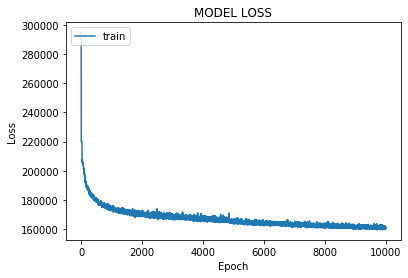

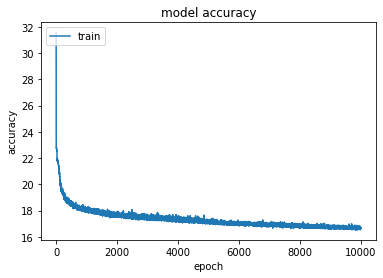

In [6]:
print(training.history.keys())
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['mean_absolute_percentage_error'])
#plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(x_train)